<a href="https://colab.research.google.com/github/ayushanand18/torchvision-experiments/blob/main/CIFAR10_Experiment_1_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Experiment 1 - ResNet50 with Image Transformations.

We are going to apply different image transformations and hyperparameters on ResNet50 architecture.\
We will do the following experiments here.
1. ResNet50 with `no` image transformations.
2. ResNet50 with `transforms.ColorJitter`.
3. ResNet50 with `transforms.RandomRotation`.
4. ResNet50 with `transforms.RandomRotation` + `transforms.ColorJitter`.
5. ResNet50 with `transforms.RandomRotattion` + `transforms.Grayscale`.

`Batchsize`: 128; `CyclicLR`: optimizer: Ranger, baseLR=1e-4, maxLR=1e-3,  stepsize=1e+3.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

## Downloading Dataset

In [ ]:
datacifar=datasets.CIFAR10('/content/torch_data/',download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/torch_data/cifar-10-python.tar.gz to /content/torch_data/


## 1. No Image transformations.

In [ ]:
transform1=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
data1=datasets.CIFAR10('/content/torch_data/', transform=transform1)

The class of the image is 6,
and the image is:


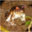

In [ ]:
imag=next(iter(datacifar))
print("The class of the image is %d,\nand the image is:"%imag[1])
imag[0]

## 2. ColorJitter Transforms

In [ ]:
transform2=transforms.Compose([transforms.ColorJitter(brightness=1,contrast=0.2,saturation=0.7,hue=0.5),transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
data2=datasets.CIFAR10('/content/torch_data/', transform=transform2)

The class of the image is 6,
and the image is:


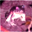

In [ ]:
imag=next(iter(data2))
print("The class of the image is %d,\nand the image is:"%imag[1])
imag[0]

## 3. RandomRotation Transforms

In [ ]:
transform3=transforms.Compose([transforms.RandomRotation(degrees=180),transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
data3=datasets.CIFAR10('/content/torch_data/', transform=transform3)

The class of the image is 6,
and the image is:


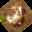

In [ ]:
imag=next(iter(data3))
print("The class of the image is %d,\nand the image is:"%imag[1])
imag[0]

## 4. Rotattion + ColorJitter Transforms

In [ ]:
transform4=transforms.Compose([transforms.ColorJitter(brightness=1,contrast=0.2,saturation=0.7,hue=0.5),transforms.RandomRotation(degrees=180),transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
data4=datasets.CIFAR10('/content/torch_data/', transform=transform4)

The class of the image is 6,
and the image is:


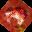

In [ ]:
imag=next(iter(data4))
print("The class of the image is %d,\nand the image is:"%imag[1])
imag[0]

## 5. Rotation + grayscale Transforms

In [ ]:
transform5=transforms.Compose([transforms.RandomRotation(degrees=180),transforms.Grayscale(num_output_channels=3),transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
data5=datasets.CIFAR10('/content/torch_data/', transform=transform5)

The class of the image is 6,
and the image is:


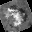

In [ ]:
imag=next(iter(data5))
print("The class of the image is %d,\nand the image is:"%imag[1])
imag[0]

## Importing ResNet50 pretrained.

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

# Training Models on dataset
## 1. Model on No transformation

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
!pip install pytorch_forecasting
import torch.backends.cudnn as cudnn
import torch.optim as optim
from pytorch_forecasting.optim import Ranger
import torch.nn.functional as F
import torch.nn as nn

     |████████████████████████████████| 113 kB 4.2 MB/s 
     |████████████████████████████████| 11.3 MB 26.7 MB/s 
     |████████████████████████████████| 308 kB 41.7 MB/s 
     |████████████████████████████████| 526 kB 49.3 MB/s 
     |████████████████████████████████| 209 kB 47.5 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 596 kB 47.3 MB/s 
     |████████████████████████████████| 332 kB 52.3 MB/s 
     |████████████████████████████████| 132 kB 53.2 MB/s 
     |████████████████████████████████| 829 kB 35.8 MB/s 
     |████████████████████████████████| 1.1 MB 38.7 MB/s 
     |████████████████████████████████| 271 kB 49.5 MB/s 
     |████████████████████████████████| 160 kB 45.3 MB/s 
     |████████████████████████████████| 192 kB 51.3 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 53.8 MB/s 
     |██████████████

In [ ]:
from tqdm import tqdm
import gc

In [ ]:
trainloader1 = torch.utils.data.DataLoader(data1, batch_size=128, shuffle=False, num_workers=2)
model=model.to(device)

if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = Ranger(model.parameters(), lr=0.01, weight_decay=5e-3)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, cycle_momentum=False,base_lr=1e-4,max_lr=1e-3, step_size_up=2000,step_size_down=None,mode='triangular', gamma=1.0,scale_mode='cycle',base_momentum=0.8, max_momentum=0.9)
train_loss=0
correct = 0
total = 0
def train(epoch):
    print('\nEpoch: %d' % epoch)
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    pbar = tqdm(enumerate(trainloader1), total=len(trainloader1), desc='Train')
    for step, (inputs, targets) in pbar:
        inputs, targets = inputs.to(device), targets.to(device)
        def closure():
          optimizer.zero_grad()
          output = model(inputs)
          loss = criterion(output, targets)
          loss.backward()
          return loss
        optimizer.step(closure)
        train_loss += closure().item()
        _, predicted = model(inputs).max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        gc.collect()
        print('Loss: %.3f | Acc: %.3f%% (%d/%d)'% (train_loss/(129), 100.*correct/total, correct, total))

In [ ]:
for epoch in range(150):
    train(epoch)
    scheduler.step()


Epoch: 0


Train:   0%|          | 1/391 [00:04<27:10,  4.18s/it]

Loss: 0.093 | Acc: 0.781% (1/128)


Train:   1%|          | 2/391 [00:04<12:43,  1.96s/it]

Loss: 0.187 | Acc: 0.391% (1/256)


Train:   1%|          | 3/391 [00:04<08:04,  1.25s/it]

Loss: 0.284 | Acc: 0.521% (2/384)


Train:   1%|          | 4/391 [00:05<05:53,  1.09it/s]

Loss: 0.381 | Acc: 0.391% (2/512)


Train:   1%|▏         | 5/391 [00:05<04:40,  1.37it/s]

Loss: 0.475 | Acc: 0.312% (2/640)


Train:   2%|▏         | 6/391 [00:06<03:58,  1.62it/s]

Loss: 0.573 | Acc: 0.260% (2/768)


Train:   2%|▏         | 7/391 [00:06<03:29,  1.83it/s]

Loss: 0.669 | Acc: 0.223% (2/896)


Train:   2%|▏         | 8/391 [00:06<03:10,  2.01it/s]

Loss: 0.766 | Acc: 0.195% (2/1024)


Train:   2%|▏         | 9/391 [00:07<02:57,  2.15it/s]

Loss: 0.867 | Acc: 0.260% (3/1152)


Train:   3%|▎         | 10/391 [00:07<02:49,  2.25it/s]

Loss: 0.962 | Acc: 0.234% (3/1280)


Train:   3%|▎         | 11/391 [00:08<02:44,  2.31it/s]

Loss: 1.060 | Acc: 0.213% (3/1408)


Train:   3%|▎         | 12/391 [00:08<02:41,  2.35it/s]

Loss: 1.159 | Acc: 0.195% (3/1536)


Train:   3%|▎         | 13/391 [00:08<02:37,  2.40it/s]

Loss: 1.252 | Acc: 0.180% (3/1664)


Train:   4%|▎         | 14/391 [00:09<02:34,  2.44it/s]

Loss: 1.349 | Acc: 0.167% (3/1792)


Train:   4%|▍         | 15/391 [00:09<02:32,  2.46it/s]

Loss: 1.445 | Acc: 0.156% (3/1920)


Train:   4%|▍         | 16/391 [00:10<02:32,  2.46it/s]

Loss: 1.539 | Acc: 0.146% (3/2048)


Train:   4%|▍         | 17/391 [00:10<02:30,  2.49it/s]

Loss: 1.634 | Acc: 0.138% (3/2176)


Train:   5%|▍         | 18/391 [00:10<02:30,  2.48it/s]

Loss: 1.735 | Acc: 0.130% (3/2304)


Train:   5%|▍         | 19/391 [00:11<02:29,  2.49it/s]

Loss: 1.829 | Acc: 0.123% (3/2432)


Train:   5%|▌         | 20/391 [00:11<02:29,  2.49it/s]

Loss: 1.924 | Acc: 0.117% (3/2560)


Train:   5%|▌         | 21/391 [00:12<02:28,  2.49it/s]

Loss: 2.013 | Acc: 0.112% (3/2688)


Train:   6%|▌         | 22/391 [00:12<02:28,  2.48it/s]

Loss: 2.110 | Acc: 0.107% (3/2816)


Train:   6%|▌         | 23/391 [00:12<02:27,  2.49it/s]

Loss: 2.203 | Acc: 0.102% (3/2944)


Train:   6%|▌         | 24/391 [00:13<02:27,  2.48it/s]

Loss: 2.295 | Acc: 0.098% (3/3072)


Train:   6%|▋         | 25/391 [00:13<02:26,  2.49it/s]

Loss: 2.388 | Acc: 0.125% (4/3200)


Train:   7%|▋         | 26/391 [00:14<02:27,  2.48it/s]

Loss: 2.486 | Acc: 0.120% (4/3328)


Train:   7%|▋         | 27/391 [00:14<02:27,  2.47it/s]

Loss: 2.575 | Acc: 0.116% (4/3456)


Train:   7%|▋         | 28/391 [00:14<02:24,  2.51it/s]

Loss: 2.671 | Acc: 0.112% (4/3584)


Train:   7%|▋         | 29/391 [00:15<02:23,  2.52it/s]

Loss: 2.769 | Acc: 0.108% (4/3712)


Train:   8%|▊         | 30/391 [00:15<02:24,  2.50it/s]

Loss: 2.863 | Acc: 0.104% (4/3840)


Train:   8%|▊         | 31/391 [00:16<02:23,  2.50it/s]

Loss: 2.954 | Acc: 0.101% (4/3968)


Train:   8%|▊         | 32/391 [00:16<02:24,  2.48it/s]

Loss: 3.041 | Acc: 0.098% (4/4096)


Train:   8%|▊         | 33/391 [00:16<02:22,  2.51it/s]

Loss: 3.134 | Acc: 0.095% (4/4224)


Train:   9%|▊         | 34/391 [00:17<02:22,  2.51it/s]

Loss: 3.224 | Acc: 0.092% (4/4352)


Train:   9%|▉         | 35/391 [00:17<02:22,  2.50it/s]

Loss: 3.314 | Acc: 0.089% (4/4480)


Train:   9%|▉         | 36/391 [00:18<02:23,  2.47it/s]

Loss: 3.408 | Acc: 0.087% (4/4608)


Train:   9%|▉         | 37/391 [00:18<02:22,  2.48it/s]

Loss: 3.501 | Acc: 0.084% (4/4736)


Train:  10%|▉         | 38/391 [00:19<02:21,  2.49it/s]

Loss: 3.591 | Acc: 0.082% (4/4864)


Train:  10%|▉         | 39/391 [00:19<02:20,  2.50it/s]

Loss: 3.683 | Acc: 0.080% (4/4992)


Train:  10%|█         | 40/391 [00:19<02:20,  2.49it/s]

Loss: 3.775 | Acc: 0.078% (4/5120)


Train:  10%|█         | 41/391 [00:20<02:19,  2.50it/s]

Loss: 3.863 | Acc: 0.076% (4/5248)


Train:  11%|█         | 42/391 [00:20<02:20,  2.49it/s]

Loss: 3.954 | Acc: 0.112% (6/5376)


Train:  11%|█         | 43/391 [00:21<02:19,  2.50it/s]

Loss: 4.042 | Acc: 0.109% (6/5504)


Train:  11%|█▏        | 44/391 [00:21<02:18,  2.50it/s]

Loss: 4.133 | Acc: 0.107% (6/5632)


Train:  12%|█▏        | 45/391 [00:21<02:18,  2.50it/s]

Loss: 4.224 | Acc: 0.104% (6/5760)


Train:  12%|█▏        | 46/391 [00:22<02:18,  2.49it/s]

Loss: 4.310 | Acc: 0.102% (6/5888)


Train:  12%|█▏        | 47/391 [00:22<02:17,  2.50it/s]

Loss: 4.396 | Acc: 0.100% (6/6016)


Train:  12%|█▏        | 48/391 [00:23<02:17,  2.50it/s]

Loss: 4.484 | Acc: 0.114% (7/6144)


Train:  13%|█▎        | 49/391 [00:23<02:18,  2.47it/s]

Loss: 4.571 | Acc: 0.112% (7/6272)


Train:  13%|█▎        | 50/391 [00:23<02:17,  2.49it/s]

Loss: 4.655 | Acc: 0.109% (7/6400)


Train:  13%|█▎        | 51/391 [00:24<02:16,  2.49it/s]

Loss: 4.742 | Acc: 0.107% (7/6528)


Train:  13%|█▎        | 52/391 [00:24<02:15,  2.51it/s]

Loss: 4.825 | Acc: 0.105% (7/6656)


Train:  14%|█▎        | 53/391 [00:25<02:15,  2.50it/s]

Loss: 4.906 | Acc: 0.118% (8/6784)


Train:  14%|█▍        | 54/391 [00:25<02:14,  2.50it/s]

Loss: 4.991 | Acc: 0.116% (8/6912)


Train:  14%|█▍        | 55/391 [00:25<02:15,  2.49it/s]

Loss: 5.074 | Acc: 0.114% (8/7040)


Train:  14%|█▍        | 56/391 [00:26<02:15,  2.47it/s]

Loss: 5.157 | Acc: 0.112% (8/7168)


Train:  15%|█▍        | 57/391 [00:26<02:15,  2.47it/s]

Loss: 5.236 | Acc: 0.110% (8/7296)


Train:  15%|█▍        | 58/391 [00:27<02:13,  2.49it/s]

Loss: 5.321 | Acc: 0.108% (8/7424)


Train:  15%|█▌        | 59/391 [00:27<02:12,  2.50it/s]

Loss: 5.399 | Acc: 0.119% (9/7552)


Train:  15%|█▌        | 60/391 [00:27<02:11,  2.51it/s]

Loss: 5.479 | Acc: 0.117% (9/7680)


Train:  16%|█▌        | 61/391 [00:28<02:11,  2.50it/s]

Loss: 5.559 | Acc: 0.115% (9/7808)


Train:  16%|█▌        | 62/391 [00:28<02:11,  2.51it/s]

Loss: 5.641 | Acc: 0.113% (9/7936)


Train:  16%|█▌        | 63/391 [00:29<02:10,  2.52it/s]

Loss: 5.726 | Acc: 0.136% (11/8064)


Train:  16%|█▋        | 64/391 [00:29<02:09,  2.53it/s]

Loss: 5.804 | Acc: 0.134% (11/8192)


Train:  17%|█▋        | 65/391 [00:29<02:08,  2.54it/s]

Loss: 5.883 | Acc: 0.144% (12/8320)


Train:  17%|█▋        | 66/391 [00:30<02:08,  2.53it/s]

Loss: 5.963 | Acc: 0.142% (12/8448)


Train:  17%|█▋        | 67/391 [00:30<02:08,  2.51it/s]

Loss: 6.041 | Acc: 0.140% (12/8576)


Train:  17%|█▋        | 68/391 [00:30<02:08,  2.52it/s]

Loss: 6.116 | Acc: 0.138% (12/8704)


Train:  18%|█▊        | 69/391 [00:31<02:07,  2.52it/s]

Loss: 6.193 | Acc: 0.136% (12/8832)


Train:  18%|█▊        | 70/391 [00:31<02:06,  2.54it/s]

Loss: 6.266 | Acc: 0.145% (13/8960)


Train:  18%|█▊        | 71/391 [00:32<02:07,  2.51it/s]

Loss: 6.345 | Acc: 0.143% (13/9088)


Train:  18%|█▊        | 72/391 [00:32<02:07,  2.50it/s]

Loss: 6.422 | Acc: 0.141% (13/9216)


Train:  19%|█▊        | 73/391 [00:32<02:07,  2.49it/s]

Loss: 6.497 | Acc: 0.139% (13/9344)


Train:  19%|█▉        | 74/391 [00:33<02:06,  2.51it/s]

Loss: 6.575 | Acc: 0.137% (13/9472)


Train:  19%|█▉        | 75/391 [00:33<02:05,  2.52it/s]

Loss: 6.647 | Acc: 0.146% (14/9600)


Train:  19%|█▉        | 76/391 [00:34<02:04,  2.52it/s]

Loss: 6.717 | Acc: 0.154% (15/9728)


Train:  20%|█▉        | 77/391 [00:34<02:04,  2.53it/s]

Loss: 6.789 | Acc: 0.152% (15/9856)


Train:  20%|█▉        | 78/391 [00:34<02:05,  2.50it/s]

Loss: 6.862 | Acc: 0.150% (15/9984)


Train:  20%|██        | 79/391 [00:35<02:05,  2.50it/s]

Loss: 6.931 | Acc: 0.148% (15/10112)


Train:  20%|██        | 80/391 [00:35<02:04,  2.50it/s]

Loss: 7.002 | Acc: 0.146% (15/10240)


Train:  21%|██        | 81/391 [00:36<02:04,  2.50it/s]

Loss: 7.072 | Acc: 0.145% (15/10368)


Train:  21%|██        | 82/391 [00:36<02:04,  2.49it/s]

Loss: 7.144 | Acc: 0.143% (15/10496)


Train:  21%|██        | 83/391 [00:36<02:04,  2.48it/s]

Loss: 7.213 | Acc: 0.141% (15/10624)


Train:  21%|██▏       | 84/391 [00:37<02:04,  2.47it/s]

Loss: 7.289 | Acc: 0.149% (16/10752)


Train:  22%|██▏       | 85/391 [00:37<02:02,  2.51it/s]

Loss: 7.355 | Acc: 0.165% (18/10880)


Train:  22%|██▏       | 86/391 [00:38<02:01,  2.50it/s]

Loss: 7.424 | Acc: 0.164% (18/11008)


Train:  22%|██▏       | 87/391 [00:38<02:01,  2.50it/s]

Loss: 7.489 | Acc: 0.171% (19/11136)


Train:  23%|██▎       | 88/391 [00:38<02:01,  2.50it/s]

Loss: 7.554 | Acc: 0.186% (21/11264)


Train:  23%|██▎       | 89/391 [00:39<01:59,  2.52it/s]

Loss: 7.619 | Acc: 0.202% (23/11392)


Train:  23%|██▎       | 90/391 [00:39<02:01,  2.49it/s]

Loss: 7.686 | Acc: 0.200% (23/11520)


Train:  23%|██▎       | 91/391 [00:40<02:02,  2.46it/s]

Loss: 7.751 | Acc: 0.197% (23/11648)


Train:  24%|██▎       | 92/391 [00:40<02:01,  2.46it/s]

Loss: 7.814 | Acc: 0.212% (25/11776)


Train:  24%|██▍       | 93/391 [00:41<02:00,  2.48it/s]

Loss: 7.878 | Acc: 0.218% (26/11904)


Train:  24%|██▍       | 94/391 [00:41<01:59,  2.49it/s]

Loss: 7.941 | Acc: 0.224% (27/12032)


Train:  24%|██▍       | 95/391 [00:41<01:58,  2.49it/s]

Loss: 8.001 | Acc: 0.230% (28/12160)


Train:  25%|██▍       | 96/391 [00:42<01:58,  2.49it/s]

Loss: 8.064 | Acc: 0.236% (29/12288)


Train:  25%|██▍       | 97/391 [00:42<01:58,  2.49it/s]

Loss: 8.128 | Acc: 0.234% (29/12416)


Train:  25%|██▌       | 98/391 [00:43<01:57,  2.50it/s]

Loss: 8.191 | Acc: 0.239% (30/12544)


Train:  25%|██▌       | 99/391 [00:43<01:57,  2.49it/s]

Loss: 8.250 | Acc: 0.237% (30/12672)


Train:  26%|██▌       | 100/391 [00:43<01:56,  2.50it/s]

Loss: 8.309 | Acc: 0.250% (32/12800)


Train:  26%|██▌       | 101/391 [00:44<01:56,  2.49it/s]

Loss: 8.371 | Acc: 0.271% (35/12928)


Train:  26%|██▌       | 102/391 [00:44<01:56,  2.48it/s]

Loss: 8.439 | Acc: 0.276% (36/13056)


Train:  26%|██▋       | 103/391 [00:45<01:55,  2.49it/s]

Loss: 8.497 | Acc: 0.273% (36/13184)


Train:  27%|██▋       | 104/391 [00:45<02:05,  2.29it/s]

Loss: 8.554 | Acc: 0.285% (38/13312)


Train:  27%|██▋       | 105/391 [00:45<02:01,  2.35it/s]

Loss: 8.612 | Acc: 0.320% (43/13440)


Train:  27%|██▋       | 106/391 [00:46<02:03,  2.31it/s]

Loss: 8.669 | Acc: 0.332% (45/13568)


Train:  27%|██▋       | 107/391 [00:46<01:59,  2.38it/s]

Loss: 8.721 | Acc: 0.372% (51/13696)


Train:  28%|██▊       | 108/391 [00:47<01:59,  2.37it/s]

Loss: 8.782 | Acc: 0.383% (53/13824)


Train:  28%|██▊       | 109/391 [00:47<01:56,  2.41it/s]

Loss: 8.840 | Acc: 0.401% (56/13952)


Train:  28%|██▊       | 110/391 [00:48<01:55,  2.44it/s]

Loss: 8.895 | Acc: 0.426% (60/14080)


Train:  28%|██▊       | 111/391 [00:48<01:54,  2.45it/s]

Loss: 8.952 | Acc: 0.422% (60/14208)


Train:  29%|██▊       | 112/391 [00:48<01:53,  2.47it/s]

Loss: 9.007 | Acc: 0.426% (61/14336)


Train:  29%|██▉       | 113/391 [00:49<01:51,  2.50it/s]

Loss: 9.058 | Acc: 0.498% (72/14464)


Train:  29%|██▉       | 114/391 [00:49<01:51,  2.48it/s]

Loss: 9.116 | Acc: 0.514% (75/14592)


Train:  29%|██▉       | 115/391 [00:50<01:52,  2.45it/s]

Loss: 9.169 | Acc: 0.550% (81/14720)


Train:  30%|██▉       | 116/391 [00:50<01:52,  2.45it/s]

Loss: 9.224 | Acc: 0.559% (83/14848)


Train:  30%|██▉       | 117/391 [00:50<01:50,  2.48it/s]

Loss: 9.277 | Acc: 0.574% (86/14976)


Train:  30%|███       | 118/391 [00:51<01:49,  2.50it/s]

Loss: 9.328 | Acc: 0.622% (94/15104)


Train:  30%|███       | 119/391 [00:51<01:50,  2.47it/s]

Loss: 9.380 | Acc: 0.676% (103/15232)


Train:  31%|███       | 120/391 [00:52<01:49,  2.47it/s]

Loss: 9.431 | Acc: 0.697% (107/15360)


Train:  31%|███       | 121/391 [00:52<01:49,  2.46it/s]

Loss: 9.485 | Acc: 0.736% (114/15488)


Train:  31%|███       | 122/391 [00:52<01:48,  2.48it/s]

Loss: 9.537 | Acc: 0.788% (123/15616)


Train:  31%|███▏      | 123/391 [00:53<01:47,  2.49it/s]

Loss: 9.590 | Acc: 0.832% (131/15744)


Train:  32%|███▏      | 124/391 [00:53<01:46,  2.51it/s]

Loss: 9.639 | Acc: 0.851% (135/15872)


Train:  32%|███▏      | 125/391 [00:54<01:47,  2.48it/s]

Loss: 9.692 | Acc: 0.875% (140/16000)


Train:  32%|███▏      | 126/391 [00:54<01:47,  2.46it/s]

Loss: 9.744 | Acc: 0.893% (144/16128)


Train:  32%|███▏      | 127/391 [00:54<01:46,  2.48it/s]

Loss: 9.799 | Acc: 0.898% (146/16256)


Train:  33%|███▎      | 128/391 [00:55<01:45,  2.50it/s]

Loss: 9.848 | Acc: 0.928% (152/16384)


Train:  33%|███▎      | 129/391 [00:55<01:46,  2.47it/s]

Loss: 9.896 | Acc: 0.969% (160/16512)


Train:  33%|███▎      | 130/391 [00:56<01:45,  2.46it/s]

Loss: 9.942 | Acc: 1.052% (175/16640)


Train:  34%|███▎      | 131/391 [00:56<01:45,  2.47it/s]

Loss: 9.988 | Acc: 1.127% (189/16768)


Train:  34%|███▍      | 132/391 [00:56<01:44,  2.47it/s]

Loss: 10.040 | Acc: 1.166% (197/16896)


Train:  34%|███▍      | 133/391 [00:57<01:42,  2.51it/s]

Loss: 10.084 | Acc: 1.210% (206/17024)


Train:  34%|███▍      | 134/391 [00:57<01:42,  2.50it/s]

Loss: 10.133 | Acc: 1.259% (216/17152)


Train:  35%|███▍      | 135/391 [00:58<01:42,  2.50it/s]

Loss: 10.178 | Acc: 1.296% (224/17280)


Train:  35%|███▍      | 136/391 [00:58<01:42,  2.49it/s]

Loss: 10.223 | Acc: 1.367% (238/17408)


Train:  35%|███▌      | 137/391 [00:58<01:41,  2.51it/s]

Loss: 10.267 | Acc: 1.426% (250/17536)


Train:  35%|███▌      | 138/391 [00:59<01:41,  2.49it/s]

Loss: 10.313 | Acc: 1.512% (267/17664)


Train:  36%|███▌      | 139/391 [00:59<01:40,  2.51it/s]

Loss: 10.357 | Acc: 1.591% (283/17792)


Train:  36%|███▌      | 140/391 [01:00<01:40,  2.51it/s]

Loss: 10.406 | Acc: 1.635% (293/17920)


Train:  36%|███▌      | 141/391 [01:00<01:39,  2.52it/s]

Loss: 10.448 | Acc: 1.684% (304/18048)


Train:  36%|███▋      | 142/391 [01:00<01:38,  2.53it/s]

Loss: 10.492 | Acc: 1.733% (315/18176)


Train:  37%|███▋      | 143/391 [01:01<01:39,  2.50it/s]

Loss: 10.536 | Acc: 1.814% (332/18304)


Train:  37%|███▋      | 144/391 [01:01<01:39,  2.49it/s]

Loss: 10.579 | Acc: 1.893% (349/18432)


Train:  37%|███▋      | 145/391 [01:02<01:38,  2.50it/s]

Loss: 10.620 | Acc: 1.972% (366/18560)


Train:  37%|███▋      | 146/391 [01:02<01:37,  2.51it/s]

Loss: 10.660 | Acc: 2.028% (379/18688)


Train:  38%|███▊      | 147/391 [01:02<01:37,  2.50it/s]

Loss: 10.709 | Acc: 2.067% (389/18816)


Train:  38%|███▊      | 148/391 [01:03<01:37,  2.50it/s]

Loss: 10.747 | Acc: 2.185% (414/18944)


Train:  38%|███▊      | 149/391 [01:03<01:37,  2.48it/s]

Loss: 10.790 | Acc: 2.255% (430/19072)


Train:  38%|███▊      | 150/391 [01:04<01:37,  2.47it/s]

Loss: 10.830 | Acc: 2.328% (447/19200)


Train:  39%|███▊      | 151/391 [01:04<01:37,  2.46it/s]

Loss: 10.870 | Acc: 2.401% (464/19328)


Train:  39%|███▉      | 152/391 [01:04<01:35,  2.49it/s]

Loss: 10.907 | Acc: 2.498% (486/19456)


Train:  39%|███▉      | 153/391 [01:05<01:35,  2.49it/s]

Loss: 10.944 | Acc: 2.568% (503/19584)


Train:  39%|███▉      | 154/391 [01:05<01:34,  2.50it/s]

Loss: 10.983 | Acc: 2.633% (519/19712)


Train:  40%|███▉      | 155/391 [01:06<01:35,  2.48it/s]

Loss: 11.021 | Acc: 2.712% (538/19840)


Train:  40%|███▉      | 156/391 [01:06<01:35,  2.47it/s]

Loss: 11.062 | Acc: 2.784% (556/19968)


Train:  40%|████      | 157/391 [01:06<01:34,  2.48it/s]

Loss: 11.099 | Acc: 2.881% (579/20096)


Train:  40%|████      | 158/391 [01:07<01:33,  2.49it/s]

Loss: 11.135 | Acc: 2.972% (601/20224)


Train:  41%|████      | 159/391 [01:07<01:32,  2.51it/s]

Loss: 11.175 | Acc: 3.027% (616/20352)


Train:  41%|████      | 160/391 [01:08<01:32,  2.49it/s]

Loss: 11.212 | Acc: 3.125% (640/20480)


Train:  41%|████      | 161/391 [01:08<01:31,  2.52it/s]

Loss: 11.251 | Acc: 3.183% (656/20608)


Train:  41%|████▏     | 162/391 [01:08<01:31,  2.50it/s]

Loss: 11.289 | Acc: 3.284% (681/20736)


Train:  42%|████▏     | 163/391 [01:09<01:31,  2.50it/s]

Loss: 11.324 | Acc: 3.369% (703/20864)


Train:  42%|████▏     | 164/391 [01:09<01:30,  2.50it/s]

Loss: 11.362 | Acc: 3.458% (726/20992)


Train:  42%|████▏     | 165/391 [01:10<01:29,  2.51it/s]

Loss: 11.399 | Acc: 3.551% (750/21120)


Train:  42%|████▏     | 166/391 [01:10<01:29,  2.51it/s]

Loss: 11.432 | Acc: 3.662% (778/21248)


Train:  43%|████▎     | 167/391 [01:10<01:29,  2.50it/s]

Loss: 11.466 | Acc: 3.743% (800/21376)


Train:  43%|████▎     | 168/391 [01:11<01:30,  2.47it/s]

Loss: 11.502 | Acc: 3.799% (817/21504)


Train:  43%|████▎     | 169/391 [01:11<01:29,  2.47it/s]

Loss: 11.536 | Acc: 3.874% (838/21632)


Train:  43%|████▎     | 170/391 [01:12<01:28,  2.49it/s]

Loss: 11.569 | Acc: 3.943% (858/21760)


Train:  44%|████▎     | 171/391 [01:12<01:29,  2.46it/s]

Loss: 11.601 | Acc: 4.034% (883/21888)


Train:  44%|████▍     | 172/391 [01:12<01:28,  2.46it/s]

Loss: 11.637 | Acc: 4.129% (909/22016)


Train:  44%|████▍     | 173/391 [01:13<01:28,  2.47it/s]

Loss: 11.670 | Acc: 4.200% (930/22144)


Train:  45%|████▍     | 174/391 [01:13<01:28,  2.46it/s]

Loss: 11.709 | Acc: 4.279% (953/22272)


Train:  45%|████▍     | 175/391 [01:14<01:27,  2.48it/s]

Loss: 11.740 | Acc: 4.371% (979/22400)


Train:  45%|████▌     | 176/391 [01:14<01:26,  2.48it/s]

Loss: 11.774 | Acc: 4.452% (1003/22528)


Train:  45%|████▌     | 177/391 [01:14<01:26,  2.48it/s]

Loss: 11.810 | Acc: 4.511% (1022/22656)


Train:  46%|████▌     | 178/391 [01:15<01:25,  2.49it/s]

Loss: 11.845 | Acc: 4.591% (1046/22784)


Train:  46%|████▌     | 179/391 [01:15<01:24,  2.52it/s]

Loss: 11.877 | Acc: 4.679% (1072/22912)


Train:  46%|████▌     | 180/391 [01:16<01:24,  2.50it/s]

Loss: 11.908 | Acc: 4.792% (1104/23040)


Train:  46%|████▋     | 181/391 [01:16<01:23,  2.50it/s]

Loss: 11.938 | Acc: 4.903% (1136/23168)


Train:  47%|████▋     | 182/391 [01:16<01:23,  2.51it/s]

Loss: 11.971 | Acc: 5.005% (1166/23296)


Train:  47%|████▋     | 183/391 [01:17<01:21,  2.54it/s]

Loss: 12.000 | Acc: 5.110% (1197/23424)


Train:  47%|████▋     | 184/391 [01:17<01:21,  2.53it/s]

Loss: 12.027 | Acc: 5.248% (1236/23552)


Train:  47%|████▋     | 185/391 [01:18<01:21,  2.52it/s]

Loss: 12.059 | Acc: 5.342% (1265/23680)


Train:  48%|████▊     | 186/391 [01:18<01:22,  2.50it/s]

Loss: 12.089 | Acc: 5.435% (1294/23808)


Train:  48%|████▊     | 187/391 [01:18<01:21,  2.50it/s]

Loss: 12.121 | Acc: 5.540% (1326/23936)


Train:  48%|████▊     | 188/391 [01:19<01:20,  2.51it/s]

Loss: 12.153 | Acc: 5.606% (1349/24064)


Train:  48%|████▊     | 189/391 [01:19<01:20,  2.50it/s]

Loss: 12.182 | Acc: 5.700% (1379/24192)


Train:  49%|████▊     | 190/391 [01:20<01:20,  2.48it/s]

Loss: 12.207 | Acc: 5.831% (1418/24320)


Train:  49%|████▉     | 191/391 [01:20<01:20,  2.48it/s]

Loss: 12.239 | Acc: 5.898% (1442/24448)


Train:  49%|████▉     | 192/391 [01:20<01:20,  2.47it/s]

Loss: 12.270 | Acc: 5.994% (1473/24576)


Train:  49%|████▉     | 193/391 [01:21<01:20,  2.46it/s]

Loss: 12.297 | Acc: 6.100% (1507/24704)


Train:  50%|████▉     | 194/391 [01:21<01:19,  2.48it/s]

Loss: 12.328 | Acc: 6.206% (1541/24832)


Train:  50%|████▉     | 195/391 [01:22<01:19,  2.48it/s]

Loss: 12.358 | Acc: 6.302% (1573/24960)


Train:  50%|█████     | 196/391 [01:22<01:18,  2.47it/s]

Loss: 12.388 | Acc: 6.417% (1610/25088)


Train:  50%|█████     | 197/391 [01:22<01:18,  2.47it/s]

Loss: 12.419 | Acc: 6.508% (1641/25216)


Train:  51%|█████     | 198/391 [01:23<01:18,  2.46it/s]

Loss: 12.448 | Acc: 6.570% (1665/25344)


Train:  51%|█████     | 199/391 [01:23<01:17,  2.46it/s]

Loss: 12.475 | Acc: 6.658% (1696/25472)


Train:  51%|█████     | 200/391 [01:24<01:16,  2.48it/s]

Loss: 12.500 | Acc: 6.762% (1731/25600)


Train:  51%|█████▏    | 201/391 [01:24<01:16,  2.48it/s]

Loss: 12.530 | Acc: 6.852% (1763/25728)


Train:  52%|█████▏    | 202/391 [01:24<01:16,  2.48it/s]

Loss: 12.556 | Acc: 6.950% (1797/25856)


Train:  52%|█████▏    | 203/391 [01:25<01:15,  2.49it/s]

Loss: 12.583 | Acc: 7.081% (1840/25984)


Train:  52%|█████▏    | 204/391 [01:25<01:15,  2.49it/s]

Loss: 12.607 | Acc: 7.211% (1883/26112)


Train:  52%|█████▏    | 205/391 [01:26<01:14,  2.51it/s]

Loss: 12.632 | Acc: 7.348% (1928/26240)


Train:  53%|█████▎    | 206/391 [01:26<01:13,  2.53it/s]

Loss: 12.658 | Acc: 7.456% (1966/26368)


Train:  53%|█████▎    | 207/391 [01:26<01:12,  2.53it/s]

Loss: 12.683 | Acc: 7.575% (2007/26496)


Train:  53%|█████▎    | 208/391 [01:27<01:12,  2.51it/s]

Loss: 12.705 | Acc: 7.707% (2052/26624)


Train:  53%|█████▎    | 209/391 [01:27<01:12,  2.50it/s]

Loss: 12.730 | Acc: 7.824% (2093/26752)


Train:  54%|█████▎    | 210/391 [01:28<01:12,  2.49it/s]

Loss: 12.756 | Acc: 7.913% (2127/26880)


Train:  54%|█████▍    | 211/391 [01:28<01:12,  2.50it/s]

Loss: 12.782 | Acc: 7.998% (2160/27008)


Train:  54%|█████▍    | 212/391 [01:28<01:12,  2.47it/s]

Loss: 12.807 | Acc: 8.104% (2199/27136)


Train:  54%|█████▍    | 213/391 [01:29<01:11,  2.48it/s]

Loss: 12.834 | Acc: 8.183% (2231/27264)


Train:  55%|█████▍    | 214/391 [01:29<01:11,  2.48it/s]

Loss: 12.855 | Acc: 8.324% (2280/27392)


Train:  55%|█████▍    | 215/391 [01:30<01:11,  2.48it/s]

Loss: 12.883 | Acc: 8.383% (2307/27520)


Train:  55%|█████▌    | 216/391 [01:30<01:10,  2.47it/s]

Loss: 12.911 | Acc: 8.474% (2343/27648)


Train:  55%|█████▌    | 217/391 [01:30<01:10,  2.46it/s]

Loss: 12.935 | Acc: 8.608% (2391/27776)


Train:  56%|█████▌    | 218/391 [01:31<01:10,  2.46it/s]

Loss: 12.956 | Acc: 8.737% (2438/27904)


Train:  56%|█████▌    | 219/391 [01:31<01:09,  2.47it/s]

Loss: 12.982 | Acc: 8.815% (2471/28032)


Train:  56%|█████▋    | 220/391 [01:32<01:09,  2.48it/s]

Loss: 13.008 | Acc: 8.906% (2508/28160)


Train:  57%|█████▋    | 221/391 [01:32<01:08,  2.47it/s]

Loss: 13.032 | Acc: 9.014% (2550/28288)


Train:  57%|█████▋    | 222/391 [01:33<01:08,  2.47it/s]

Loss: 13.057 | Acc: 9.125% (2593/28416)


Train:  57%|█████▋    | 223/391 [01:33<01:08,  2.45it/s]

Loss: 13.080 | Acc: 9.217% (2631/28544)


Train:  57%|█████▋    | 224/391 [01:33<01:07,  2.46it/s]

Loss: 13.106 | Acc: 9.270% (2658/28672)


Train:  58%|█████▊    | 225/391 [01:34<01:07,  2.47it/s]

Loss: 13.128 | Acc: 9.358% (2695/28800)


Train:  58%|█████▊    | 226/391 [01:34<01:06,  2.49it/s]

Loss: 13.148 | Acc: 9.482% (2743/28928)


Train:  58%|█████▊    | 227/391 [01:35<01:06,  2.48it/s]

Loss: 13.168 | Acc: 9.581% (2784/29056)


Train:  58%|█████▊    | 228/391 [01:35<01:05,  2.48it/s]

Loss: 13.190 | Acc: 9.683% (2826/29184)


Train:  59%|█████▊    | 229/391 [01:35<01:04,  2.49it/s]

Loss: 13.211 | Acc: 9.805% (2874/29312)


Train:  59%|█████▉    | 230/391 [01:36<01:04,  2.50it/s]

Loss: 13.234 | Acc: 9.918% (2920/29440)


Train:  59%|█████▉    | 231/391 [01:36<01:04,  2.48it/s]

Loss: 13.257 | Acc: 9.994% (2955/29568)


Train:  59%|█████▉    | 232/391 [01:37<01:04,  2.46it/s]

Loss: 13.281 | Acc: 10.075% (2992/29696)


Train:  60%|█████▉    | 233/391 [01:37<01:04,  2.46it/s]

Loss: 13.304 | Acc: 10.186% (3038/29824)


Train:  60%|█████▉    | 234/391 [01:37<01:04,  2.45it/s]

Loss: 13.329 | Acc: 10.290% (3082/29952)


Train:  60%|██████    | 235/391 [01:38<01:03,  2.46it/s]

Loss: 13.352 | Acc: 10.376% (3121/30080)


Train:  60%|██████    | 236/391 [01:38<01:02,  2.47it/s]

Loss: 13.373 | Acc: 10.464% (3161/30208)


Train:  61%|██████    | 237/391 [01:39<01:03,  2.43it/s]

Loss: 13.395 | Acc: 10.552% (3201/30336)


Train:  61%|██████    | 238/391 [01:39<01:02,  2.45it/s]

Loss: 13.416 | Acc: 10.622% (3236/30464)


Train:  61%|██████    | 239/391 [01:39<01:01,  2.47it/s]

Loss: 13.438 | Acc: 10.751% (3289/30592)


Train:  61%|██████▏   | 240/391 [01:40<01:01,  2.47it/s]

Loss: 13.460 | Acc: 10.850% (3333/30720)


Train:  62%|██████▏   | 241/391 [01:40<01:01,  2.46it/s]

Loss: 13.484 | Acc: 10.947% (3377/30848)


Train:  62%|██████▏   | 242/391 [01:41<01:00,  2.45it/s]

Loss: 13.504 | Acc: 11.050% (3423/30976)


Train:  62%|██████▏   | 243/391 [01:41<01:00,  2.46it/s]

Loss: 13.525 | Acc: 11.150% (3468/31104)


Train:  62%|██████▏   | 244/391 [01:41<00:59,  2.49it/s]

Loss: 13.546 | Acc: 11.248% (3513/31232)


Train:  63%|██████▎   | 245/391 [01:42<00:58,  2.49it/s]

Loss: 13.571 | Acc: 11.371% (3566/31360)


Train:  63%|██████▎   | 246/391 [01:42<00:58,  2.48it/s]

Loss: 13.592 | Acc: 11.462% (3609/31488)


Train:  63%|██████▎   | 247/391 [01:43<00:58,  2.47it/s]

Loss: 13.616 | Acc: 11.561% (3655/31616)


Train:  63%|██████▎   | 248/391 [01:43<00:58,  2.46it/s]

Loss: 13.639 | Acc: 11.621% (3689/31744)


Train:  64%|██████▎   | 249/391 [01:43<00:57,  2.48it/s]

Loss: 13.658 | Acc: 11.709% (3732/31872)


Train:  64%|██████▍   | 250/391 [01:44<00:56,  2.48it/s]

Loss: 13.680 | Acc: 11.797% (3775/32000)


Train:  64%|██████▍   | 251/391 [01:44<00:56,  2.48it/s]

Loss: 13.700 | Acc: 11.884% (3818/32128)


Train:  64%|██████▍   | 252/391 [01:45<00:55,  2.49it/s]

Loss: 13.721 | Acc: 11.976% (3863/32256)


Train:  65%|██████▍   | 253/391 [01:45<00:55,  2.47it/s]

Loss: 13.741 | Acc: 12.077% (3911/32384)


Train:  65%|██████▍   | 254/391 [01:45<00:55,  2.48it/s]

Loss: 13.759 | Acc: 12.189% (3963/32512)


Train:  65%|██████▌   | 255/391 [01:46<00:54,  2.50it/s]

Loss: 13.778 | Acc: 12.279% (4008/32640)


Train:  65%|██████▌   | 256/391 [01:46<00:54,  2.50it/s]

Loss: 13.798 | Acc: 12.393% (4061/32768)


Train:  66%|██████▌   | 257/391 [01:47<00:53,  2.51it/s]

Loss: 13.818 | Acc: 12.485% (4107/32896)


Train:  66%|██████▌   | 258/391 [01:47<00:53,  2.48it/s]

Loss: 13.839 | Acc: 12.558% (4147/33024)


Train:  66%|██████▌   | 259/391 [01:47<00:53,  2.48it/s]

Loss: 13.861 | Acc: 12.639% (4190/33152)


Train:  66%|██████▋   | 260/391 [01:48<00:52,  2.49it/s]

Loss: 13.878 | Acc: 12.725% (4235/33280)


Train:  67%|██████▋   | 261/391 [01:48<00:51,  2.51it/s]

Loss: 13.898 | Acc: 12.847% (4292/33408)


Train:  67%|██████▋   | 262/391 [01:49<00:51,  2.50it/s]

Loss: 13.920 | Acc: 12.935% (4338/33536)


Train:  67%|██████▋   | 263/391 [01:49<00:51,  2.50it/s]

Loss: 13.943 | Acc: 13.005% (4378/33664)


Train:  68%|██████▊   | 264/391 [01:49<00:50,  2.50it/s]

Loss: 13.965 | Acc: 13.089% (4423/33792)


Train:  68%|██████▊   | 265/391 [01:50<00:50,  2.51it/s]

Loss: 13.985 | Acc: 13.157% (4463/33920)


Train:  68%|██████▊   | 266/391 [01:50<00:49,  2.51it/s]

Loss: 14.006 | Acc: 13.225% (4503/34048)


Train:  68%|██████▊   | 267/391 [01:51<00:49,  2.50it/s]

Loss: 14.024 | Acc: 13.319% (4552/34176)


Train:  69%|██████▊   | 268/391 [01:51<00:48,  2.52it/s]

Loss: 14.042 | Acc: 13.398% (4596/34304)


Train:  69%|██████▉   | 269/391 [01:51<00:48,  2.51it/s]

Loss: 14.062 | Acc: 13.499% (4648/34432)


Train:  69%|██████▉   | 270/391 [01:52<00:48,  2.50it/s]

Loss: 14.083 | Acc: 13.573% (4691/34560)


Train:  69%|██████▉   | 271/391 [01:52<00:47,  2.51it/s]

Loss: 14.103 | Acc: 13.650% (4735/34688)


Train:  70%|██████▉   | 272/391 [01:53<00:47,  2.51it/s]

Loss: 14.119 | Acc: 13.755% (4789/34816)


Train:  70%|██████▉   | 273/391 [01:53<00:47,  2.51it/s]

Loss: 14.139 | Acc: 13.845% (4838/34944)


Train:  70%|███████   | 274/391 [01:53<00:46,  2.51it/s]

Loss: 14.157 | Acc: 13.928% (4885/35072)


Train:  70%|███████   | 275/391 [01:54<00:46,  2.52it/s]

Loss: 14.176 | Acc: 14.011% (4932/35200)


Train:  71%|███████   | 276/391 [01:54<00:45,  2.50it/s]

Loss: 14.197 | Acc: 14.071% (4971/35328)


Train:  71%|███████   | 277/391 [01:55<00:45,  2.51it/s]

Loss: 14.216 | Acc: 14.156% (5019/35456)


Train:  71%|███████   | 278/391 [01:55<00:45,  2.51it/s]

Loss: 14.234 | Acc: 14.256% (5073/35584)


Train:  71%|███████▏  | 279/391 [01:55<00:44,  2.51it/s]

Loss: 14.250 | Acc: 14.357% (5127/35712)


Train:  72%|███████▏  | 280/391 [01:56<00:43,  2.52it/s]

Loss: 14.268 | Acc: 14.422% (5169/35840)


Train:  72%|███████▏  | 281/391 [01:56<00:43,  2.52it/s]

Loss: 14.286 | Acc: 14.513% (5220/35968)


Train:  72%|███████▏  | 282/391 [01:57<00:43,  2.49it/s]

Loss: 14.308 | Acc: 14.586% (5265/36096)


Train:  72%|███████▏  | 283/391 [01:57<00:43,  2.50it/s]

Loss: 14.325 | Acc: 14.673% (5315/36224)


Train:  73%|███████▎  | 284/391 [01:57<00:42,  2.50it/s]

Loss: 14.342 | Acc: 14.761% (5366/36352)


Train:  73%|███████▎  | 285/391 [01:58<00:42,  2.51it/s]

Loss: 14.360 | Acc: 14.838% (5413/36480)


Train:  73%|███████▎  | 286/391 [01:58<00:41,  2.53it/s]

Loss: 14.376 | Acc: 14.942% (5470/36608)


Train:  73%|███████▎  | 287/391 [01:59<00:41,  2.52it/s]

Loss: 14.394 | Acc: 15.029% (5521/36736)


Train:  74%|███████▎  | 288/391 [01:59<00:41,  2.50it/s]

Loss: 14.411 | Acc: 15.123% (5575/36864)


Train:  74%|███████▍  | 289/391 [01:59<00:40,  2.51it/s]

Loss: 14.430 | Acc: 15.203% (5624/36992)


Train:  74%|███████▍  | 290/391 [02:00<00:40,  2.51it/s]

Loss: 14.446 | Acc: 15.296% (5678/37120)


Train:  74%|███████▍  | 291/391 [02:00<00:39,  2.52it/s]

Loss: 14.467 | Acc: 15.354% (5719/37248)


Train:  75%|███████▍  | 292/391 [02:01<00:39,  2.52it/s]

Loss: 14.486 | Acc: 15.419% (5763/37376)


Train:  75%|███████▍  | 293/391 [02:01<00:38,  2.52it/s]

Loss: 14.503 | Acc: 15.502% (5814/37504)


Train:  75%|███████▌  | 294/391 [02:01<00:38,  2.50it/s]

Loss: 14.519 | Acc: 15.593% (5868/37632)


Train:  75%|███████▌  | 295/391 [02:02<00:38,  2.52it/s]

Loss: 14.537 | Acc: 15.694% (5926/37760)


Train:  76%|███████▌  | 296/391 [02:02<00:37,  2.52it/s]

Loss: 14.555 | Acc: 15.781% (5979/37888)


Train:  76%|███████▌  | 297/391 [02:03<00:37,  2.52it/s]

Loss: 14.573 | Acc: 15.835% (6020/38016)


Train:  76%|███████▌  | 298/391 [02:03<00:36,  2.52it/s]

Loss: 14.593 | Acc: 15.921% (6073/38144)


Train:  76%|███████▋  | 299/391 [02:03<00:36,  2.52it/s]

Loss: 14.608 | Acc: 16.012% (6128/38272)


Train:  77%|███████▋  | 300/391 [02:04<00:36,  2.50it/s]

Loss: 14.626 | Acc: 16.094% (6180/38400)


Train:  77%|███████▋  | 301/391 [02:04<00:35,  2.51it/s]

Loss: 14.643 | Acc: 16.162% (6227/38528)


Train:  77%|███████▋  | 302/391 [02:05<00:35,  2.50it/s]

Loss: 14.663 | Acc: 16.210% (6266/38656)


Train:  77%|███████▋  | 303/391 [02:05<00:35,  2.51it/s]

Loss: 14.680 | Acc: 16.308% (6325/38784)


Train:  78%|███████▊  | 304/391 [02:05<00:34,  2.51it/s]

Loss: 14.695 | Acc: 16.383% (6375/38912)


Train:  78%|███████▊  | 305/391 [02:06<00:34,  2.52it/s]

Loss: 14.711 | Acc: 16.470% (6430/39040)


Train:  78%|███████▊  | 306/391 [02:06<00:33,  2.50it/s]

Loss: 14.733 | Acc: 16.567% (6489/39168)


Train:  79%|███████▊  | 307/391 [02:07<00:33,  2.50it/s]

Loss: 14.749 | Acc: 16.643% (6540/39296)


Train:  79%|███████▉  | 308/391 [02:07<00:32,  2.52it/s]

Loss: 14.766 | Acc: 16.711% (6588/39424)


Train:  79%|███████▉  | 309/391 [02:07<00:32,  2.52it/s]

Loss: 14.785 | Acc: 16.780% (6637/39552)


Train:  79%|███████▉  | 310/391 [02:08<00:32,  2.52it/s]

Loss: 14.801 | Acc: 16.870% (6694/39680)


Train:  80%|███████▉  | 311/391 [02:08<00:31,  2.53it/s]

Loss: 14.823 | Acc: 16.924% (6737/39808)


Train:  80%|███████▉  | 312/391 [02:09<00:31,  2.50it/s]

Loss: 14.839 | Acc: 17.012% (6794/39936)


Train:  80%|████████  | 313/391 [02:09<00:31,  2.51it/s]

Loss: 14.853 | Acc: 17.108% (6854/40064)


Train:  80%|████████  | 314/391 [02:09<00:30,  2.53it/s]

Loss: 14.869 | Acc: 17.170% (6901/40192)


Train:  81%|████████  | 315/391 [02:10<00:30,  2.52it/s]

Loss: 14.886 | Acc: 17.230% (6947/40320)


Train:  81%|████████  | 316/391 [02:10<00:29,  2.54it/s]

Loss: 14.903 | Acc: 17.294% (6995/40448)


Train:  81%|████████  | 317/391 [02:11<00:29,  2.54it/s]

Loss: 14.917 | Acc: 17.407% (7063/40576)


Train:  81%|████████▏ | 318/391 [02:11<00:29,  2.51it/s]

Loss: 14.932 | Acc: 17.482% (7116/40704)


Train:  82%|████████▏ | 319/391 [02:11<00:28,  2.51it/s]

Loss: 14.947 | Acc: 17.567% (7173/40832)


Train:  82%|████████▏ | 320/391 [02:12<00:28,  2.50it/s]

Loss: 14.964 | Acc: 17.649% (7229/40960)


Train:  82%|████████▏ | 321/391 [02:12<00:27,  2.50it/s]

Loss: 14.981 | Acc: 17.713% (7278/41088)


Train:  82%|████████▏ | 322/391 [02:13<00:27,  2.50it/s]

Loss: 14.996 | Acc: 17.789% (7332/41216)


Train:  83%|████████▎ | 323/391 [02:13<00:27,  2.48it/s]

Loss: 15.011 | Acc: 17.882% (7393/41344)


Train:  83%|████████▎ | 324/391 [02:13<00:27,  2.45it/s]

Loss: 15.025 | Acc: 17.964% (7450/41472)


Train:  83%|████████▎ | 325/391 [02:14<00:26,  2.48it/s]

Loss: 15.040 | Acc: 18.050% (7509/41600)


Train:  83%|████████▎ | 326/391 [02:14<00:26,  2.46it/s]

Loss: 15.055 | Acc: 18.120% (7561/41728)


Train:  84%|████████▎ | 327/391 [02:15<00:25,  2.48it/s]

Loss: 15.069 | Acc: 18.210% (7622/41856)


Train:  84%|████████▍ | 328/391 [02:15<00:25,  2.49it/s]

Loss: 15.085 | Acc: 18.288% (7678/41984)


Train:  84%|████████▍ | 329/391 [02:15<00:24,  2.49it/s]

Loss: 15.099 | Acc: 18.377% (7739/42112)


Train:  84%|████████▍ | 330/391 [02:16<00:24,  2.48it/s]

Loss: 15.117 | Acc: 18.423% (7782/42240)


Train:  85%|████████▍ | 331/391 [02:16<00:24,  2.47it/s]

Loss: 15.130 | Acc: 18.509% (7842/42368)


Train:  85%|████████▍ | 332/391 [02:17<00:23,  2.47it/s]

Loss: 15.142 | Acc: 18.616% (7911/42496)


Train:  85%|████████▌ | 333/391 [02:17<00:23,  2.48it/s]

Loss: 15.157 | Acc: 18.694% (7968/42624)


Train:  85%|████████▌ | 334/391 [02:17<00:23,  2.47it/s]

Loss: 15.172 | Acc: 18.764% (8022/42752)


Train:  86%|████████▌ | 335/391 [02:18<00:22,  2.47it/s]

Loss: 15.187 | Acc: 18.832% (8075/42880)


Train:  86%|████████▌ | 336/391 [02:18<00:22,  2.50it/s]

Loss: 15.201 | Acc: 18.922% (8138/43008)


Train:  86%|████████▌ | 337/391 [02:19<00:21,  2.49it/s]

Loss: 15.217 | Acc: 18.986% (8190/43136)


Train:  86%|████████▋ | 338/391 [02:19<00:21,  2.50it/s]

Loss: 15.231 | Acc: 19.069% (8250/43264)


Train:  87%|████████▋ | 339/391 [02:19<00:20,  2.48it/s]

Loss: 15.244 | Acc: 19.158% (8313/43392)


Train:  87%|████████▋ | 340/391 [02:20<00:20,  2.49it/s]

Loss: 15.259 | Acc: 19.239% (8373/43520)


Train:  87%|████████▋ | 341/391 [02:20<00:19,  2.50it/s]

Loss: 15.273 | Acc: 19.320% (8433/43648)


Train:  87%|████████▋ | 342/391 [02:21<00:19,  2.49it/s]

Loss: 15.287 | Acc: 19.417% (8500/43776)


Train:  88%|████████▊ | 343/391 [02:21<00:19,  2.50it/s]

Loss: 15.303 | Acc: 19.479% (8552/43904)


Train:  88%|████████▊ | 344/391 [02:21<00:18,  2.52it/s]

Loss: 15.317 | Acc: 19.549% (8608/44032)


Train:  88%|████████▊ | 345/391 [02:22<00:18,  2.53it/s]

Loss: 15.331 | Acc: 19.617% (8663/44160)


Train:  88%|████████▊ | 346/391 [02:22<00:17,  2.50it/s]

Loss: 15.347 | Acc: 19.685% (8718/44288)


Train:  89%|████████▊ | 347/391 [02:23<00:17,  2.49it/s]

Loss: 15.361 | Acc: 19.754% (8774/44416)


Train:  89%|████████▉ | 348/391 [02:23<00:17,  2.47it/s]

Loss: 15.377 | Acc: 19.834% (8835/44544)


Train:  89%|████████▉ | 349/391 [02:23<00:16,  2.49it/s]

Loss: 15.393 | Acc: 19.916% (8897/44672)


Train:  90%|████████▉ | 350/391 [02:24<00:16,  2.49it/s]

Loss: 15.406 | Acc: 19.982% (8952/44800)


Train:  90%|████████▉ | 351/391 [02:24<00:15,  2.51it/s]

Loss: 15.423 | Acc: 20.063% (9014/44928)


Train:  90%|█████████ | 352/391 [02:25<00:15,  2.52it/s]

Loss: 15.437 | Acc: 20.135% (9072/45056)


Train:  90%|█████████ | 353/391 [02:25<00:14,  2.54it/s]

Loss: 15.452 | Acc: 20.224% (9138/45184)


Train:  91%|█████████ | 354/391 [02:25<00:14,  2.51it/s]

Loss: 15.466 | Acc: 20.295% (9196/45312)


Train:  91%|█████████ | 355/391 [02:26<00:14,  2.50it/s]

Loss: 15.479 | Acc: 20.372% (9257/45440)


Train:  91%|█████████ | 356/391 [02:26<00:13,  2.53it/s]

Loss: 15.493 | Acc: 20.446% (9317/45568)


Train:  91%|█████████▏| 357/391 [02:27<00:13,  2.51it/s]

Loss: 15.508 | Acc: 20.520% (9377/45696)


Train:  92%|█████████▏| 358/391 [02:27<00:13,  2.51it/s]

Loss: 15.522 | Acc: 20.577% (9429/45824)


Train:  92%|█████████▏| 359/391 [02:27<00:12,  2.52it/s]

Loss: 15.538 | Acc: 20.648% (9488/45952)


Train:  92%|█████████▏| 360/391 [02:28<00:12,  2.51it/s]

Loss: 15.552 | Acc: 20.720% (9548/46080)


Train:  92%|█████████▏| 361/391 [02:28<00:11,  2.50it/s]

Loss: 15.565 | Acc: 20.791% (9607/46208)


Train:  93%|█████████▎| 362/391 [02:29<00:11,  2.51it/s]

Loss: 15.579 | Acc: 20.867% (9669/46336)


Train:  93%|█████████▎| 363/391 [02:29<00:11,  2.48it/s]

Loss: 15.594 | Acc: 20.924% (9722/46464)


Train:  93%|█████████▎| 364/391 [02:29<00:10,  2.48it/s]

Loss: 15.611 | Acc: 20.980% (9775/46592)


Train:  93%|█████████▎| 365/391 [02:30<00:10,  2.47it/s]

Loss: 15.624 | Acc: 21.047% (9833/46720)


Train:  94%|█████████▎| 366/391 [02:30<00:10,  2.47it/s]

Loss: 15.639 | Acc: 21.111% (9890/46848)


Train:  94%|█████████▍| 367/391 [02:31<00:09,  2.48it/s]

Loss: 15.652 | Acc: 21.187% (9953/46976)


Train:  94%|█████████▍| 368/391 [02:31<00:09,  2.49it/s]

Loss: 15.665 | Acc: 21.259% (10014/47104)


Train:  94%|█████████▍| 369/391 [02:31<00:08,  2.49it/s]

Loss: 15.678 | Acc: 21.337% (10078/47232)


Train:  95%|█████████▍| 370/391 [02:32<00:08,  2.48it/s]

Loss: 15.691 | Acc: 21.440% (10154/47360)


Train:  95%|█████████▍| 371/391 [02:32<00:08,  2.48it/s]

Loss: 15.703 | Acc: 21.528% (10223/47488)


Train:  95%|█████████▌| 372/391 [02:33<00:07,  2.47it/s]

Loss: 15.717 | Acc: 21.591% (10281/47616)


Train:  95%|█████████▌| 373/391 [02:33<00:07,  2.51it/s]

Loss: 15.731 | Acc: 21.661% (10342/47744)


Train:  96%|█████████▌| 374/391 [02:33<00:06,  2.51it/s]

Loss: 15.745 | Acc: 21.733% (10404/47872)


Train:  96%|█████████▌| 375/391 [02:34<00:06,  2.50it/s]

Loss: 15.760 | Acc: 21.808% (10468/48000)


Train:  96%|█████████▌| 376/391 [02:34<00:06,  2.49it/s]

Loss: 15.774 | Acc: 21.881% (10531/48128)


Train:  96%|█████████▋| 377/391 [02:35<00:05,  2.51it/s]

Loss: 15.787 | Acc: 21.950% (10592/48256)


Train:  97%|█████████▋| 378/391 [02:35<00:05,  2.51it/s]

Loss: 15.800 | Acc: 22.026% (10657/48384)


Train:  97%|█████████▋| 379/391 [02:35<00:04,  2.51it/s]

Loss: 15.812 | Acc: 22.110% (10726/48512)


Train:  97%|█████████▋| 380/391 [02:36<00:04,  2.49it/s]

Loss: 15.826 | Acc: 22.206% (10801/48640)


Train:  97%|█████████▋| 381/391 [02:36<00:03,  2.50it/s]

Loss: 15.838 | Acc: 22.287% (10869/48768)


Train:  98%|█████████▊| 382/391 [02:37<00:03,  2.48it/s]

Loss: 15.851 | Acc: 22.366% (10936/48896)


Train:  98%|█████████▊| 383/391 [02:37<00:03,  2.49it/s]

Loss: 15.864 | Acc: 22.444% (11003/49024)


Train:  98%|█████████▊| 384/391 [02:37<00:02,  2.49it/s]

Loss: 15.877 | Acc: 22.516% (11067/49152)


Train:  98%|█████████▊| 385/391 [02:38<00:02,  2.47it/s]

Loss: 15.889 | Acc: 22.587% (11131/49280)


Train:  99%|█████████▊| 386/391 [02:38<00:02,  2.48it/s]

Loss: 15.902 | Acc: 22.640% (11186/49408)


Train:  99%|█████████▉| 387/391 [02:39<00:01,  2.48it/s]

Loss: 15.915 | Acc: 22.713% (11251/49536)


Train:  99%|█████████▉| 388/391 [02:39<00:01,  2.50it/s]

Loss: 15.928 | Acc: 22.779% (11313/49664)


Train:  99%|█████████▉| 389/391 [02:39<00:00,  2.49it/s]

Loss: 15.942 | Acc: 22.849% (11377/49792)


Train: 100%|█████████▉| 390/391 [02:40<00:00,  2.46it/s]

Loss: 15.955 | Acc: 22.927% (11445/49920)


Train: 100%|██████████| 391/391 [02:43<00:00,  2.39it/s]

Loss: 15.968 | Acc: 22.960% (11480/50000)

Epoch: 1



Train:   0%|          | 1/391 [00:00<03:39,  1.77it/s]

Loss: 0.014 | Acc: 40.625% (52/128)


Train:   1%|          | 2/391 [00:00<03:01,  2.14it/s]

Loss: 0.026 | Acc: 46.094% (118/256)


Train:   1%|          | 3/391 [00:01<02:49,  2.29it/s]

Loss: 0.039 | Acc: 47.135% (181/384)


Train:   1%|          | 4/391 [00:01<02:43,  2.36it/s]

Loss: 0.055 | Acc: 47.070% (241/512)


Train:   1%|▏         | 5/391 [00:02<02:40,  2.40it/s]

Loss: 0.068 | Acc: 49.062% (314/640)


Train:   2%|▏         | 6/391 [00:02<02:38,  2.43it/s]

Loss: 0.080 | Acc: 48.698% (374/768)


Train:   2%|▏         | 7/391 [00:02<02:35,  2.47it/s]

Loss: 0.095 | Acc: 47.545% (426/896)


Train:   2%|▏         | 8/391 [00:03<02:35,  2.46it/s]

Loss: 0.107 | Acc: 48.633% (498/1024)


Train:   2%|▏         | 9/391 [00:03<02:35,  2.46it/s]

Loss: 0.118 | Acc: 49.392% (569/1152)


Train:   3%|▎         | 10/391 [00:04<02:34,  2.46it/s]

Loss: 0.130 | Acc: 49.531% (634/1280)


Train:   3%|▎         | 11/391 [00:04<02:36,  2.43it/s]

Loss: 0.144 | Acc: 49.645% (699/1408)


Train:   3%|▎         | 12/391 [00:05<02:36,  2.43it/s]

Loss: 0.157 | Acc: 50.065% (769/1536)


Train:   3%|▎         | 13/391 [00:05<02:35,  2.43it/s]

Loss: 0.168 | Acc: 50.781% (845/1664)


Train:   4%|▎         | 14/391 [00:05<02:34,  2.43it/s]

Loss: 0.180 | Acc: 50.837% (911/1792)


Train:   4%|▍         | 15/391 [00:06<02:32,  2.46it/s]

Loss: 0.194 | Acc: 51.146% (982/1920)


Train:   4%|▍         | 16/391 [00:06<02:31,  2.47it/s]

Loss: 0.208 | Acc: 50.781% (1040/2048)


Train:   4%|▍         | 17/391 [00:07<02:31,  2.47it/s]

Loss: 0.220 | Acc: 51.057% (1111/2176)


Train:   5%|▍         | 18/391 [00:07<02:30,  2.48it/s]

Loss: 0.231 | Acc: 51.476% (1186/2304)


Train:   5%|▍         | 19/391 [00:07<02:31,  2.46it/s]

Loss: 0.243 | Acc: 51.727% (1258/2432)


Train:   5%|▌         | 20/391 [00:08<02:30,  2.47it/s]

Loss: 0.254 | Acc: 51.797% (1326/2560)


Train:   5%|▌         | 21/391 [00:08<02:30,  2.45it/s]

Loss: 0.264 | Acc: 52.083% (1400/2688)


Train:   6%|▌         | 22/391 [00:09<02:27,  2.50it/s]

Loss: 0.277 | Acc: 51.953% (1463/2816)


Train:   6%|▌         | 23/391 [00:09<02:28,  2.48it/s]

Loss: 0.288 | Acc: 52.242% (1538/2944)


Train:   6%|▌         | 24/391 [00:09<02:28,  2.47it/s]

Loss: 0.302 | Acc: 52.148% (1602/3072)


Train:   6%|▋         | 25/391 [00:10<02:28,  2.46it/s]

Loss: 0.314 | Acc: 52.250% (1672/3200)


Train:   7%|▋         | 26/391 [00:10<02:26,  2.49it/s]

Loss: 0.325 | Acc: 52.374% (1743/3328)


Train:   7%|▋         | 27/391 [00:11<02:26,  2.49it/s]

Loss: 0.340 | Acc: 52.344% (1809/3456)


Train:   7%|▋         | 28/391 [00:11<02:24,  2.52it/s]

Loss: 0.351 | Acc: 52.651% (1887/3584)


Train:   7%|▋         | 29/391 [00:11<02:24,  2.50it/s]

Loss: 0.364 | Acc: 52.478% (1948/3712)


Train:   8%|▊         | 30/391 [00:12<02:24,  2.49it/s]

Loss: 0.375 | Acc: 52.604% (2020/3840)


Train:   8%|▊         | 31/391 [00:12<02:23,  2.50it/s]

Loss: 0.388 | Acc: 52.571% (2086/3968)


Train:   8%|▊         | 32/391 [00:13<02:23,  2.50it/s]

Loss: 0.399 | Acc: 52.686% (2158/4096)


Train:   8%|▊         | 33/391 [00:13<02:23,  2.50it/s]

Loss: 0.413 | Acc: 52.486% (2217/4224)


Train:   9%|▊         | 34/391 [00:13<02:23,  2.49it/s]

Loss: 0.426 | Acc: 52.436% (2282/4352)


Train:   9%|▉         | 35/391 [00:14<02:24,  2.46it/s]

Loss: 0.438 | Acc: 52.344% (2345/4480)


Train:   9%|▉         | 36/391 [00:14<02:23,  2.47it/s]

Loss: 0.450 | Acc: 52.344% (2412/4608)


Train:   9%|▉         | 37/391 [00:15<02:23,  2.46it/s]

Loss: 0.460 | Acc: 52.555% (2489/4736)


Train:  10%|▉         | 38/391 [00:15<02:22,  2.47it/s]

Loss: 0.474 | Acc: 52.447% (2551/4864)


Train:  10%|▉         | 39/391 [00:15<02:22,  2.47it/s]

Loss: 0.487 | Acc: 52.344% (2613/4992)


Train:  10%|█         | 40/391 [00:16<02:20,  2.49it/s]

Loss: 0.500 | Acc: 52.285% (2677/5120)


Train:  10%|█         | 41/391 [00:16<02:22,  2.45it/s]

Loss: 0.513 | Acc: 52.229% (2741/5248)


Train:  11%|█         | 42/391 [00:17<02:21,  2.46it/s]

Loss: 0.524 | Acc: 52.251% (2809/5376)


Train:  11%|█         | 43/391 [00:17<02:22,  2.45it/s]

Loss: 0.535 | Acc: 52.235% (2875/5504)


Train:  11%|█▏        | 44/391 [00:17<02:20,  2.47it/s]

Loss: 0.547 | Acc: 52.273% (2944/5632)


Train:  12%|█▏        | 45/391 [00:18<02:19,  2.48it/s]

Loss: 0.559 | Acc: 52.413% (3019/5760)


Train:  12%|█▏        | 46/391 [00:18<02:18,  2.50it/s]

Loss: 0.571 | Acc: 52.344% (3082/5888)


Train:  12%|█▏        | 47/391 [00:19<02:19,  2.47it/s]

Loss: 0.582 | Acc: 52.311% (3147/6016)


Train:  12%|█▏        | 48/391 [00:19<02:18,  2.47it/s]

Loss: 0.594 | Acc: 52.262% (3211/6144)


Train:  13%|█▎        | 49/391 [00:19<02:17,  2.49it/s]

Loss: 0.605 | Acc: 52.455% (3290/6272)


Train:  13%|█▎        | 50/391 [00:20<02:16,  2.50it/s]

Loss: 0.615 | Acc: 52.531% (3362/6400)


Train:  13%|█▎        | 51/391 [00:20<02:16,  2.49it/s]

Loss: 0.630 | Acc: 52.665% (3438/6528)


Train:  13%|█▎        | 52/391 [00:21<02:15,  2.50it/s]

Loss: 0.643 | Acc: 52.569% (3499/6656)


Train:  14%|█▎        | 53/391 [00:21<02:15,  2.50it/s]

Loss: 0.655 | Acc: 52.609% (3569/6784)


Train:  14%|█▍        | 54/391 [00:21<02:15,  2.49it/s]

Loss: 0.668 | Acc: 52.532% (3631/6912)


Train:  14%|█▍        | 55/391 [00:22<02:14,  2.49it/s]

Loss: 0.678 | Acc: 52.557% (3700/7040)


Train:  14%|█▍        | 56/391 [00:22<02:15,  2.48it/s]

Loss: 0.691 | Acc: 52.469% (3761/7168)


Train:  15%|█▍        | 57/391 [00:23<02:14,  2.48it/s]

Loss: 0.701 | Acc: 52.549% (3834/7296)


Train:  15%|█▍        | 58/391 [00:23<02:14,  2.47it/s]

Loss: 0.713 | Acc: 52.613% (3906/7424)


Train:  15%|█▌        | 59/391 [00:24<02:16,  2.43it/s]

Loss: 0.725 | Acc: 52.556% (3969/7552)


Train:  15%|█▌        | 60/391 [00:24<02:15,  2.45it/s]

Loss: 0.736 | Acc: 52.539% (4035/7680)


Train:  16%|█▌        | 61/391 [00:24<02:13,  2.47it/s]

Loss: 0.748 | Acc: 52.536% (4102/7808)


Train:  16%|█▌        | 62/391 [00:25<02:12,  2.48it/s]

Loss: 0.759 | Acc: 52.571% (4172/7936)


Train:  16%|█▌        | 63/391 [00:25<02:12,  2.47it/s]

Loss: 0.771 | Acc: 52.629% (4244/8064)


Train:  16%|█▋        | 64/391 [00:26<02:11,  2.49it/s]

Loss: 0.782 | Acc: 52.673% (4315/8192)


Train:  17%|█▋        | 65/391 [00:26<02:10,  2.49it/s]

Loss: 0.793 | Acc: 52.680% (4383/8320)


Train:  17%|█▋        | 66/391 [00:26<02:10,  2.48it/s]

Loss: 0.804 | Acc: 52.734% (4455/8448)


Train:  17%|█▋        | 67/391 [00:27<02:11,  2.46it/s]

Loss: 0.816 | Acc: 52.729% (4522/8576)


Train:  17%|█▋        | 68/391 [00:27<02:10,  2.47it/s]

Loss: 0.827 | Acc: 52.838% (4599/8704)


Train:  18%|█▊        | 69/391 [00:28<02:09,  2.48it/s]

Loss: 0.838 | Acc: 52.808% (4664/8832)


Train:  18%|█▊        | 70/391 [00:28<02:08,  2.49it/s]

Loss: 0.849 | Acc: 52.846% (4735/8960)


Train:  18%|█▊        | 71/391 [00:28<02:09,  2.48it/s]

Loss: 0.864 | Acc: 52.806% (4799/9088)


Train:  18%|█▊        | 72/391 [00:29<02:09,  2.47it/s]

Loss: 0.875 | Acc: 52.865% (4872/9216)


Train:  19%|█▊        | 73/391 [00:29<02:08,  2.48it/s]

Loss: 0.885 | Acc: 52.964% (4949/9344)


Train:  19%|█▉        | 74/391 [00:30<02:08,  2.47it/s]

Loss: 0.897 | Acc: 53.041% (5024/9472)


Train:  19%|█▉        | 75/391 [00:30<02:07,  2.48it/s]

Loss: 0.907 | Acc: 53.104% (5098/9600)


Train:  19%|█▉        | 76/391 [00:30<02:07,  2.47it/s]

Loss: 0.915 | Acc: 53.228% (5178/9728)


Train:  20%|█▉        | 77/391 [00:31<02:09,  2.42it/s]

Loss: 0.927 | Acc: 53.196% (5243/9856)


Train:  20%|█▉        | 78/391 [00:31<02:09,  2.42it/s]

Loss: 0.936 | Acc: 53.335% (5325/9984)


Train:  20%|██        | 79/391 [00:32<02:07,  2.44it/s]

Loss: 0.945 | Acc: 53.491% (5409/10112)


Train:  20%|██        | 80/391 [00:32<02:05,  2.47it/s]

Loss: 0.956 | Acc: 53.506% (5479/10240)


Train:  21%|██        | 81/391 [00:32<02:06,  2.45it/s]

Loss: 0.968 | Acc: 53.578% (5555/10368)


Train:  21%|██        | 82/391 [00:33<02:05,  2.45it/s]

Loss: 0.979 | Acc: 53.601% (5626/10496)


Train:  21%|██        | 83/391 [00:33<02:06,  2.44it/s]

Loss: 0.990 | Acc: 53.624% (5697/10624)


Train:  21%|██▏       | 84/391 [00:34<02:05,  2.45it/s]

Loss: 1.001 | Acc: 53.655% (5769/10752)


Train:  22%|██▏       | 85/391 [00:34<02:04,  2.45it/s]

Loss: 1.010 | Acc: 53.686% (5841/10880)


Train:  22%|██▏       | 86/391 [00:34<02:04,  2.45it/s]

Loss: 1.021 | Acc: 53.688% (5910/11008)


Train:  22%|██▏       | 87/391 [00:35<02:02,  2.48it/s]

Loss: 1.032 | Acc: 53.718% (5982/11136)


Train:  23%|██▎       | 88/391 [00:35<02:01,  2.49it/s]

Loss: 1.042 | Acc: 53.773% (6057/11264)


Train:  23%|██▎       | 89/391 [00:36<02:03,  2.44it/s]

Loss: 1.054 | Acc: 53.775% (6126/11392)


Train:  23%|██▎       | 90/391 [00:36<02:02,  2.46it/s]

Loss: 1.065 | Acc: 53.802% (6198/11520)


Train:  23%|██▎       | 91/391 [00:36<02:00,  2.48it/s]

Loss: 1.074 | Acc: 53.889% (6277/11648)


Train:  24%|██▎       | 92/391 [00:37<01:58,  2.52it/s]

Loss: 1.085 | Acc: 53.923% (6350/11776)


Train:  24%|██▍       | 93/391 [00:37<01:59,  2.50it/s]

Loss: 1.094 | Acc: 53.982% (6426/11904)


Train:  24%|██▍       | 94/391 [00:38<01:59,  2.50it/s]

Loss: 1.104 | Acc: 54.031% (6501/12032)


Train:  24%|██▍       | 95/391 [00:38<02:00,  2.46it/s]

Loss: 1.115 | Acc: 54.079% (6576/12160)


Train:  25%|██▍       | 96/391 [00:38<01:59,  2.47it/s]

Loss: 1.124 | Acc: 54.134% (6652/12288)


Train:  25%|██▍       | 97/391 [00:39<02:00,  2.45it/s]

Loss: 1.135 | Acc: 54.180% (6727/12416)


Train:  25%|██▌       | 98/391 [00:39<01:59,  2.46it/s]

Loss: 1.145 | Acc: 54.193% (6798/12544)


Train:  25%|██▌       | 99/391 [00:40<01:57,  2.49it/s]

Loss: 1.155 | Acc: 54.269% (6877/12672)


Train:  26%|██▌       | 100/391 [00:40<01:56,  2.49it/s]

Loss: 1.164 | Acc: 54.328% (6954/12800)


Train:  26%|██▌       | 101/391 [00:40<01:56,  2.49it/s]

Loss: 1.175 | Acc: 54.285% (7018/12928)


Train:  26%|██▌       | 102/391 [00:41<01:56,  2.49it/s]

Loss: 1.187 | Acc: 54.305% (7090/13056)


Train:  26%|██▋       | 103/391 [00:41<01:55,  2.50it/s]

Loss: 1.196 | Acc: 54.354% (7166/13184)


Train:  27%|██▋       | 104/391 [00:42<01:55,  2.49it/s]

Loss: 1.206 | Acc: 54.410% (7243/13312)


Train:  27%|██▋       | 105/391 [00:42<01:55,  2.49it/s]

Loss: 1.217 | Acc: 54.405% (7312/13440)


Train:  27%|██▋       | 106/391 [00:42<01:54,  2.50it/s]

Loss: 1.228 | Acc: 54.393% (7380/13568)


Train:  27%|██▋       | 107/391 [00:43<01:53,  2.49it/s]

Loss: 1.238 | Acc: 54.461% (7459/13696)


Train:  28%|██▊       | 108/391 [00:43<01:52,  2.51it/s]

Loss: 1.249 | Acc: 54.492% (7533/13824)


Train:  28%|██▊       | 109/391 [00:44<01:52,  2.50it/s]

Loss: 1.260 | Acc: 54.530% (7608/13952)


Train:  28%|██▊       | 110/391 [00:44<01:52,  2.49it/s]

Loss: 1.270 | Acc: 54.545% (7680/14080)


Train:  28%|██▊       | 111/391 [00:44<01:52,  2.50it/s]

Loss: 1.280 | Acc: 54.554% (7751/14208)


Train:  29%|██▊       | 112/391 [00:45<01:51,  2.51it/s]

Loss: 1.290 | Acc: 54.569% (7823/14336)


Train:  29%|██▉       | 113/391 [00:45<01:51,  2.49it/s]

Loss: 1.302 | Acc: 54.605% (7898/14464)


Train:  29%|██▉       | 114/391 [00:46<01:50,  2.51it/s]

Loss: 1.311 | Acc: 54.694% (7981/14592)


Train:  29%|██▉       | 115/391 [00:46<01:50,  2.50it/s]

Loss: 1.321 | Acc: 54.728% (8056/14720)


Train:  30%|██▉       | 116/391 [00:46<01:49,  2.50it/s]

Loss: 1.331 | Acc: 54.748% (8129/14848)


Train:  30%|██▉       | 117/391 [00:47<01:48,  2.52it/s]

Loss: 1.342 | Acc: 54.734% (8197/14976)


Train:  30%|███       | 118/391 [00:47<01:48,  2.50it/s]

Loss: 1.352 | Acc: 54.747% (8269/15104)


Train:  30%|███       | 119/391 [00:48<01:49,  2.48it/s]

Loss: 1.363 | Acc: 54.740% (8338/15232)


Train:  31%|███       | 120/391 [00:48<01:48,  2.50it/s]

Loss: 1.373 | Acc: 54.785% (8415/15360)


Train:  31%|███       | 121/391 [00:48<01:47,  2.52it/s]

Loss: 1.385 | Acc: 54.823% (8491/15488)


Train:  31%|███       | 122/391 [00:49<01:46,  2.53it/s]

Loss: 1.395 | Acc: 54.886% (8571/15616)


Train:  31%|███▏      | 123/391 [00:49<01:47,  2.49it/s]

Loss: 1.403 | Acc: 55.024% (8663/15744)


Train:  32%|███▏      | 124/391 [00:50<01:46,  2.51it/s]

Loss: 1.413 | Acc: 55.034% (8735/15872)


Train:  32%|███▏      | 125/391 [00:50<01:47,  2.48it/s]

Loss: 1.424 | Acc: 55.025% (8804/16000)


Train:  32%|███▏      | 126/391 [00:50<01:46,  2.48it/s]

Loss: 1.434 | Acc: 55.060% (8880/16128)


Train:  32%|███▏      | 127/391 [00:51<01:46,  2.48it/s]

Loss: 1.447 | Acc: 55.044% (8948/16256)


Train:  33%|███▎      | 128/391 [00:51<01:46,  2.47it/s]

Loss: 1.456 | Acc: 55.078% (9024/16384)


Train:  33%|███▎      | 129/391 [00:52<01:46,  2.47it/s]

Loss: 1.466 | Acc: 55.099% (9098/16512)


Train:  33%|███▎      | 130/391 [00:52<01:44,  2.50it/s]

Loss: 1.475 | Acc: 55.156% (9178/16640)


Train:  34%|███▎      | 131/391 [00:53<01:44,  2.49it/s]

Loss: 1.483 | Acc: 55.230% (9261/16768)


Train:  34%|███▍      | 132/391 [00:53<01:44,  2.47it/s]

Loss: 1.495 | Acc: 55.226% (9331/16896)


Train:  34%|███▍      | 133/391 [00:53<01:44,  2.47it/s]

Loss: 1.504 | Acc: 55.257% (9407/17024)


Train:  34%|███▍      | 134/391 [00:54<01:43,  2.48it/s]

Loss: 1.514 | Acc: 55.306% (9486/17152)


Train:  35%|███▍      | 135/391 [00:54<01:42,  2.50it/s]

Loss: 1.523 | Acc: 55.370% (9568/17280)


Train:  35%|███▍      | 136/391 [00:55<01:43,  2.47it/s]

Loss: 1.533 | Acc: 55.394% (9643/17408)


Train:  35%|███▌      | 137/391 [00:55<01:42,  2.47it/s]

Loss: 1.544 | Acc: 55.378% (9711/17536)


Train:  35%|███▌      | 138/391 [00:55<01:41,  2.49it/s]

Loss: 1.553 | Acc: 55.469% (9798/17664)


Train:  36%|███▌      | 139/391 [00:56<01:40,  2.50it/s]

Loss: 1.564 | Acc: 55.446% (9865/17792)


Train:  36%|███▌      | 140/391 [00:56<01:39,  2.51it/s]

Loss: 1.574 | Acc: 55.474% (9941/17920)


Train:  36%|███▌      | 141/391 [00:57<01:39,  2.51it/s]

Loss: 1.584 | Acc: 55.496% (10016/18048)


Train:  36%|███▋      | 142/391 [00:57<01:39,  2.50it/s]

Loss: 1.594 | Acc: 55.535% (10094/18176)


Train:  37%|███▋      | 143/391 [00:57<01:39,  2.49it/s]

Loss: 1.604 | Acc: 55.567% (10171/18304)


Train:  37%|███▋      | 144/391 [00:58<01:39,  2.48it/s]

Loss: 1.614 | Acc: 55.588% (10246/18432)


Train:  37%|███▋      | 145/391 [00:58<01:38,  2.49it/s]

Loss: 1.624 | Acc: 55.620% (10323/18560)


Train:  37%|███▋      | 146/391 [00:59<01:38,  2.48it/s]

Loss: 1.635 | Acc: 55.613% (10393/18688)


Train:  38%|███▊      | 147/391 [00:59<01:38,  2.48it/s]

Loss: 1.644 | Acc: 55.671% (10475/18816)


Train:  38%|███▊      | 148/391 [00:59<01:37,  2.49it/s]

Loss: 1.652 | Acc: 55.706% (10553/18944)


Train:  38%|███▊      | 149/391 [01:00<01:38,  2.47it/s]

Loss: 1.662 | Acc: 55.757% (10634/19072)


Train:  38%|███▊      | 150/391 [01:00<01:37,  2.48it/s]

Loss: 1.671 | Acc: 55.807% (10715/19200)


Train:  39%|███▊      | 151/391 [01:01<01:36,  2.48it/s]

Loss: 1.680 | Acc: 55.836% (10792/19328)


Train:  39%|███▉      | 152/391 [01:01<01:37,  2.46it/s]

Loss: 1.689 | Acc: 55.875% (10871/19456)


Train:  39%|███▉      | 153/391 [01:01<01:36,  2.47it/s]

Loss: 1.699 | Acc: 55.882% (10944/19584)


Train:  39%|███▉      | 154/391 [01:02<01:35,  2.49it/s]

Loss: 1.709 | Acc: 55.920% (11023/19712)


Train:  40%|███▉      | 155/391 [01:02<01:36,  2.45it/s]

Loss: 1.719 | Acc: 55.943% (11099/19840)


Train:  40%|███▉      | 156/391 [01:03<01:35,  2.46it/s]

Loss: 1.728 | Acc: 55.950% (11172/19968)


Train:  40%|████      | 157/391 [01:03<01:34,  2.48it/s]

Loss: 1.737 | Acc: 55.996% (11253/20096)


Train:  40%|████      | 158/391 [01:03<01:33,  2.50it/s]

Loss: 1.746 | Acc: 56.003% (11326/20224)


Train:  41%|████      | 159/391 [01:04<01:33,  2.48it/s]

Loss: 1.756 | Acc: 56.009% (11399/20352)


Train:  41%|████      | 160/391 [01:04<01:34,  2.46it/s]

Loss: 1.765 | Acc: 56.016% (11472/20480)


Train:  41%|████      | 161/391 [01:05<01:33,  2.46it/s]

Loss: 1.776 | Acc: 56.027% (11546/20608)


Train:  41%|████▏     | 162/391 [01:05<01:33,  2.46it/s]

Loss: 1.784 | Acc: 56.057% (11624/20736)


Train:  42%|████▏     | 163/391 [01:05<01:32,  2.47it/s]

Loss: 1.792 | Acc: 56.125% (11710/20864)


Train:  42%|████▏     | 164/391 [01:06<01:32,  2.46it/s]

Loss: 1.801 | Acc: 56.183% (11794/20992)


Train:  42%|████▏     | 165/391 [01:06<01:31,  2.48it/s]

Loss: 1.810 | Acc: 56.226% (11875/21120)


Train:  42%|████▏     | 166/391 [01:07<01:30,  2.48it/s]

Loss: 1.819 | Acc: 56.259% (11954/21248)


Train:  43%|████▎     | 167/391 [01:07<01:31,  2.46it/s]

Loss: 1.828 | Acc: 56.311% (12037/21376)


Train:  43%|████▎     | 168/391 [01:07<01:29,  2.49it/s]

Loss: 1.838 | Acc: 56.343% (12116/21504)


Train:  43%|████▎     | 169/391 [01:08<01:29,  2.49it/s]

Loss: 1.847 | Acc: 56.393% (12199/21632)


Train:  43%|████▎     | 170/391 [01:08<01:28,  2.50it/s]

Loss: 1.856 | Acc: 56.397% (12272/21760)


Train:  44%|████▎     | 171/391 [01:09<01:28,  2.48it/s]

Loss: 1.866 | Acc: 56.414% (12348/21888)


Train:  44%|████▍     | 172/391 [01:09<01:28,  2.48it/s]

Loss: 1.875 | Acc: 56.427% (12423/22016)


Train:  44%|████▍     | 173/391 [01:09<01:28,  2.47it/s]

Loss: 1.885 | Acc: 56.444% (12499/22144)


Train:  45%|████▍     | 174/391 [01:10<01:27,  2.49it/s]

Loss: 1.896 | Acc: 56.461% (12575/22272)


Train:  45%|████▍     | 175/391 [01:10<01:26,  2.49it/s]

Loss: 1.904 | Acc: 56.509% (12658/22400)


Train:  45%|████▌     | 176/391 [01:11<01:26,  2.50it/s]

Loss: 1.914 | Acc: 56.521% (12733/22528)


Train:  45%|████▌     | 177/391 [01:11<01:25,  2.51it/s]

Loss: 1.923 | Acc: 56.541% (12810/22656)


Train:  46%|████▌     | 178/391 [01:11<01:25,  2.49it/s]

Loss: 1.932 | Acc: 56.570% (12889/22784)


Train:  46%|████▌     | 179/391 [01:12<01:25,  2.47it/s]

Loss: 1.942 | Acc: 56.599% (12968/22912)


Train:  46%|████▌     | 180/391 [01:12<01:25,  2.48it/s]

Loss: 1.949 | Acc: 56.645% (13051/23040)


Train:  46%|████▋     | 181/391 [01:13<01:24,  2.47it/s]

Loss: 1.957 | Acc: 56.716% (13140/23168)


Train:  47%|████▋     | 182/391 [01:13<01:25,  2.45it/s]

Loss: 1.970 | Acc: 56.714% (13212/23296)


Train:  47%|████▋     | 183/391 [01:13<01:24,  2.47it/s]

Loss: 1.977 | Acc: 56.754% (13294/23424)


Train:  47%|████▋     | 184/391 [01:14<01:23,  2.49it/s]

Loss: 1.985 | Acc: 56.806% (13379/23552)


Train:  47%|████▋     | 185/391 [01:14<01:23,  2.48it/s]

Loss: 1.995 | Acc: 56.845% (13461/23680)


Train:  48%|████▊     | 186/391 [01:15<01:22,  2.49it/s]

Loss: 2.004 | Acc: 56.876% (13541/23808)


Train:  48%|████▊     | 187/391 [01:15<01:22,  2.48it/s]

Loss: 2.014 | Acc: 56.918% (13624/23936)


Train:  48%|████▊     | 188/391 [01:15<01:21,  2.50it/s]

Loss: 2.023 | Acc: 56.940% (13702/24064)


Train:  48%|████▊     | 189/391 [01:16<01:20,  2.51it/s]

Loss: 2.031 | Acc: 56.969% (13782/24192)


Train:  49%|████▊     | 190/391 [01:16<01:19,  2.54it/s]

Loss: 2.039 | Acc: 57.002% (13863/24320)


Train:  49%|████▉     | 191/391 [01:17<01:20,  2.49it/s]

Loss: 2.048 | Acc: 57.039% (13945/24448)


Train:  49%|████▉     | 192/391 [01:17<01:19,  2.50it/s]

Loss: 2.056 | Acc: 57.109% (14035/24576)


Train:  49%|████▉     | 193/391 [01:17<01:19,  2.51it/s]

Loss: 2.063 | Acc: 57.185% (14127/24704)


Train:  50%|████▉     | 194/391 [01:18<01:18,  2.49it/s]

Loss: 2.073 | Acc: 57.208% (14206/24832)


Train:  50%|████▉     | 195/391 [01:18<01:18,  2.49it/s]

Loss: 2.083 | Acc: 57.212% (14280/24960)


Train:  50%|█████     | 196/391 [01:19<01:18,  2.48it/s]

Loss: 2.091 | Acc: 57.250% (14363/25088)


Train:  50%|█████     | 197/391 [01:19<01:18,  2.47it/s]

Loss: 2.101 | Acc: 57.273% (14442/25216)


Train:  51%|█████     | 198/391 [01:20<01:18,  2.47it/s]

Loss: 2.110 | Acc: 57.311% (14525/25344)


Train:  51%|█████     | 199/391 [01:20<01:17,  2.48it/s]

Loss: 2.117 | Acc: 57.345% (14607/25472)


Train:  51%|█████     | 200/391 [01:20<01:17,  2.47it/s]

Loss: 2.125 | Acc: 57.414% (14698/25600)


Train:  51%|█████▏    | 201/391 [01:21<01:16,  2.48it/s]

Loss: 2.134 | Acc: 57.455% (14782/25728)


Train:  52%|█████▏    | 202/391 [01:21<01:16,  2.49it/s]

Loss: 2.142 | Acc: 57.476% (14861/25856)


Train:  52%|█████▏    | 203/391 [01:22<01:16,  2.47it/s]

Loss: 2.151 | Acc: 57.516% (14945/25984)


Train:  52%|█████▏    | 204/391 [01:22<01:16,  2.44it/s]

Loss: 2.159 | Acc: 57.552% (15028/26112)


Train:  52%|█████▏    | 205/391 [01:22<01:16,  2.44it/s]

Loss: 2.166 | Acc: 57.603% (15115/26240)


Train:  53%|█████▎    | 206/391 [01:23<01:15,  2.45it/s]

Loss: 2.173 | Acc: 57.661% (15204/26368)


Train:  53%|█████▎    | 207/391 [01:23<01:14,  2.47it/s]

Loss: 2.182 | Acc: 57.688% (15285/26496)


Train:  53%|█████▎    | 208/391 [01:24<01:13,  2.48it/s]

Loss: 2.189 | Acc: 57.741% (15373/26624)


Train:  53%|█████▎    | 209/391 [01:24<01:13,  2.46it/s]

Loss: 2.196 | Acc: 57.756% (15451/26752)


Train:  54%|█████▎    | 210/391 [01:24<01:13,  2.47it/s]

Loss: 2.206 | Acc: 57.775% (15530/26880)


Train:  54%|█████▍    | 211/391 [01:25<01:12,  2.48it/s]

Loss: 2.215 | Acc: 57.783% (15606/27008)


Train:  54%|█████▍    | 212/391 [01:25<01:11,  2.50it/s]

Loss: 2.225 | Acc: 57.794% (15683/27136)


Train:  54%|█████▍    | 213/391 [01:26<01:11,  2.50it/s]

Loss: 2.234 | Acc: 57.812% (15762/27264)


Train:  55%|█████▍    | 214/391 [01:26<01:10,  2.52it/s]

Loss: 2.240 | Acc: 57.900% (15860/27392)


Train:  55%|█████▍    | 215/391 [01:26<01:11,  2.47it/s]

Loss: 2.249 | Acc: 57.903% (15935/27520)


Train:  55%|█████▌    | 216/391 [01:27<01:10,  2.49it/s]

Loss: 2.259 | Acc: 57.917% (16013/27648)


Train:  55%|█████▌    | 217/391 [01:27<01:09,  2.50it/s]

Loss: 2.266 | Acc: 57.975% (16103/27776)


Train:  56%|█████▌    | 218/391 [01:28<01:09,  2.49it/s]

Loss: 2.273 | Acc: 58.031% (16193/27904)


Train:  56%|█████▌    | 219/391 [01:28<01:09,  2.47it/s]

Loss: 2.281 | Acc: 58.073% (16279/28032)


Train:  56%|█████▋    | 220/391 [01:28<01:09,  2.46it/s]

Loss: 2.290 | Acc: 58.097% (16360/28160)


Train:  57%|█████▋    | 221/391 [01:29<01:08,  2.48it/s]

Loss: 2.299 | Acc: 58.124% (16442/28288)


Train:  57%|█████▋    | 222/391 [01:29<01:07,  2.49it/s]

Loss: 2.307 | Acc: 58.140% (16521/28416)


Train:  57%|█████▋    | 223/391 [01:30<01:07,  2.49it/s]

Loss: 2.316 | Acc: 58.184% (16608/28544)


Train:  57%|█████▋    | 224/391 [01:30<01:07,  2.49it/s]

Loss: 2.326 | Acc: 58.168% (16678/28672)


Train:  58%|█████▊    | 225/391 [01:30<01:06,  2.51it/s]

Loss: 2.334 | Acc: 58.219% (16767/28800)


Train:  58%|█████▊    | 226/391 [01:31<01:06,  2.48it/s]

Loss: 2.340 | Acc: 58.286% (16861/28928)


Train:  58%|█████▊    | 227/391 [01:31<01:07,  2.45it/s]

Loss: 2.349 | Acc: 58.305% (16941/29056)


Train:  58%|█████▊    | 228/391 [01:32<01:06,  2.45it/s]

Loss: 2.358 | Acc: 58.340% (17026/29184)


Train:  59%|█████▊    | 229/391 [01:32<01:06,  2.44it/s]

Loss: 2.366 | Acc: 58.355% (17105/29312)


Train:  59%|█████▉    | 230/391 [01:32<01:05,  2.46it/s]

Loss: 2.373 | Acc: 58.417% (17198/29440)


Train:  59%|█████▉    | 231/391 [01:33<01:05,  2.43it/s]

Loss: 2.381 | Acc: 58.448% (17282/29568)


Train:  59%|█████▉    | 232/391 [01:33<01:04,  2.45it/s]

Loss: 2.389 | Acc: 58.456% (17359/29696)


Train:  60%|█████▉    | 233/391 [01:34<01:04,  2.45it/s]

Loss: 2.397 | Acc: 58.497% (17446/29824)


Train:  60%|█████▉    | 234/391 [01:34<01:03,  2.46it/s]

Loss: 2.406 | Acc: 58.517% (17527/29952)


Train:  60%|██████    | 235/391 [01:34<01:03,  2.46it/s]

Loss: 2.414 | Acc: 58.570% (17618/30080)


Train:  60%|██████    | 236/391 [01:35<01:02,  2.48it/s]

Loss: 2.422 | Acc: 58.607% (17704/30208)


Train:  61%|██████    | 237/391 [01:35<01:02,  2.46it/s]

Loss: 2.431 | Acc: 58.627% (17785/30336)


Train:  61%|██████    | 238/391 [01:36<01:01,  2.47it/s]

Loss: 2.438 | Acc: 58.663% (17871/30464)


Train:  61%|██████    | 239/391 [01:36<01:01,  2.46it/s]

Loss: 2.447 | Acc: 58.702% (17958/30592)


Train:  61%|██████▏   | 240/391 [01:37<01:01,  2.45it/s]

Loss: 2.454 | Acc: 58.730% (18042/30720)


Train:  62%|██████▏   | 241/391 [01:37<01:00,  2.47it/s]

Loss: 2.463 | Acc: 58.759% (18126/30848)


Train:  62%|██████▏   | 242/391 [01:37<01:00,  2.48it/s]

Loss: 2.471 | Acc: 58.800% (18214/30976)


Train:  62%|██████▏   | 243/391 [01:38<00:59,  2.49it/s]

Loss: 2.479 | Acc: 58.845% (18303/31104)


Train:  62%|██████▏   | 244/391 [01:38<00:59,  2.48it/s]

Loss: 2.487 | Acc: 58.853% (18381/31232)


Train:  63%|██████▎   | 245/391 [01:39<00:58,  2.49it/s]

Loss: 2.494 | Acc: 58.893% (18469/31360)


Train:  63%|██████▎   | 246/391 [01:39<00:57,  2.50it/s]

Loss: 2.503 | Acc: 58.908% (18549/31488)


Train:  63%|██████▎   | 247/391 [01:39<00:58,  2.48it/s]

Loss: 2.511 | Acc: 58.942% (18635/31616)


Train:  63%|██████▎   | 248/391 [01:40<00:57,  2.48it/s]

Loss: 2.519 | Acc: 58.959% (18716/31744)


Train:  64%|██████▎   | 249/391 [01:40<00:57,  2.48it/s]

Loss: 2.527 | Acc: 58.977% (18797/31872)


Train:  64%|██████▍   | 250/391 [01:41<00:56,  2.48it/s]

Loss: 2.535 | Acc: 59.013% (18884/32000)


Train:  64%|██████▍   | 251/391 [01:41<00:56,  2.46it/s]

Loss: 2.544 | Acc: 59.023% (18963/32128)


Train:  64%|██████▍   | 252/391 [01:41<00:56,  2.45it/s]

Loss: 2.553 | Acc: 59.046% (19046/32256)


Train:  65%|██████▍   | 253/391 [01:42<00:56,  2.45it/s]

Loss: 2.560 | Acc: 59.091% (19136/32384)


Train:  65%|██████▍   | 254/391 [01:42<00:55,  2.46it/s]

Loss: 2.566 | Acc: 59.154% (19232/32512)


Train:  65%|██████▌   | 255/391 [01:43<00:55,  2.47it/s]

Loss: 2.573 | Acc: 59.213% (19327/32640)


Train:  65%|██████▌   | 256/391 [01:43<00:54,  2.47it/s]

Loss: 2.582 | Acc: 59.241% (19412/32768)


Train:  66%|██████▌   | 257/391 [01:43<00:55,  2.43it/s]

Loss: 2.592 | Acc: 59.244% (19489/32896)


Train:  66%|██████▌   | 258/391 [01:44<00:54,  2.46it/s]

Loss: 2.600 | Acc: 59.260% (19570/33024)


Train:  66%|██████▌   | 259/391 [01:44<00:53,  2.46it/s]

Loss: 2.607 | Acc: 59.309% (19662/33152)


Train:  66%|██████▋   | 260/391 [01:45<00:52,  2.48it/s]

Loss: 2.615 | Acc: 59.324% (19743/33280)


Train:  67%|██████▋   | 261/391 [01:45<00:52,  2.49it/s]

Loss: 2.623 | Acc: 59.363% (19832/33408)


Train:  67%|██████▋   | 262/391 [01:45<00:51,  2.50it/s]

Loss: 2.631 | Acc: 59.369% (19910/33536)


Train:  67%|██████▋   | 263/391 [01:46<00:52,  2.44it/s]

Loss: 2.641 | Acc: 59.378% (19989/33664)


Train:  68%|██████▊   | 264/391 [01:46<00:51,  2.47it/s]

Loss: 2.650 | Acc: 59.381% (20066/33792)


Train:  68%|██████▊   | 265/391 [01:47<00:50,  2.48it/s]

Loss: 2.658 | Acc: 59.399% (20148/33920)


Train:  68%|██████▊   | 266/391 [01:47<00:50,  2.50it/s]

Loss: 2.667 | Acc: 59.443% (20239/34048)


Train:  68%|██████▊   | 267/391 [01:47<00:49,  2.50it/s]

Loss: 2.673 | Acc: 59.515% (20340/34176)


Train:  69%|██████▊   | 268/391 [01:48<00:48,  2.51it/s]

Loss: 2.680 | Acc: 59.553% (20429/34304)


Train:  69%|██████▉   | 269/391 [01:48<00:48,  2.50it/s]

Loss: 2.688 | Acc: 59.581% (20515/34432)


Train:  69%|██████▉   | 270/391 [01:49<00:48,  2.49it/s]

Loss: 2.696 | Acc: 59.612% (20602/34560)


Train:  69%|██████▉   | 271/391 [01:49<00:48,  2.50it/s]

Loss: 2.703 | Acc: 59.637% (20687/34688)


Train:  70%|██████▉   | 272/391 [01:49<00:47,  2.49it/s]

Loss: 2.710 | Acc: 59.694% (20783/34816)


Train:  70%|██████▉   | 273/391 [01:50<00:47,  2.49it/s]

Loss: 2.717 | Acc: 59.733% (20873/34944)


Train:  70%|███████   | 274/391 [01:50<00:47,  2.48it/s]

Loss: 2.724 | Acc: 59.757% (20958/35072)


Train:  70%|███████   | 275/391 [01:51<00:47,  2.47it/s]

Loss: 2.732 | Acc: 59.770% (21039/35200)


Train:  71%|███████   | 276/391 [01:51<00:47,  2.45it/s]

Loss: 2.740 | Acc: 59.788% (21122/35328)


Train:  71%|███████   | 277/391 [01:51<00:46,  2.47it/s]

Loss: 2.747 | Acc: 59.815% (21208/35456)


Train:  71%|███████   | 278/391 [01:52<00:46,  2.45it/s]

Loss: 2.754 | Acc: 59.833% (21291/35584)


Train:  71%|███████▏  | 279/391 [01:52<00:45,  2.47it/s]

Loss: 2.761 | Acc: 59.868% (21380/35712)


Train:  72%|███████▏  | 280/391 [01:53<00:44,  2.47it/s]

Loss: 2.769 | Acc: 59.886% (21463/35840)


Train:  72%|███████▏  | 281/391 [01:53<00:44,  2.47it/s]

Loss: 2.777 | Acc: 59.900% (21545/35968)


Train:  72%|███████▏  | 282/391 [01:53<00:44,  2.47it/s]

Loss: 2.784 | Acc: 59.940% (21636/36096)


Train:  72%|███████▏  | 283/391 [01:54<00:43,  2.46it/s]

Loss: 2.791 | Acc: 59.985% (21729/36224)


Train:  73%|███████▎  | 284/391 [01:54<00:43,  2.48it/s]

Loss: 2.798 | Acc: 60.030% (21822/36352)


Train:  73%|███████▎  | 285/391 [01:55<00:43,  2.45it/s]

Loss: 2.805 | Acc: 60.052% (21907/36480)


Train:  73%|███████▎  | 286/391 [01:55<00:42,  2.47it/s]

Loss: 2.812 | Acc: 60.099% (22001/36608)


Train:  73%|███████▎  | 287/391 [01:55<00:41,  2.48it/s]

Loss: 2.820 | Acc: 60.115% (22084/36736)


Train:  74%|███████▎  | 288/391 [01:56<00:41,  2.48it/s]

Loss: 2.827 | Acc: 60.156% (22176/36864)


Train:  74%|███████▍  | 289/391 [01:56<00:41,  2.46it/s]

Loss: 2.836 | Acc: 60.154% (22252/36992)


Train:  74%|███████▍  | 290/391 [01:57<00:41,  2.45it/s]

Loss: 2.843 | Acc: 60.172% (22336/37120)


Train:  74%|███████▍  | 291/391 [01:57<00:40,  2.45it/s]

Loss: 2.853 | Acc: 60.162% (22409/37248)


Train:  75%|███████▍  | 292/391 [01:58<00:40,  2.43it/s]

Loss: 2.861 | Acc: 60.178% (22492/37376)


Train:  75%|███████▍  | 293/391 [01:58<00:39,  2.45it/s]

Loss: 2.869 | Acc: 60.188% (22573/37504)


Train:  75%|███████▌  | 294/391 [01:58<00:39,  2.46it/s]

Loss: 2.877 | Acc: 60.215% (22660/37632)


Train:  75%|███████▌  | 295/391 [01:59<00:38,  2.48it/s]

Loss: 2.884 | Acc: 60.236% (22745/37760)


Train:  76%|███████▌  | 296/391 [01:59<00:38,  2.46it/s]

Loss: 2.892 | Acc: 60.280% (22839/37888)


Train:  76%|███████▌  | 297/391 [02:00<00:37,  2.49it/s]

Loss: 2.899 | Acc: 60.298% (22923/38016)


Train:  76%|███████▌  | 298/391 [02:00<00:37,  2.49it/s]

Loss: 2.907 | Acc: 60.329% (23012/38144)


Train:  76%|███████▋  | 299/391 [02:00<00:37,  2.47it/s]

Loss: 2.915 | Acc: 60.365% (23103/38272)


Train:  77%|███████▋  | 300/391 [02:01<00:37,  2.45it/s]

Loss: 2.923 | Acc: 60.391% (23190/38400)


Train:  77%|███████▋  | 301/391 [02:01<00:36,  2.48it/s]

Loss: 2.931 | Acc: 60.400% (23271/38528)


Train:  77%|███████▋  | 302/391 [02:02<00:35,  2.49it/s]

Loss: 2.939 | Acc: 60.420% (23356/38656)


Train:  77%|███████▋  | 303/391 [02:02<00:35,  2.51it/s]

Loss: 2.945 | Acc: 60.473% (23454/38784)


Train:  78%|███████▊  | 304/391 [02:02<00:34,  2.49it/s]

Loss: 2.952 | Acc: 60.501% (23542/38912)


Train:  78%|███████▊  | 305/391 [02:03<00:35,  2.45it/s]

Loss: 2.960 | Acc: 60.528% (23630/39040)


Train:  78%|███████▊  | 306/391 [02:03<00:34,  2.49it/s]

Loss: 2.970 | Acc: 60.570% (23724/39168)


Train:  79%|███████▊  | 307/391 [02:04<00:33,  2.49it/s]

Loss: 2.978 | Acc: 60.602% (23814/39296)


Train:  79%|███████▉  | 308/391 [02:04<00:33,  2.50it/s]

Loss: 2.985 | Acc: 60.628% (23902/39424)


Train:  79%|███████▉  | 309/391 [02:04<00:33,  2.47it/s]

Loss: 2.992 | Acc: 60.662% (23993/39552)


Train:  79%|███████▉  | 310/391 [02:05<00:32,  2.46it/s]

Loss: 2.999 | Acc: 60.673% (24075/39680)


Train:  80%|███████▉  | 311/391 [02:05<00:32,  2.46it/s]

Loss: 3.012 | Acc: 60.669% (24151/39808)


Train:  80%|███████▉  | 312/391 [02:06<00:32,  2.46it/s]

Loss: 3.018 | Acc: 60.697% (24240/39936)


Train:  80%|████████  | 313/391 [02:06<00:31,  2.46it/s]

Loss: 3.025 | Acc: 60.733% (24332/40064)


Train:  80%|████████  | 314/391 [02:06<00:31,  2.44it/s]

Loss: 3.031 | Acc: 60.761% (24421/40192)


Train:  81%|████████  | 315/391 [02:07<00:31,  2.43it/s]

Loss: 3.039 | Acc: 60.796% (24513/40320)


Train:  81%|████████  | 316/391 [02:07<00:30,  2.46it/s]

Loss: 3.046 | Acc: 60.809% (24596/40448)


Train:  81%|████████  | 317/391 [02:08<00:29,  2.48it/s]

Loss: 3.054 | Acc: 60.834% (24684/40576)


Train:  81%|████████▏ | 318/391 [02:08<00:29,  2.49it/s]

Loss: 3.061 | Acc: 60.871% (24777/40704)


Train:  82%|████████▏ | 319/391 [02:08<00:28,  2.50it/s]

Loss: 3.068 | Acc: 60.884% (24860/40832)


Train:  82%|████████▏ | 320/391 [02:09<00:28,  2.48it/s]

Loss: 3.076 | Acc: 60.908% (24948/40960)


Train:  82%|████████▏ | 321/391 [02:09<00:28,  2.49it/s]

Loss: 3.084 | Acc: 60.940% (25039/41088)


Train:  82%|████████▏ | 322/391 [02:10<00:27,  2.51it/s]

Loss: 3.092 | Acc: 60.957% (25124/41216)


Train:  83%|████████▎ | 323/391 [02:10<00:27,  2.51it/s]

Loss: 3.101 | Acc: 60.971% (25208/41344)


Train:  83%|████████▎ | 324/391 [02:10<00:26,  2.50it/s]

Loss: 3.107 | Acc: 61.003% (25299/41472)


Train:  83%|████████▎ | 325/391 [02:11<00:26,  2.51it/s]

Loss: 3.113 | Acc: 61.029% (25388/41600)


Train:  83%|████████▎ | 326/391 [02:11<00:25,  2.52it/s]

Loss: 3.121 | Acc: 61.048% (25474/41728)


Train:  84%|████████▎ | 327/391 [02:12<00:25,  2.51it/s]

Loss: 3.127 | Acc: 61.086% (25568/41856)


Train:  84%|████████▍ | 328/391 [02:12<00:25,  2.50it/s]

Loss: 3.135 | Acc: 61.109% (25656/41984)


Train:  84%|████████▍ | 329/391 [02:12<00:25,  2.47it/s]

Loss: 3.142 | Acc: 61.127% (25742/42112)


Train:  84%|████████▍ | 330/391 [02:13<00:24,  2.48it/s]

Loss: 3.150 | Acc: 61.151% (25830/42240)


Train:  85%|████████▍ | 331/391 [02:13<00:24,  2.45it/s]

Loss: 3.155 | Acc: 61.197% (25928/42368)


Train:  85%|████████▍ | 332/391 [02:14<00:24,  2.41it/s]

Loss: 3.160 | Acc: 61.248% (26028/42496)


Train:  85%|████████▌ | 333/391 [02:14<00:24,  2.38it/s]

Loss: 3.167 | Acc: 61.268% (26115/42624)


Train:  85%|████████▌ | 334/391 [02:15<00:23,  2.38it/s]

Loss: 3.175 | Acc: 61.277% (26197/42752)


Train:  86%|████████▌ | 335/391 [02:15<00:23,  2.36it/s]

Loss: 3.182 | Acc: 61.299% (26285/42880)


Train:  86%|████████▌ | 336/391 [02:15<00:23,  2.38it/s]

Loss: 3.190 | Acc: 61.316% (26371/43008)


Train:  86%|████████▌ | 337/391 [02:16<00:22,  2.39it/s]

Loss: 3.196 | Acc: 61.352% (26465/43136)


Train:  86%|████████▋ | 338/391 [02:16<00:22,  2.38it/s]

Loss: 3.203 | Acc: 61.360% (26547/43264)


Train:  87%|████████▋ | 339/391 [02:17<00:21,  2.40it/s]

Loss: 3.211 | Acc: 61.382% (26635/43392)


Train:  87%|████████▋ | 340/391 [02:17<00:21,  2.42it/s]

Loss: 3.218 | Acc: 61.418% (26729/43520)


Train:  87%|████████▋ | 341/391 [02:17<00:20,  2.40it/s]

Loss: 3.225 | Acc: 61.437% (26816/43648)


Train:  87%|████████▋ | 342/391 [02:18<00:20,  2.40it/s]

Loss: 3.232 | Acc: 61.458% (26904/43776)


Train:  88%|████████▊ | 343/391 [02:18<00:19,  2.45it/s]

Loss: 3.239 | Acc: 61.475% (26990/43904)


Train:  88%|████████▊ | 344/391 [02:19<00:19,  2.45it/s]

Loss: 3.246 | Acc: 61.498% (27079/44032)


Train:  88%|████████▊ | 345/391 [02:19<00:18,  2.49it/s]

Loss: 3.252 | Acc: 61.529% (27171/44160)


Train:  88%|████████▊ | 346/391 [02:19<00:18,  2.47it/s]

Loss: 3.260 | Acc: 61.543% (27256/44288)


Train:  89%|████████▊ | 347/391 [02:20<00:17,  2.46it/s]

Loss: 3.266 | Acc: 61.577% (27350/44416)


Train:  89%|████████▉ | 348/391 [02:20<00:17,  2.45it/s]

Loss: 3.273 | Acc: 61.595% (27437/44544)


Train:  89%|████████▉ | 349/391 [02:21<00:17,  2.43it/s]

Loss: 3.280 | Acc: 61.634% (27533/44672)


Train:  90%|████████▉ | 350/391 [02:21<00:16,  2.46it/s]

Loss: 3.286 | Acc: 61.670% (27628/44800)


Train:  90%|████████▉ | 351/391 [02:22<00:16,  2.47it/s]

Loss: 3.294 | Acc: 61.676% (27710/44928)


Train:  90%|█████████ | 352/391 [02:22<00:15,  2.45it/s]

Loss: 3.302 | Acc: 61.690% (27795/45056)


Train:  90%|█████████ | 353/391 [02:22<00:15,  2.46it/s]

Loss: 3.309 | Acc: 61.723% (27889/45184)


Train:  91%|█████████ | 354/391 [02:23<00:14,  2.50it/s]

Loss: 3.316 | Acc: 61.743% (27977/45312)


Train:  91%|█████████ | 355/391 [02:23<00:14,  2.46it/s]

Loss: 3.323 | Acc: 61.765% (28066/45440)


Train:  91%|█████████ | 356/391 [02:24<00:14,  2.47it/s]

Loss: 3.330 | Acc: 61.778% (28151/45568)


Train:  91%|█████████▏| 357/391 [02:24<00:13,  2.48it/s]

Loss: 3.337 | Acc: 61.813% (28246/45696)


Train:  92%|█████████▏| 358/391 [02:24<00:13,  2.45it/s]

Loss: 3.344 | Acc: 61.834% (28335/45824)


Train:  92%|█████████▏| 359/391 [02:25<00:13,  2.44it/s]

Loss: 3.351 | Acc: 61.856% (28424/45952)


Train:  92%|█████████▏| 360/391 [02:25<00:12,  2.44it/s]

Loss: 3.358 | Acc: 61.882% (28515/46080)


Train:  92%|█████████▏| 361/391 [02:26<00:12,  2.46it/s]

Loss: 3.364 | Acc: 61.907% (28606/46208)


Train:  93%|█████████▎| 362/391 [02:26<00:11,  2.45it/s]

Loss: 3.371 | Acc: 61.917% (28690/46336)


Train:  93%|█████████▎| 363/391 [02:26<00:11,  2.45it/s]

Loss: 3.378 | Acc: 61.940% (28780/46464)


Train:  93%|█████████▎| 364/391 [02:27<00:10,  2.47it/s]

Loss: 3.387 | Acc: 61.944% (28861/46592)


Train:  93%|█████████▎| 365/391 [02:27<00:10,  2.46it/s]

Loss: 3.394 | Acc: 61.973% (28954/46720)


Train:  94%|█████████▎| 366/391 [02:28<00:10,  2.45it/s]

Loss: 3.400 | Acc: 62.018% (29054/46848)


Train:  94%|█████████▍| 367/391 [02:28<00:09,  2.48it/s]

Loss: 3.405 | Acc: 62.057% (29152/46976)


Train:  94%|█████████▍| 368/391 [02:28<00:09,  2.47it/s]

Loss: 3.412 | Acc: 62.073% (29239/47104)


Train:  94%|█████████▍| 369/391 [02:29<00:08,  2.46it/s]

Loss: 3.419 | Acc: 62.106% (29334/47232)


Train:  95%|█████████▍| 370/391 [02:29<00:08,  2.48it/s]

Loss: 3.425 | Acc: 62.149% (29434/47360)


Train:  95%|█████████▍| 371/391 [02:30<00:08,  2.45it/s]

Loss: 3.431 | Acc: 62.176% (29526/47488)


Train:  95%|█████████▌| 372/391 [02:30<00:07,  2.48it/s]

Loss: 3.438 | Acc: 62.202% (29618/47616)


Train:  95%|█████████▌| 373/391 [02:30<00:07,  2.47it/s]

Loss: 3.446 | Acc: 62.213% (29703/47744)


Train:  96%|█████████▌| 374/391 [02:31<00:06,  2.46it/s]

Loss: 3.453 | Acc: 62.228% (29790/47872)


Train:  96%|█████████▌| 375/391 [02:31<00:06,  2.45it/s]

Loss: 3.461 | Acc: 62.244% (29877/48000)


Train:  96%|█████████▌| 376/391 [02:32<00:06,  2.45it/s]

Loss: 3.469 | Acc: 62.253% (29961/48128)


Train:  96%|█████████▋| 377/391 [02:32<00:05,  2.46it/s]

Loss: 3.475 | Acc: 62.282% (30055/48256)


Train:  97%|█████████▋| 378/391 [02:32<00:05,  2.46it/s]

Loss: 3.482 | Acc: 62.312% (30149/48384)


Train:  97%|█████████▋| 379/391 [02:33<00:04,  2.46it/s]

Loss: 3.488 | Acc: 62.347% (30246/48512)


Train:  97%|█████████▋| 380/391 [02:33<00:04,  2.47it/s]

Loss: 3.494 | Acc: 62.375% (30339/48640)


Train:  97%|█████████▋| 381/391 [02:34<00:04,  2.45it/s]

Loss: 3.499 | Acc: 62.414% (30438/48768)


Train:  98%|█████████▊| 382/391 [02:34<00:03,  2.48it/s]

Loss: 3.506 | Acc: 62.443% (30532/48896)


Train:  98%|█████████▊| 383/391 [02:35<00:03,  2.45it/s]

Loss: 3.511 | Acc: 62.484% (30632/49024)


Train:  98%|█████████▊| 384/391 [02:35<00:02,  2.47it/s]

Loss: 3.517 | Acc: 62.512% (30726/49152)


Train:  98%|█████████▊| 385/391 [02:35<00:02,  2.45it/s]

Loss: 3.523 | Acc: 62.553% (30826/49280)


Train:  99%|█████████▊| 386/391 [02:36<00:02,  2.46it/s]

Loss: 3.530 | Acc: 62.565% (30912/49408)


Train:  99%|█████████▉| 387/391 [02:36<00:01,  2.40it/s]

Loss: 3.537 | Acc: 62.591% (31005/49536)


Train:  99%|█████████▉| 388/391 [02:37<00:01,  2.44it/s]

Loss: 3.544 | Acc: 62.609% (31094/49664)


Train:  99%|█████████▉| 389/391 [02:37<00:00,  2.41it/s]

Loss: 3.551 | Acc: 62.633% (31186/49792)


Train: 100%|█████████▉| 390/391 [02:37<00:00,  2.43it/s]

Loss: 3.557 | Acc: 62.658% (31279/49920)


Train: 100%|██████████| 391/391 [02:38<00:00,  2.47it/s]

Loss: 3.563 | Acc: 62.670% (31335/50000)

Epoch: 2



Train:   0%|          | 1/391 [00:00<03:42,  1.76it/s]

Loss: 0.007 | Acc: 69.531% (89/128)


Train:   1%|          | 2/391 [00:00<03:05,  2.10it/s]

Loss: 0.014 | Acc: 68.359% (175/256)


Train:   1%|          | 3/391 [00:01<02:52,  2.25it/s]

Loss: 0.020 | Acc: 69.531% (267/384)


Train:   1%|          | 4/391 [00:01<02:47,  2.31it/s]

Loss: 0.027 | Acc: 69.727% (357/512)


Train:   1%|▏         | 5/391 [00:02<02:42,  2.37it/s]

Loss: 0.033 | Acc: 71.406% (457/640)


Train:   2%|▏         | 6/391 [00:02<02:41,  2.38it/s]

Loss: 0.040 | Acc: 70.052% (538/768)


Train:   2%|▏         | 7/391 [00:03<02:40,  2.39it/s]

Loss: 0.048 | Acc: 70.089% (628/896)


Train:   2%|▏         | 8/391 [00:03<02:38,  2.41it/s]

Loss: 0.054 | Acc: 70.605% (723/1024)


Train:   2%|▏         | 9/391 [00:03<02:40,  2.39it/s]

Loss: 0.061 | Acc: 70.920% (817/1152)


Train:   3%|▎         | 10/391 [00:04<02:38,  2.41it/s]

Loss: 0.067 | Acc: 71.016% (909/1280)


Train:   3%|▎         | 11/391 [00:04<02:36,  2.43it/s]

Loss: 0.074 | Acc: 71.378% (1005/1408)


Train:   3%|▎         | 12/391 [00:05<02:35,  2.44it/s]

Loss: 0.080 | Acc: 71.745% (1102/1536)


Train:   3%|▎         | 13/391 [00:05<02:33,  2.47it/s]

Loss: 0.085 | Acc: 72.115% (1200/1664)


Train:   4%|▎         | 14/391 [00:05<02:33,  2.46it/s]

Loss: 0.091 | Acc: 72.154% (1293/1792)


Train:   4%|▍         | 15/391 [00:06<02:31,  2.48it/s]

Loss: 0.098 | Acc: 72.240% (1387/1920)


Train:   4%|▍         | 16/391 [00:06<02:32,  2.46it/s]

Loss: 0.106 | Acc: 71.875% (1472/2048)


Train:   4%|▍         | 17/391 [00:07<02:30,  2.48it/s]

Loss: 0.112 | Acc: 71.783% (1562/2176)


Train:   5%|▍         | 18/391 [00:07<02:29,  2.50it/s]

Loss: 0.118 | Acc: 72.005% (1659/2304)


Train:   5%|▍         | 19/391 [00:07<02:28,  2.50it/s]

Loss: 0.124 | Acc: 72.081% (1753/2432)


Train:   5%|▌         | 20/391 [00:08<02:28,  2.50it/s]

Loss: 0.130 | Acc: 72.422% (1854/2560)


Train:   5%|▌         | 21/391 [00:08<02:27,  2.50it/s]

Loss: 0.136 | Acc: 72.507% (1949/2688)


Train:   6%|▌         | 22/391 [00:09<02:28,  2.49it/s]

Loss: 0.142 | Acc: 72.621% (2045/2816)


Train:   6%|▌         | 23/391 [00:09<02:28,  2.48it/s]

Loss: 0.148 | Acc: 72.724% (2141/2944)


Train:   6%|▌         | 24/391 [00:09<02:29,  2.46it/s]

Loss: 0.155 | Acc: 72.721% (2234/3072)


Train:   6%|▋         | 25/391 [00:10<02:28,  2.47it/s]

Loss: 0.161 | Acc: 72.781% (2329/3200)


Train:   7%|▋         | 26/391 [00:10<02:25,  2.50it/s]

Loss: 0.167 | Acc: 72.927% (2427/3328)


Train:   7%|▋         | 27/391 [00:11<02:26,  2.49it/s]

Loss: 0.176 | Acc: 72.859% (2518/3456)


Train:   7%|▋         | 28/391 [00:11<02:26,  2.48it/s]

Loss: 0.181 | Acc: 72.907% (2613/3584)


Train:   7%|▋         | 29/391 [00:11<02:27,  2.45it/s]

Loss: 0.187 | Acc: 72.899% (2706/3712)


Train:   8%|▊         | 30/391 [00:12<02:26,  2.47it/s]

Loss: 0.193 | Acc: 72.943% (2801/3840)


Train:   8%|▊         | 31/391 [00:12<02:24,  2.49it/s]

Loss: 0.200 | Acc: 72.807% (2889/3968)


Train:   8%|▊         | 32/391 [00:13<02:24,  2.49it/s]

Loss: 0.206 | Acc: 72.778% (2981/4096)


Train:   8%|▊         | 33/391 [00:13<02:24,  2.48it/s]

Loss: 0.212 | Acc: 72.822% (3076/4224)


Train:   9%|▊         | 34/391 [00:13<02:25,  2.46it/s]

Loss: 0.218 | Acc: 72.909% (3173/4352)


Train:   9%|▉         | 35/391 [00:14<02:22,  2.50it/s]

Loss: 0.224 | Acc: 73.036% (3272/4480)


Train:   9%|▉         | 36/391 [00:14<02:21,  2.50it/s]

Loss: 0.231 | Acc: 73.025% (3365/4608)


Train:   9%|▉         | 37/391 [00:15<02:21,  2.51it/s]

Loss: 0.236 | Acc: 73.226% (3468/4736)


Train:  10%|▉         | 38/391 [00:15<02:20,  2.52it/s]

Loss: 0.244 | Acc: 73.150% (3558/4864)


Train:  10%|▉         | 39/391 [00:15<02:20,  2.51it/s]

Loss: 0.251 | Acc: 73.057% (3647/4992)


Train:  10%|█         | 40/391 [00:16<02:21,  2.49it/s]

Loss: 0.259 | Acc: 72.891% (3732/5120)


Train:  10%|█         | 41/391 [00:16<02:20,  2.49it/s]

Loss: 0.266 | Acc: 72.904% (3826/5248)


Train:  11%|█         | 42/391 [00:17<02:20,  2.48it/s]

Loss: 0.272 | Acc: 72.898% (3919/5376)


Train:  11%|█         | 43/391 [00:17<02:19,  2.49it/s]

Loss: 0.279 | Acc: 72.838% (4009/5504)


Train:  11%|█▏        | 44/391 [00:17<02:19,  2.49it/s]

Loss: 0.285 | Acc: 72.852% (4103/5632)


Train:  12%|█▏        | 45/391 [00:18<02:19,  2.49it/s]

Loss: 0.291 | Acc: 72.934% (4201/5760)


Train:  12%|█▏        | 46/391 [00:18<02:18,  2.48it/s]

Loss: 0.297 | Acc: 73.047% (4301/5888)


Train:  12%|█▏        | 47/391 [00:19<02:19,  2.47it/s]

Loss: 0.302 | Acc: 73.055% (4395/6016)


Train:  12%|█▏        | 48/391 [00:19<02:18,  2.48it/s]

Loss: 0.308 | Acc: 73.031% (4487/6144)


Train:  13%|█▎        | 49/391 [00:19<02:16,  2.50it/s]

Loss: 0.315 | Acc: 72.991% (4578/6272)


Train:  13%|█▎        | 50/391 [00:20<02:16,  2.49it/s]

Loss: 0.320 | Acc: 73.141% (4681/6400)


Train:  13%|█▎        | 51/391 [00:20<02:17,  2.47it/s]

Loss: 0.329 | Acc: 73.116% (4773/6528)


Train:  13%|█▎        | 52/391 [00:21<02:17,  2.46it/s]

Loss: 0.336 | Acc: 72.957% (4856/6656)


Train:  14%|█▎        | 53/391 [00:21<02:16,  2.48it/s]

Loss: 0.341 | Acc: 73.054% (4956/6784)


Train:  14%|█▍        | 54/391 [00:21<02:15,  2.49it/s]

Loss: 0.348 | Acc: 73.047% (5049/6912)


Train:  14%|█▍        | 55/391 [00:22<02:14,  2.49it/s]

Loss: 0.353 | Acc: 73.153% (5150/7040)


Train:  14%|█▍        | 56/391 [00:22<02:15,  2.47it/s]

Loss: 0.361 | Acc: 73.103% (5240/7168)


Train:  15%|█▍        | 57/391 [00:23<02:14,  2.48it/s]

Loss: 0.366 | Acc: 73.218% (5342/7296)


Train:  15%|█▍        | 58/391 [00:23<02:15,  2.45it/s]

Loss: 0.373 | Acc: 73.195% (5434/7424)


Train:  15%|█▌        | 59/391 [00:24<02:14,  2.46it/s]

Loss: 0.379 | Acc: 73.133% (5523/7552)


Train:  15%|█▌        | 60/391 [00:24<02:15,  2.45it/s]

Loss: 0.385 | Acc: 73.125% (5616/7680)


Train:  16%|█▌        | 61/391 [00:24<02:12,  2.49it/s]

Loss: 0.392 | Acc: 73.053% (5704/7808)


Train:  16%|█▌        | 62/391 [00:25<02:13,  2.47it/s]

Loss: 0.398 | Acc: 73.072% (5799/7936)


Train:  16%|█▌        | 63/391 [00:25<02:10,  2.52it/s]

Loss: 0.404 | Acc: 73.028% (5889/8064)


Train:  16%|█▋        | 64/391 [00:25<02:10,  2.51it/s]

Loss: 0.411 | Acc: 73.047% (5984/8192)


Train:  17%|█▋        | 65/391 [00:26<02:08,  2.53it/s]

Loss: 0.417 | Acc: 73.065% (6079/8320)


Train:  17%|█▋        | 66/391 [00:26<02:08,  2.53it/s]

Loss: 0.422 | Acc: 73.130% (6178/8448)


Train:  17%|█▋        | 67/391 [00:27<02:07,  2.54it/s]

Loss: 0.429 | Acc: 73.134% (6272/8576)


Train:  17%|█▋        | 68/391 [00:27<02:08,  2.52it/s]

Loss: 0.435 | Acc: 73.185% (6370/8704)


Train:  18%|█▊        | 69/391 [00:28<02:11,  2.45it/s]

Loss: 0.441 | Acc: 73.132% (6459/8832)


Train:  18%|█▊        | 70/391 [00:28<02:11,  2.45it/s]

Loss: 0.448 | Acc: 73.125% (6552/8960)


Train:  18%|█▊        | 71/391 [00:28<02:10,  2.45it/s]

Loss: 0.457 | Acc: 73.041% (6638/9088)


Train:  18%|█▊        | 72/391 [00:29<02:09,  2.46it/s]

Loss: 0.463 | Acc: 73.025% (6730/9216)


Train:  19%|█▊        | 73/391 [00:29<02:09,  2.46it/s]

Loss: 0.469 | Acc: 73.116% (6832/9344)


Train:  19%|█▉        | 74/391 [00:30<02:06,  2.51it/s]

Loss: 0.475 | Acc: 73.121% (6926/9472)


Train:  19%|█▉        | 75/391 [00:30<02:07,  2.49it/s]

Loss: 0.480 | Acc: 73.219% (7029/9600)


Train:  19%|█▉        | 76/391 [00:30<02:07,  2.47it/s]

Loss: 0.485 | Acc: 73.273% (7128/9728)


Train:  20%|█▉        | 77/391 [00:31<02:06,  2.49it/s]

Loss: 0.492 | Acc: 73.255% (7220/9856)


Train:  20%|█▉        | 78/391 [00:31<02:06,  2.48it/s]

Loss: 0.498 | Acc: 73.317% (7320/9984)


Train:  20%|██        | 79/391 [00:32<02:05,  2.49it/s]

Loss: 0.503 | Acc: 73.408% (7423/10112)


Train:  20%|██        | 80/391 [00:32<02:05,  2.47it/s]

Loss: 0.509 | Acc: 73.428% (7519/10240)


Train:  21%|██        | 81/391 [00:32<02:04,  2.48it/s]

Loss: 0.515 | Acc: 73.476% (7618/10368)


Train:  21%|██        | 82/391 [00:33<02:05,  2.47it/s]

Loss: 0.522 | Acc: 73.476% (7712/10496)


Train:  21%|██        | 83/391 [00:33<02:04,  2.48it/s]

Loss: 0.528 | Acc: 73.475% (7806/10624)


Train:  21%|██▏       | 84/391 [00:34<02:03,  2.48it/s]

Loss: 0.534 | Acc: 73.503% (7903/10752)


Train:  22%|██▏       | 85/391 [00:34<02:02,  2.49it/s]

Loss: 0.539 | Acc: 73.502% (7997/10880)


Train:  22%|██▏       | 86/391 [00:34<02:01,  2.50it/s]

Loss: 0.546 | Acc: 73.465% (8087/11008)


Train:  22%|██▏       | 87/391 [00:35<02:00,  2.52it/s]

Loss: 0.552 | Acc: 73.446% (8179/11136)


Train:  23%|██▎       | 88/391 [00:35<02:00,  2.52it/s]

Loss: 0.557 | Acc: 73.464% (8275/11264)


Train:  23%|██▎       | 89/391 [00:36<02:00,  2.52it/s]

Loss: 0.563 | Acc: 73.490% (8372/11392)


Train:  23%|██▎       | 90/391 [00:36<02:02,  2.46it/s]

Loss: 0.569 | Acc: 73.481% (8465/11520)


Train:  23%|██▎       | 91/391 [00:36<02:01,  2.47it/s]

Loss: 0.575 | Acc: 73.523% (8564/11648)


Train:  24%|██▎       | 92/391 [00:37<02:01,  2.46it/s]

Loss: 0.581 | Acc: 73.531% (8659/11776)


Train:  24%|██▍       | 93/391 [00:37<01:59,  2.48it/s]

Loss: 0.586 | Acc: 73.631% (8765/11904)


Train:  24%|██▍       | 94/391 [00:38<02:00,  2.47it/s]

Loss: 0.592 | Acc: 73.654% (8862/12032)


Train:  24%|██▍       | 95/391 [00:38<02:01,  2.44it/s]

Loss: 0.598 | Acc: 73.701% (8962/12160)


Train:  25%|██▍       | 96/391 [00:38<01:59,  2.47it/s]

Loss: 0.603 | Acc: 73.763% (9064/12288)


Train:  25%|██▍       | 97/391 [00:39<01:59,  2.45it/s]

Loss: 0.609 | Acc: 73.776% (9160/12416)


Train:  25%|██▌       | 98/391 [00:39<01:57,  2.48it/s]

Loss: 0.614 | Acc: 73.788% (9256/12544)


Train:  25%|██▌       | 99/391 [00:40<01:57,  2.49it/s]

Loss: 0.620 | Acc: 73.840% (9357/12672)


Train:  26%|██▌       | 100/391 [00:40<01:57,  2.48it/s]

Loss: 0.625 | Acc: 73.891% (9458/12800)


Train:  26%|██▌       | 101/391 [00:40<01:57,  2.47it/s]

Loss: 0.631 | Acc: 73.933% (9558/12928)


Train:  26%|██▌       | 102/391 [00:41<01:57,  2.46it/s]

Loss: 0.637 | Acc: 73.905% (9649/13056)


Train:  26%|██▋       | 103/391 [00:41<01:56,  2.47it/s]

Loss: 0.643 | Acc: 73.938% (9748/13184)


Train:  27%|██▋       | 104/391 [00:42<01:55,  2.48it/s]

Loss: 0.648 | Acc: 73.948% (9844/13312)


Train:  27%|██▋       | 105/391 [00:42<01:55,  2.48it/s]

Loss: 0.655 | Acc: 73.966% (9941/13440)


Train:  27%|██▋       | 106/391 [00:42<01:57,  2.43it/s]

Loss: 0.661 | Acc: 73.939% (10032/13568)


Train:  27%|██▋       | 107/391 [00:43<01:55,  2.47it/s]

Loss: 0.667 | Acc: 73.971% (10131/13696)


Train:  28%|██▊       | 108/391 [00:43<01:54,  2.46it/s]

Loss: 0.673 | Acc: 73.958% (10224/13824)


Train:  28%|██▊       | 109/391 [00:44<01:54,  2.47it/s]

Loss: 0.679 | Acc: 73.946% (10317/13952)


Train:  28%|██▊       | 110/391 [00:44<01:54,  2.46it/s]

Loss: 0.685 | Acc: 73.970% (10415/14080)


Train:  28%|██▊       | 111/391 [00:44<01:52,  2.48it/s]

Loss: 0.691 | Acc: 73.951% (10507/14208)


Train:  29%|██▊       | 112/391 [00:45<01:53,  2.46it/s]

Loss: 0.697 | Acc: 73.975% (10605/14336)


Train:  29%|██▉       | 113/391 [00:45<01:52,  2.47it/s]

Loss: 0.703 | Acc: 73.991% (10702/14464)


Train:  29%|██▉       | 114/391 [00:46<01:53,  2.44it/s]

Loss: 0.708 | Acc: 74.013% (10800/14592)


Train:  29%|██▉       | 115/391 [00:46<01:53,  2.44it/s]

Loss: 0.714 | Acc: 74.001% (10893/14720)


Train:  30%|██▉       | 116/391 [00:47<01:52,  2.45it/s]

Loss: 0.719 | Acc: 74.050% (10995/14848)


Train:  30%|██▉       | 117/391 [00:47<01:52,  2.44it/s]

Loss: 0.725 | Acc: 74.038% (11088/14976)


Train:  30%|███       | 118/391 [00:47<01:52,  2.43it/s]

Loss: 0.731 | Acc: 74.027% (11181/15104)


Train:  30%|███       | 119/391 [00:48<01:52,  2.43it/s]

Loss: 0.737 | Acc: 74.028% (11276/15232)


Train:  31%|███       | 120/391 [00:48<01:52,  2.41it/s]

Loss: 0.743 | Acc: 74.023% (11370/15360)


Train:  31%|███       | 121/391 [00:49<01:53,  2.38it/s]

Loss: 0.749 | Acc: 74.051% (11469/15488)


Train:  31%|███       | 122/391 [00:49<01:51,  2.41it/s]

Loss: 0.755 | Acc: 74.078% (11568/15616)


Train:  31%|███▏      | 123/391 [00:49<01:51,  2.40it/s]

Loss: 0.760 | Acc: 74.130% (11671/15744)


Train:  32%|███▏      | 124/391 [00:50<01:51,  2.39it/s]

Loss: 0.766 | Acc: 74.137% (11767/15872)


Train:  32%|███▏      | 125/391 [00:50<01:51,  2.38it/s]

Loss: 0.772 | Acc: 74.138% (11862/16000)


Train:  32%|███▏      | 126/391 [00:51<01:52,  2.35it/s]

Loss: 0.777 | Acc: 74.163% (11961/16128)


Train:  32%|███▏      | 127/391 [00:51<01:51,  2.38it/s]

Loss: 0.784 | Acc: 74.182% (12059/16256)


Train:  33%|███▎      | 128/391 [00:52<01:50,  2.38it/s]

Loss: 0.790 | Acc: 74.176% (12153/16384)


Train:  33%|███▎      | 129/391 [00:52<01:49,  2.40it/s]

Loss: 0.795 | Acc: 74.195% (12251/16512)


Train:  33%|███▎      | 130/391 [00:52<01:49,  2.37it/s]

Loss: 0.801 | Acc: 74.189% (12345/16640)


Train:  34%|███▎      | 131/391 [00:53<01:48,  2.39it/s]

Loss: 0.805 | Acc: 74.272% (12454/16768)


Train:  34%|███▍      | 132/391 [00:53<01:48,  2.38it/s]

Loss: 0.811 | Acc: 74.254% (12546/16896)


Train:  34%|███▍      | 133/391 [00:54<01:46,  2.42it/s]

Loss: 0.817 | Acc: 74.254% (12641/17024)


Train:  34%|███▍      | 134/391 [00:54<01:46,  2.42it/s]

Loss: 0.822 | Acc: 74.283% (12741/17152)


Train:  35%|███▍      | 135/391 [00:54<01:45,  2.43it/s]

Loss: 0.826 | Acc: 74.323% (12843/17280)


Train:  35%|███▍      | 136/391 [00:55<01:44,  2.43it/s]

Loss: 0.833 | Acc: 74.293% (12933/17408)


Train:  35%|███▌      | 137/391 [00:55<01:43,  2.45it/s]

Loss: 0.838 | Acc: 74.299% (13029/17536)


Train:  35%|███▌      | 138/391 [00:56<01:43,  2.44it/s]

Loss: 0.843 | Acc: 74.332% (13130/17664)


Train:  36%|███▌      | 139/391 [00:56<01:42,  2.45it/s]

Loss: 0.849 | Acc: 74.303% (13220/17792)


Train:  36%|███▌      | 140/391 [00:56<01:42,  2.45it/s]

Loss: 0.855 | Acc: 74.314% (13317/17920)


Train:  36%|███▌      | 141/391 [00:57<01:42,  2.44it/s]

Loss: 0.861 | Acc: 74.296% (13409/18048)


Train:  36%|███▋      | 142/391 [00:57<01:41,  2.45it/s]

Loss: 0.867 | Acc: 74.323% (13509/18176)


Train:  37%|███▋      | 143/391 [00:58<01:41,  2.45it/s]

Loss: 0.872 | Acc: 74.344% (13608/18304)


Train:  37%|███▋      | 144/391 [00:58<01:40,  2.45it/s]

Loss: 0.878 | Acc: 74.382% (13710/18432)


Train:  37%|███▋      | 145/391 [00:59<01:40,  2.44it/s]

Loss: 0.884 | Acc: 74.397% (13808/18560)


Train:  37%|███▋      | 146/391 [00:59<01:40,  2.43it/s]

Loss: 0.890 | Acc: 74.379% (13900/18688)


Train:  38%|███▊      | 147/391 [00:59<01:39,  2.45it/s]

Loss: 0.895 | Acc: 74.405% (14000/18816)


Train:  38%|███▊      | 148/391 [01:00<01:39,  2.44it/s]

Loss: 0.899 | Acc: 74.467% (14107/18944)


Train:  38%|███▊      | 149/391 [01:00<01:39,  2.44it/s]

Loss: 0.904 | Acc: 74.491% (14207/19072)


Train:  38%|███▊      | 150/391 [01:01<01:38,  2.44it/s]

Loss: 0.909 | Acc: 74.521% (14308/19200)


Train:  39%|███▊      | 151/391 [01:01<01:39,  2.42it/s]

Loss: 0.915 | Acc: 74.508% (14401/19328)


Train:  39%|███▉      | 152/391 [01:01<01:39,  2.41it/s]

Loss: 0.920 | Acc: 74.527% (14500/19456)


Train:  39%|███▉      | 153/391 [01:02<01:38,  2.41it/s]

Loss: 0.927 | Acc: 74.525% (14595/19584)


Train:  39%|███▉      | 154/391 [01:02<01:37,  2.44it/s]

Loss: 0.932 | Acc: 74.543% (14694/19712)


Train:  40%|███▉      | 155/391 [01:03<01:36,  2.44it/s]

Loss: 0.937 | Acc: 74.556% (14792/19840)


Train:  40%|███▉      | 156/391 [01:03<01:36,  2.43it/s]

Loss: 0.942 | Acc: 74.609% (14898/19968)


Train:  40%|████      | 157/391 [01:03<01:36,  2.43it/s]

Loss: 0.948 | Acc: 74.652% (15002/20096)


Train:  40%|████      | 158/391 [01:04<01:35,  2.43it/s]

Loss: 0.953 | Acc: 74.679% (15103/20224)


Train:  41%|████      | 159/391 [01:04<01:36,  2.39it/s]

Loss: 0.959 | Acc: 74.676% (15198/20352)


Train:  41%|████      | 160/391 [01:05<01:36,  2.40it/s]

Loss: 0.965 | Acc: 74.683% (15295/20480)


Train:  41%|████      | 161/391 [01:05<01:35,  2.41it/s]

Loss: 0.970 | Acc: 74.694% (15393/20608)


Train:  41%|████▏     | 162/391 [01:06<01:34,  2.41it/s]

Loss: 0.974 | Acc: 74.735% (15497/20736)


Train:  42%|████▏     | 163/391 [01:06<01:33,  2.43it/s]

Loss: 0.978 | Acc: 74.794% (15605/20864)


Train:  42%|████▏     | 164/391 [01:06<01:33,  2.43it/s]

Loss: 0.983 | Acc: 74.833% (15709/20992)


Train:  42%|████▏     | 165/391 [01:07<01:32,  2.44it/s]

Loss: 0.989 | Acc: 74.858% (15810/21120)


Train:  42%|████▏     | 166/391 [01:07<01:32,  2.44it/s]

Loss: 0.994 | Acc: 74.878% (15910/21248)


Train:  43%|████▎     | 167/391 [01:08<01:32,  2.42it/s]

Loss: 0.999 | Acc: 74.911% (16013/21376)


Train:  43%|████▎     | 168/391 [01:08<01:32,  2.42it/s]

Loss: 1.005 | Acc: 74.888% (16104/21504)


Train:  43%|████▎     | 169/391 [01:08<01:32,  2.41it/s]

Loss: 1.009 | Acc: 74.935% (16210/21632)


Train:  43%|████▎     | 170/391 [01:09<01:31,  2.42it/s]

Loss: 1.015 | Acc: 74.926% (16304/21760)


Train:  44%|████▎     | 171/391 [01:09<01:30,  2.42it/s]

Loss: 1.020 | Acc: 74.927% (16400/21888)


Train:  44%|████▍     | 172/391 [01:10<01:31,  2.41it/s]

Loss: 1.025 | Acc: 74.945% (16500/22016)


Train:  44%|████▍     | 173/391 [01:10<01:30,  2.40it/s]

Loss: 1.031 | Acc: 74.955% (16598/22144)


Train:  45%|████▍     | 174/391 [01:11<01:30,  2.41it/s]

Loss: 1.035 | Acc: 74.982% (16700/22272)


Train:  45%|████▍     | 175/391 [01:11<01:30,  2.39it/s]

Loss: 1.041 | Acc: 74.991% (16798/22400)


Train:  45%|████▌     | 176/391 [01:11<01:29,  2.39it/s]

Loss: 1.046 | Acc: 75.000% (16896/22528)


Train:  45%|████▌     | 177/391 [01:12<01:30,  2.37it/s]

Loss: 1.051 | Acc: 75.018% (16996/22656)


Train:  46%|████▌     | 178/391 [01:12<01:28,  2.40it/s]

Loss: 1.057 | Acc: 75.026% (17094/22784)


Train:  46%|████▌     | 179/391 [01:13<01:27,  2.41it/s]

Loss: 1.062 | Acc: 75.031% (17191/22912)


Train:  46%|████▌     | 180/391 [01:13<01:27,  2.41it/s]

Loss: 1.066 | Acc: 75.061% (17294/23040)


Train:  46%|████▋     | 181/391 [01:13<01:27,  2.40it/s]

Loss: 1.070 | Acc: 75.117% (17403/23168)


Train:  47%|████▋     | 182/391 [01:14<01:27,  2.38it/s]

Loss: 1.078 | Acc: 75.099% (17495/23296)


Train:  47%|████▋     | 183/391 [01:14<01:27,  2.38it/s]

Loss: 1.082 | Acc: 75.166% (17607/23424)


Train:  47%|████▋     | 184/391 [01:15<01:27,  2.38it/s]

Loss: 1.087 | Acc: 75.183% (17707/23552)


Train:  47%|████▋     | 185/391 [01:15<01:24,  2.43it/s]

Loss: 1.092 | Acc: 75.211% (17810/23680)


Train:  48%|████▊     | 186/391 [01:15<01:23,  2.47it/s]

Loss: 1.097 | Acc: 75.231% (17911/23808)


Train:  48%|████▊     | 187/391 [01:16<01:23,  2.43it/s]

Loss: 1.102 | Acc: 75.259% (18014/23936)


Train:  48%|████▊     | 188/391 [01:16<01:23,  2.44it/s]

Loss: 1.106 | Acc: 75.278% (18115/24064)


Train:  48%|████▊     | 189/391 [01:17<01:22,  2.44it/s]

Loss: 1.110 | Acc: 75.298% (18216/24192)


Train:  49%|████▊     | 190/391 [01:17<01:21,  2.46it/s]

Loss: 1.115 | Acc: 75.321% (18318/24320)


Train:  49%|████▉     | 191/391 [01:18<01:20,  2.48it/s]

Loss: 1.120 | Acc: 75.344% (18420/24448)


Train:  49%|████▉     | 192/391 [01:18<01:21,  2.45it/s]

Loss: 1.123 | Acc: 75.399% (18530/24576)


Train:  49%|████▉     | 193/391 [01:18<01:21,  2.44it/s]

Loss: 1.127 | Acc: 75.433% (18635/24704)


Train:  50%|████▉     | 194/391 [01:19<01:20,  2.44it/s]

Loss: 1.132 | Acc: 75.463% (18739/24832)


Train:  50%|████▉     | 195/391 [01:19<01:19,  2.47it/s]

Loss: 1.138 | Acc: 75.457% (18834/24960)


Train:  50%|█████     | 196/391 [01:20<01:19,  2.44it/s]

Loss: 1.143 | Acc: 75.462% (18932/25088)


Train:  50%|█████     | 197/391 [01:20<01:19,  2.44it/s]

Loss: 1.148 | Acc: 75.464% (19029/25216)


Train:  51%|█████     | 198/391 [01:20<01:19,  2.41it/s]

Loss: 1.153 | Acc: 75.470% (19127/25344)


Train:  51%|█████     | 199/391 [01:21<01:19,  2.43it/s]

Loss: 1.158 | Acc: 75.510% (19234/25472)


Train:  51%|█████     | 200/391 [01:21<01:17,  2.46it/s]

Loss: 1.162 | Acc: 75.535% (19337/25600)


Train:  51%|█████▏    | 201/391 [01:22<01:16,  2.48it/s]

Loss: 1.167 | Acc: 75.544% (19436/25728)


Train:  52%|█████▏    | 202/391 [01:22<01:17,  2.43it/s]

Loss: 1.172 | Acc: 75.569% (19539/25856)


Train:  52%|█████▏    | 203/391 [01:22<01:16,  2.45it/s]

Loss: 1.177 | Acc: 75.600% (19644/25984)


Train:  52%|█████▏    | 204/391 [01:23<01:16,  2.45it/s]

Loss: 1.181 | Acc: 75.643% (19752/26112)


Train:  52%|█████▏    | 205/391 [01:23<01:15,  2.45it/s]

Loss: 1.185 | Acc: 75.690% (19861/26240)


Train:  53%|█████▎    | 206/391 [01:24<01:14,  2.47it/s]

Loss: 1.189 | Acc: 75.721% (19966/26368)


Train:  53%|█████▎    | 207/391 [01:24<01:14,  2.46it/s]

Loss: 1.194 | Acc: 75.732% (20066/26496)


Train:  53%|█████▎    | 208/391 [01:24<01:14,  2.45it/s]

Loss: 1.198 | Acc: 75.751% (20168/26624)


Train:  53%|█████▎    | 209/391 [01:25<01:14,  2.45it/s]

Loss: 1.202 | Acc: 75.792% (20276/26752)


Train:  54%|█████▎    | 210/391 [01:25<01:13,  2.46it/s]

Loss: 1.208 | Acc: 75.792% (20373/26880)


Train:  54%|█████▍    | 211/391 [01:26<01:13,  2.46it/s]

Loss: 1.214 | Acc: 75.792% (20470/27008)


Train:  54%|█████▍    | 212/391 [01:26<01:13,  2.42it/s]

Loss: 1.220 | Acc: 75.785% (20565/27136)


Train:  54%|█████▍    | 213/391 [01:27<01:14,  2.40it/s]

Loss: 1.225 | Acc: 75.807% (20668/27264)


Train:  55%|█████▍    | 214/391 [01:27<01:12,  2.43it/s]

Loss: 1.229 | Acc: 75.851% (20777/27392)


Train:  55%|█████▍    | 215/391 [01:27<01:12,  2.43it/s]

Loss: 1.233 | Acc: 75.876% (20881/27520)


Train:  55%|█████▌    | 216/391 [01:28<01:10,  2.47it/s]

Loss: 1.238 | Acc: 75.897% (20984/27648)


Train:  55%|█████▌    | 217/391 [01:28<01:11,  2.42it/s]

Loss: 1.242 | Acc: 75.943% (21094/27776)


Train:  56%|█████▌    | 218/391 [01:29<01:11,  2.43it/s]

Loss: 1.246 | Acc: 75.968% (21198/27904)


Train:  56%|█████▌    | 219/391 [01:29<01:10,  2.43it/s]

Loss: 1.251 | Acc: 75.992% (21302/28032)


Train:  56%|█████▋    | 220/391 [01:29<01:10,  2.41it/s]

Loss: 1.256 | Acc: 76.005% (21403/28160)


Train:  57%|█████▋    | 221/391 [01:30<01:10,  2.42it/s]

Loss: 1.260 | Acc: 76.032% (21508/28288)


Train:  57%|█████▋    | 222/391 [01:30<01:09,  2.44it/s]

Loss: 1.265 | Acc: 76.056% (21612/28416)


Train:  57%|█████▋    | 223/391 [01:31<01:08,  2.44it/s]

Loss: 1.270 | Acc: 76.058% (21710/28544)


Train:  57%|█████▋    | 224/391 [01:31<01:08,  2.45it/s]

Loss: 1.276 | Acc: 76.029% (21799/28672)


Train:  58%|█████▊    | 225/391 [01:31<01:06,  2.49it/s]

Loss: 1.281 | Acc: 76.042% (21900/28800)


Train:  58%|█████▊    | 226/391 [01:32<01:07,  2.46it/s]

Loss: 1.285 | Acc: 76.054% (22001/28928)


Train:  58%|█████▊    | 227/391 [01:32<01:06,  2.46it/s]

Loss: 1.290 | Acc: 76.060% (22100/29056)


Train:  58%|█████▊    | 228/391 [01:33<01:06,  2.45it/s]

Loss: 1.296 | Acc: 76.055% (22196/29184)


Train:  59%|█████▊    | 229/391 [01:33<01:05,  2.48it/s]

Loss: 1.300 | Acc: 76.095% (22305/29312)


Train:  59%|█████▉    | 230/391 [01:33<01:04,  2.49it/s]

Loss: 1.303 | Acc: 76.141% (22416/29440)


Train:  59%|█████▉    | 231/391 [01:34<01:04,  2.49it/s]

Loss: 1.308 | Acc: 76.150% (22516/29568)


Train:  59%|█████▉    | 232/391 [01:34<01:04,  2.45it/s]

Loss: 1.313 | Acc: 76.152% (22614/29696)


Train:  60%|█████▉    | 233/391 [01:35<01:03,  2.47it/s]

Loss: 1.318 | Acc: 76.170% (22717/29824)


Train:  60%|█████▉    | 234/391 [01:35<01:03,  2.47it/s]

Loss: 1.322 | Acc: 76.199% (22823/29952)


Train:  60%|██████    | 235/391 [01:36<01:03,  2.46it/s]

Loss: 1.327 | Acc: 76.230% (22930/30080)


Train:  60%|██████    | 236/391 [01:36<01:02,  2.48it/s]

Loss: 1.332 | Acc: 76.241% (23031/30208)


Train:  61%|██████    | 237/391 [01:36<01:02,  2.46it/s]

Loss: 1.336 | Acc: 76.253% (23132/30336)


Train:  61%|██████    | 238/391 [01:37<01:02,  2.44it/s]

Loss: 1.340 | Acc: 76.257% (23231/30464)


Train:  61%|██████    | 239/391 [01:37<01:02,  2.43it/s]

Loss: 1.344 | Acc: 76.291% (23339/30592)


Train:  61%|██████▏   | 240/391 [01:38<01:02,  2.43it/s]

Loss: 1.349 | Acc: 76.296% (23438/30720)


Train:  62%|██████▏   | 241/391 [01:38<01:01,  2.45it/s]

Loss: 1.354 | Acc: 76.303% (23538/30848)


Train:  62%|██████▏   | 242/391 [01:38<01:01,  2.44it/s]

Loss: 1.359 | Acc: 76.320% (23641/30976)


Train:  62%|██████▏   | 243/391 [01:39<01:00,  2.44it/s]

Loss: 1.363 | Acc: 76.350% (23748/31104)


Train:  62%|██████▏   | 244/391 [01:39<01:00,  2.44it/s]

Loss: 1.368 | Acc: 76.358% (23848/31232)


Train:  63%|██████▎   | 245/391 [01:40<00:59,  2.45it/s]

Loss: 1.371 | Acc: 76.397% (23958/31360)


Train:  63%|██████▎   | 246/391 [01:40<00:58,  2.46it/s]

Loss: 1.376 | Acc: 76.401% (24057/31488)


Train:  63%|██████▎   | 247/391 [01:40<00:58,  2.46it/s]

Loss: 1.380 | Acc: 76.445% (24169/31616)


Train:  63%|██████▎   | 248/391 [01:41<00:57,  2.47it/s]

Loss: 1.385 | Acc: 76.455% (24270/31744)


Train:  64%|██████▎   | 249/391 [01:41<00:57,  2.49it/s]

Loss: 1.389 | Acc: 76.459% (24369/31872)


Train:  64%|██████▍   | 250/391 [01:42<00:57,  2.47it/s]

Loss: 1.395 | Acc: 76.453% (24465/32000)


Train:  64%|██████▍   | 251/391 [01:42<00:56,  2.48it/s]

Loss: 1.399 | Acc: 76.463% (24566/32128)


Train:  64%|██████▍   | 252/391 [01:42<00:56,  2.45it/s]

Loss: 1.404 | Acc: 76.476% (24668/32256)


Train:  65%|██████▍   | 253/391 [01:43<00:55,  2.49it/s]

Loss: 1.408 | Acc: 76.504% (24775/32384)


Train:  65%|██████▍   | 254/391 [01:43<00:55,  2.47it/s]

Loss: 1.411 | Acc: 76.547% (24887/32512)


Train:  65%|██████▌   | 255/391 [01:44<00:54,  2.51it/s]

Loss: 1.415 | Acc: 76.575% (24994/32640)


Train:  65%|██████▌   | 256/391 [01:44<00:54,  2.49it/s]

Loss: 1.421 | Acc: 76.593% (25098/32768)


Train:  66%|██████▌   | 257/391 [01:44<00:54,  2.48it/s]

Loss: 1.427 | Acc: 76.578% (25191/32896)


Train:  66%|██████▌   | 258/391 [01:45<00:53,  2.48it/s]

Loss: 1.431 | Acc: 76.584% (25291/33024)


Train:  66%|██████▌   | 259/391 [01:45<00:53,  2.49it/s]

Loss: 1.435 | Acc: 76.620% (25401/33152)


Train:  66%|██████▋   | 260/391 [01:46<00:52,  2.50it/s]

Loss: 1.440 | Acc: 76.629% (25502/33280)


Train:  67%|██████▋   | 261/391 [01:46<00:52,  2.46it/s]

Loss: 1.444 | Acc: 76.643% (25605/33408)


Train:  67%|██████▋   | 262/391 [01:46<00:52,  2.46it/s]

Loss: 1.450 | Acc: 76.637% (25701/33536)


Train:  67%|██████▋   | 263/391 [01:47<00:52,  2.43it/s]

Loss: 1.454 | Acc: 76.655% (25805/33664)


Train:  68%|██████▊   | 264/391 [01:47<00:52,  2.43it/s]

Loss: 1.459 | Acc: 76.663% (25906/33792)


Train:  68%|██████▊   | 265/391 [01:48<00:51,  2.43it/s]

Loss: 1.465 | Acc: 76.660% (26003/33920)


Train:  68%|██████▊   | 266/391 [01:48<00:51,  2.44it/s]

Loss: 1.469 | Acc: 76.686% (26110/34048)


Train:  68%|██████▊   | 267/391 [01:49<00:50,  2.44it/s]

Loss: 1.473 | Acc: 76.738% (26226/34176)


Train:  69%|██████▊   | 268/391 [01:49<00:51,  2.41it/s]

Loss: 1.477 | Acc: 76.752% (26329/34304)


Train:  69%|██████▉   | 269/391 [01:49<00:50,  2.41it/s]

Loss: 1.482 | Acc: 76.772% (26434/34432)


Train:  69%|██████▉   | 270/391 [01:50<00:50,  2.41it/s]

Loss: 1.486 | Acc: 76.791% (26539/34560)


Train:  69%|██████▉   | 271/391 [01:50<00:49,  2.43it/s]

Loss: 1.490 | Acc: 76.799% (26640/34688)


Train:  70%|██████▉   | 272/391 [01:51<00:48,  2.44it/s]

Loss: 1.494 | Acc: 76.832% (26750/34816)


Train:  70%|██████▉   | 273/391 [01:51<00:49,  2.40it/s]

Loss: 1.497 | Acc: 76.883% (26866/34944)


Train:  70%|███████   | 274/391 [01:51<00:48,  2.39it/s]

Loss: 1.502 | Acc: 76.882% (26964/35072)


Train:  70%|███████   | 275/391 [01:52<00:48,  2.41it/s]

Loss: 1.505 | Acc: 76.926% (27078/35200)


Train:  71%|███████   | 276/391 [01:52<00:47,  2.44it/s]

Loss: 1.509 | Acc: 76.970% (27192/35328)


Train:  71%|███████   | 277/391 [01:53<00:46,  2.46it/s]

Loss: 1.512 | Acc: 76.994% (27299/35456)


Train:  71%|███████   | 278/391 [01:53<00:46,  2.45it/s]

Loss: 1.517 | Acc: 77.023% (27408/35584)


Train:  71%|███████▏  | 279/391 [01:53<00:45,  2.45it/s]

Loss: 1.521 | Acc: 77.047% (27515/35712)


Train:  72%|███████▏  | 280/391 [01:54<00:45,  2.46it/s]

Loss: 1.526 | Acc: 77.048% (27614/35840)


Train:  72%|███████▏  | 281/391 [01:54<00:45,  2.43it/s]

Loss: 1.530 | Acc: 77.046% (27712/35968)


Train:  72%|███████▏  | 282/391 [01:55<00:44,  2.44it/s]

Loss: 1.534 | Acc: 77.072% (27820/36096)


Train:  72%|███████▏  | 283/391 [01:55<00:44,  2.45it/s]

Loss: 1.537 | Acc: 77.104% (27930/36224)


Train:  73%|███████▎  | 284/391 [01:56<00:43,  2.45it/s]

Loss: 1.542 | Acc: 77.115% (28033/36352)


Train:  73%|███████▎  | 285/391 [01:56<00:43,  2.42it/s]

Loss: 1.545 | Acc: 77.138% (28140/36480)


Train:  73%|███████▎  | 286/391 [01:56<00:43,  2.42it/s]

Loss: 1.550 | Acc: 77.158% (28246/36608)


Train:  73%|███████▎  | 287/391 [01:57<00:43,  2.41it/s]

Loss: 1.554 | Acc: 77.175% (28351/36736)


Train:  74%|███████▎  | 288/391 [01:57<00:42,  2.42it/s]

Loss: 1.557 | Acc: 77.205% (28461/36864)


Train:  74%|███████▍  | 289/391 [01:58<00:41,  2.44it/s]

Loss: 1.563 | Acc: 77.195% (28556/36992)


Train:  74%|███████▍  | 290/391 [01:58<00:41,  2.45it/s]

Loss: 1.566 | Acc: 77.217% (28663/37120)


Train:  74%|███████▍  | 291/391 [01:58<00:41,  2.41it/s]

Loss: 1.573 | Acc: 77.218% (28762/37248)


Train:  75%|███████▍  | 292/391 [01:59<00:41,  2.40it/s]

Loss: 1.578 | Acc: 77.229% (28865/37376)


Train:  75%|███████▍  | 293/391 [01:59<00:40,  2.45it/s]

Loss: 1.582 | Acc: 77.253% (28973/37504)


Train:  75%|███████▌  | 294/391 [02:00<00:39,  2.48it/s]

Loss: 1.586 | Acc: 77.272% (29079/37632)


Train:  75%|███████▌  | 295/391 [02:00<00:38,  2.49it/s]

Loss: 1.590 | Acc: 77.291% (29185/37760)


Train:  76%|███████▌  | 296/391 [02:00<00:38,  2.48it/s]

Loss: 1.594 | Acc: 77.302% (29288/37888)


Train:  76%|███████▌  | 297/391 [02:01<00:37,  2.48it/s]

Loss: 1.599 | Acc: 77.310% (29390/38016)


Train:  76%|███████▌  | 298/391 [02:01<00:37,  2.49it/s]

Loss: 1.603 | Acc: 77.323% (29494/38144)


Train:  76%|███████▋  | 299/391 [02:02<00:36,  2.52it/s]

Loss: 1.607 | Acc: 77.336% (29598/38272)


Train:  77%|███████▋  | 300/391 [02:02<00:36,  2.51it/s]

Loss: 1.611 | Acc: 77.354% (29704/38400)


Train:  77%|███████▋  | 301/391 [02:02<00:35,  2.53it/s]

Loss: 1.615 | Acc: 77.370% (29809/38528)


Train:  77%|███████▋  | 302/391 [02:03<00:35,  2.51it/s]

Loss: 1.619 | Acc: 77.390% (29916/38656)


Train:  77%|███████▋  | 303/391 [02:03<00:34,  2.52it/s]

Loss: 1.623 | Acc: 77.429% (30030/38784)


Train:  78%|███████▊  | 304/391 [02:04<00:34,  2.49it/s]

Loss: 1.626 | Acc: 77.452% (30138/38912)


Train:  78%|███████▊  | 305/391 [02:04<00:34,  2.46it/s]

Loss: 1.630 | Acc: 77.474% (30246/39040)


Train:  78%|███████▊  | 306/391 [02:04<00:34,  2.44it/s]

Loss: 1.636 | Acc: 77.505% (30357/39168)


Train:  79%|███████▊  | 307/391 [02:05<00:34,  2.44it/s]

Loss: 1.640 | Acc: 77.530% (30466/39296)


Train:  79%|███████▉  | 308/391 [02:05<00:33,  2.44it/s]

Loss: 1.644 | Acc: 77.547% (30572/39424)


Train:  79%|███████▉  | 309/391 [02:06<00:33,  2.47it/s]

Loss: 1.647 | Acc: 77.576% (30683/39552)


Train:  79%|███████▉  | 310/391 [02:06<00:32,  2.46it/s]

Loss: 1.652 | Acc: 77.581% (30784/39680)


Train:  80%|███████▉  | 311/391 [02:06<00:32,  2.44it/s]

Loss: 1.658 | Acc: 77.580% (30883/39808)


Train:  80%|███████▉  | 312/391 [02:07<00:32,  2.45it/s]

Loss: 1.662 | Acc: 77.604% (30992/39936)


Train:  80%|████████  | 313/391 [02:07<00:31,  2.46it/s]

Loss: 1.665 | Acc: 77.628% (31101/40064)


Train:  80%|████████  | 314/391 [02:08<00:31,  2.46it/s]

Loss: 1.668 | Acc: 77.660% (31213/40192)


Train:  81%|████████  | 315/391 [02:08<00:31,  2.43it/s]

Loss: 1.672 | Acc: 77.681% (31321/40320)


Train:  81%|████████  | 316/391 [02:09<00:31,  2.41it/s]

Loss: 1.677 | Acc: 77.678% (31419/40448)


Train:  81%|████████  | 317/391 [02:09<00:30,  2.41it/s]

Loss: 1.680 | Acc: 77.696% (31526/40576)


Train:  81%|████████▏ | 318/391 [02:09<00:30,  2.40it/s]

Loss: 1.684 | Acc: 77.720% (31635/40704)


Train:  82%|████████▏ | 319/391 [02:10<00:30,  2.39it/s]

Loss: 1.688 | Acc: 77.748% (31746/40832)


Train:  82%|████████▏ | 320/391 [02:10<00:29,  2.43it/s]

Loss: 1.692 | Acc: 77.754% (31848/40960)


Train:  82%|████████▏ | 321/391 [02:11<00:28,  2.43it/s]

Loss: 1.697 | Acc: 77.770% (31954/41088)


Train:  82%|████████▏ | 322/391 [02:11<00:28,  2.42it/s]

Loss: 1.702 | Acc: 77.776% (32056/41216)


Train:  83%|████████▎ | 323/391 [02:11<00:27,  2.43it/s]

Loss: 1.707 | Acc: 77.801% (32166/41344)


Train:  83%|████████▎ | 324/391 [02:12<00:27,  2.45it/s]

Loss: 1.710 | Acc: 77.819% (32273/41472)


Train:  83%|████████▎ | 325/391 [02:12<00:26,  2.46it/s]

Loss: 1.714 | Acc: 77.834% (32379/41600)


Train:  83%|████████▎ | 326/391 [02:13<00:26,  2.44it/s]

Loss: 1.718 | Acc: 77.852% (32486/41728)


Train:  84%|████████▎ | 327/391 [02:13<00:26,  2.45it/s]

Loss: 1.722 | Acc: 77.879% (32597/41856)


Train:  84%|████████▍ | 328/391 [02:13<00:26,  2.42it/s]

Loss: 1.727 | Acc: 77.889% (32701/41984)


Train:  84%|████████▍ | 329/391 [02:14<00:25,  2.42it/s]

Loss: 1.731 | Acc: 77.916% (32812/42112)


Train:  84%|████████▍ | 330/391 [02:14<00:25,  2.42it/s]

Loss: 1.735 | Acc: 77.931% (32918/42240)


Train:  85%|████████▍ | 331/391 [02:15<00:24,  2.41it/s]

Loss: 1.738 | Acc: 77.962% (33031/42368)


Train:  85%|████████▍ | 332/391 [02:15<00:24,  2.39it/s]

Loss: 1.740 | Acc: 77.998% (33146/42496)


Train:  85%|████████▌ | 333/391 [02:16<00:24,  2.41it/s]

Loss: 1.744 | Acc: 78.017% (33254/42624)


Train:  85%|████████▌ | 334/391 [02:16<00:23,  2.42it/s]

Loss: 1.749 | Acc: 78.027% (33358/42752)


Train:  86%|████████▌ | 335/391 [02:16<00:22,  2.45it/s]

Loss: 1.753 | Acc: 78.050% (33468/42880)


Train:  86%|████████▌ | 336/391 [02:17<00:22,  2.45it/s]

Loss: 1.757 | Acc: 78.065% (33574/43008)


Train:  86%|████████▌ | 337/391 [02:17<00:21,  2.49it/s]

Loss: 1.760 | Acc: 78.093% (33686/43136)


Train:  86%|████████▋ | 338/391 [02:18<00:21,  2.46it/s]

Loss: 1.764 | Acc: 78.109% (33793/43264)


Train:  87%|████████▋ | 339/391 [02:18<00:21,  2.45it/s]

Loss: 1.769 | Acc: 78.116% (33896/43392)


Train:  87%|████████▋ | 340/391 [02:19<00:23,  2.19it/s]

Loss: 1.773 | Acc: 78.136% (34005/43520)


Train:  87%|████████▋ | 341/391 [02:19<00:22,  2.26it/s]

Loss: 1.777 | Acc: 78.150% (34111/43648)


Train:  87%|████████▋ | 342/391 [02:19<00:21,  2.31it/s]

Loss: 1.781 | Acc: 78.171% (34220/43776)


Train:  88%|████████▊ | 343/391 [02:20<00:20,  2.33it/s]

Loss: 1.785 | Acc: 78.182% (34325/43904)


Train:  88%|████████▊ | 344/391 [02:20<00:20,  2.34it/s]

Loss: 1.788 | Acc: 78.200% (34433/44032)


Train:  88%|████████▊ | 345/391 [02:21<00:19,  2.35it/s]

Loss: 1.792 | Acc: 78.225% (34544/44160)


Train:  88%|████████▊ | 346/391 [02:21<00:19,  2.37it/s]

Loss: 1.797 | Acc: 78.229% (34646/44288)


Train:  89%|████████▊ | 347/391 [02:21<00:18,  2.41it/s]

Loss: 1.800 | Acc: 78.267% (34763/44416)


Train:  89%|████████▉ | 348/391 [02:22<00:17,  2.40it/s]

Loss: 1.803 | Acc: 78.287% (34872/44544)


Train:  89%|████████▉ | 349/391 [02:22<00:17,  2.43it/s]

Loss: 1.807 | Acc: 78.309% (34982/44672)


Train:  90%|████████▉ | 350/391 [02:23<00:16,  2.46it/s]

Loss: 1.810 | Acc: 78.339% (35096/44800)


Train:  90%|████████▉ | 351/391 [02:23<00:16,  2.49it/s]

Loss: 1.813 | Acc: 78.356% (35204/44928)


Train:  90%|█████████ | 352/391 [02:23<00:15,  2.45it/s]

Loss: 1.817 | Acc: 78.369% (35310/45056)


Train:  90%|█████████ | 353/391 [02:24<00:15,  2.46it/s]

Loss: 1.820 | Acc: 78.399% (35424/45184)


Train:  91%|█████████ | 354/391 [02:24<00:14,  2.47it/s]

Loss: 1.824 | Acc: 78.412% (35530/45312)


Train:  91%|█████████ | 355/391 [02:25<00:14,  2.46it/s]

Loss: 1.827 | Acc: 78.433% (35640/45440)


Train:  91%|█████████ | 356/391 [02:25<00:14,  2.48it/s]

Loss: 1.831 | Acc: 78.443% (35745/45568)


Train:  91%|█████████▏| 357/391 [02:26<00:13,  2.46it/s]

Loss: 1.835 | Acc: 78.460% (35853/45696)


Train:  92%|█████████▏| 358/391 [02:26<00:13,  2.45it/s]

Loss: 1.838 | Acc: 78.465% (35956/45824)


Train:  92%|█████████▏| 359/391 [02:26<00:13,  2.43it/s]

Loss: 1.842 | Acc: 78.478% (36062/45952)


Train:  92%|█████████▏| 360/391 [02:27<00:12,  2.45it/s]

Loss: 1.846 | Acc: 78.490% (36168/46080)


Train:  92%|█████████▏| 361/391 [02:27<00:12,  2.48it/s]

Loss: 1.849 | Acc: 78.508% (36277/46208)


Train:  93%|█████████▎| 362/391 [02:28<00:11,  2.49it/s]

Loss: 1.854 | Acc: 78.516% (36381/46336)


Train:  93%|█████████▎| 363/391 [02:28<00:11,  2.47it/s]

Loss: 1.857 | Acc: 78.543% (36494/46464)


Train:  93%|█████████▎| 364/391 [02:28<00:10,  2.47it/s]

Loss: 1.863 | Acc: 78.531% (36589/46592)


Train:  93%|█████████▎| 365/391 [02:29<00:10,  2.47it/s]

Loss: 1.866 | Acc: 78.557% (36702/46720)


Train:  94%|█████████▎| 366/391 [02:29<00:10,  2.46it/s]

Loss: 1.869 | Acc: 78.588% (36817/46848)


Train:  94%|█████████▍| 367/391 [02:30<00:09,  2.42it/s]

Loss: 1.872 | Acc: 78.610% (36928/46976)


Train:  94%|█████████▍| 368/391 [02:30<00:09,  2.41it/s]

Loss: 1.876 | Acc: 78.622% (37034/47104)


Train:  94%|█████████▍| 369/391 [02:30<00:09,  2.40it/s]

Loss: 1.879 | Acc: 78.635% (37141/47232)


Train:  95%|█████████▍| 370/391 [02:31<00:08,  2.41it/s]

Loss: 1.883 | Acc: 78.651% (37249/47360)


Train:  95%|█████████▍| 371/391 [02:31<00:08,  2.44it/s]

Loss: 1.886 | Acc: 78.681% (37364/47488)


Train:  95%|█████████▌| 372/391 [02:32<00:07,  2.43it/s]

Loss: 1.890 | Acc: 78.707% (37477/47616)


Train:  95%|█████████▌| 373/391 [02:32<00:07,  2.44it/s]

Loss: 1.894 | Acc: 78.707% (37578/47744)


Train:  96%|█████████▌| 374/391 [02:32<00:06,  2.43it/s]

Loss: 1.898 | Acc: 78.720% (37685/47872)


Train:  96%|█████████▌| 375/391 [02:33<00:06,  2.45it/s]

Loss: 1.902 | Acc: 78.735% (37793/48000)


Train:  96%|█████████▌| 376/391 [02:33<00:06,  2.40it/s]

Loss: 1.907 | Acc: 78.744% (37898/48128)


Train:  96%|█████████▋| 377/391 [02:34<00:05,  2.39it/s]

Loss: 1.910 | Acc: 78.774% (38013/48256)


Train:  97%|█████████▋| 378/391 [02:34<00:05,  2.38it/s]

Loss: 1.914 | Acc: 78.795% (38124/48384)


Train:  97%|█████████▋| 379/391 [02:35<00:05,  2.38it/s]

Loss: 1.917 | Acc: 78.820% (38237/48512)


Train:  97%|█████████▋| 380/391 [02:35<00:04,  2.40it/s]

Loss: 1.920 | Acc: 78.843% (38349/48640)


Train:  97%|█████████▋| 381/391 [02:35<00:04,  2.39it/s]

Loss: 1.923 | Acc: 78.871% (38464/48768)


Train:  98%|█████████▊| 382/391 [02:36<00:03,  2.40it/s]

Loss: 1.926 | Acc: 78.892% (38575/48896)


Train:  98%|█████████▊| 383/391 [02:36<00:03,  2.41it/s]

Loss: 1.928 | Acc: 78.931% (38695/49024)


Train:  98%|█████████▊| 384/391 [02:37<00:02,  2.41it/s]

Loss: 1.932 | Acc: 78.953% (38807/49152)


Train:  98%|█████████▊| 385/391 [02:37<00:02,  2.41it/s]

Loss: 1.935 | Acc: 78.979% (38921/49280)


Train:  99%|█████████▊| 386/391 [02:37<00:02,  2.41it/s]

Loss: 1.939 | Acc: 78.987% (39026/49408)


Train:  99%|█████████▉| 387/391 [02:38<00:01,  2.41it/s]

Loss: 1.942 | Acc: 79.001% (39134/49536)


Train:  99%|█████████▉| 388/391 [02:38<00:01,  2.44it/s]

Loss: 1.945 | Acc: 79.013% (39241/49664)


Train:  99%|█████████▉| 389/391 [02:39<00:00,  2.45it/s]

Loss: 1.949 | Acc: 79.035% (39353/49792)


Train: 100%|█████████▉| 390/391 [02:39<00:00,  2.44it/s]

Loss: 1.952 | Acc: 79.050% (39462/49920)


Train: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]

Loss: 1.955 | Acc: 79.072% (39536/50000)

Epoch: 3



Train:   0%|          | 1/391 [00:00<03:46,  1.72it/s]

Loss: 0.003 | Acc: 85.938% (110/128)


Train:   1%|          | 2/391 [00:00<03:06,  2.09it/s]

Loss: 0.007 | Acc: 86.328% (221/256)


Train:   1%|          | 3/391 [00:01<02:51,  2.27it/s]

Loss: 0.011 | Acc: 86.458% (332/384)


Train:   1%|          | 4/391 [00:01<02:43,  2.37it/s]

Loss: 0.014 | Acc: 87.109% (446/512)


Train:   1%|▏         | 5/391 [00:02<02:41,  2.39it/s]

Loss: 0.016 | Acc: 88.125% (564/640)


Train:   2%|▏         | 6/391 [00:02<02:39,  2.41it/s]

Loss: 0.021 | Acc: 86.458% (664/768)


Train:   2%|▏         | 7/391 [00:03<02:39,  2.41it/s]

Loss: 0.025 | Acc: 86.384% (774/896)


Train:   2%|▏         | 8/391 [00:03<02:38,  2.42it/s]

Loss: 0.028 | Acc: 86.523% (886/1024)


Train:   2%|▏         | 9/391 [00:03<02:37,  2.42it/s]

Loss: 0.032 | Acc: 86.285% (994/1152)


Train:   3%|▎         | 10/391 [00:04<02:36,  2.44it/s]

Loss: 0.035 | Acc: 86.562% (1108/1280)


Train:   3%|▎         | 11/391 [00:04<02:34,  2.46it/s]

Loss: 0.039 | Acc: 86.577% (1219/1408)


Train:   3%|▎         | 12/391 [00:05<02:31,  2.50it/s]

Loss: 0.042 | Acc: 86.849% (1334/1536)


Train:   3%|▎         | 13/391 [00:05<02:32,  2.48it/s]

Loss: 0.046 | Acc: 86.839% (1445/1664)


Train:   4%|▎         | 14/391 [00:05<02:31,  2.48it/s]

Loss: 0.049 | Acc: 87.109% (1561/1792)


Train:   4%|▍         | 15/391 [00:06<02:33,  2.45it/s]

Loss: 0.052 | Acc: 86.927% (1669/1920)


Train:   4%|▍         | 16/391 [00:06<02:34,  2.43it/s]

Loss: 0.057 | Acc: 86.621% (1774/2048)


Train:   4%|▍         | 17/391 [00:07<02:35,  2.41it/s]

Loss: 0.060 | Acc: 86.673% (1886/2176)


Train:   5%|▍         | 18/391 [00:07<02:34,  2.41it/s]

Loss: 0.063 | Acc: 86.762% (1999/2304)


Train:   5%|▍         | 19/391 [00:07<02:34,  2.41it/s]

Loss: 0.066 | Acc: 86.637% (2107/2432)


Train:   5%|▌         | 20/391 [00:08<02:34,  2.41it/s]

Loss: 0.069 | Acc: 86.797% (2222/2560)


Train:   5%|▌         | 21/391 [00:08<02:36,  2.37it/s]

Loss: 0.072 | Acc: 86.756% (2332/2688)


Train:   6%|▌         | 22/391 [00:09<02:34,  2.39it/s]

Loss: 0.076 | Acc: 86.825% (2445/2816)


Train:   6%|▌         | 23/391 [00:09<02:34,  2.37it/s]

Loss: 0.079 | Acc: 86.787% (2555/2944)


Train:   6%|▌         | 24/391 [00:10<02:33,  2.39it/s]

Loss: 0.082 | Acc: 86.914% (2670/3072)


Train:   6%|▋         | 25/391 [00:10<02:35,  2.35it/s]

Loss: 0.086 | Acc: 86.844% (2779/3200)


Train:   7%|▋         | 26/391 [00:11<02:57,  2.06it/s]

Loss: 0.089 | Acc: 86.989% (2895/3328)


Train:   7%|▋         | 27/391 [00:11<03:00,  2.01it/s]

Loss: 0.095 | Acc: 86.892% (3003/3456)


Train:   7%|▋         | 28/391 [00:12<03:03,  1.98it/s]

Loss: 0.097 | Acc: 86.998% (3118/3584)


Train:   7%|▋         | 29/391 [00:12<03:22,  1.79it/s]

Loss: 0.100 | Acc: 87.150% (3235/3712)


Train:   8%|▊         | 30/391 [00:13<03:20,  1.80it/s]

Loss: 0.103 | Acc: 87.266% (3351/3840)


Train:   8%|▊         | 31/391 [00:13<03:26,  1.74it/s]

Loss: 0.107 | Acc: 87.198% (3460/3968)


Train:   8%|▊         | 32/391 [00:14<03:33,  1.68it/s]

Loss: 0.110 | Acc: 87.183% (3571/4096)


Train:   8%|▊         | 33/391 [00:15<03:36,  1.65it/s]

Loss: 0.113 | Acc: 87.145% (3681/4224)


Train:   9%|▊         | 34/391 [00:15<03:28,  1.71it/s]

Loss: 0.115 | Acc: 87.339% (3801/4352)


Train:   9%|▉         | 35/391 [00:16<03:24,  1.74it/s]

Loss: 0.118 | Acc: 87.411% (3916/4480)


Train:   9%|▉         | 36/391 [00:16<03:07,  1.89it/s]

Loss: 0.122 | Acc: 87.370% (4026/4608)


Train:   9%|▉         | 37/391 [00:17<02:54,  2.03it/s]

Loss: 0.125 | Acc: 87.373% (4138/4736)


Train:  10%|▉         | 38/391 [00:17<02:49,  2.08it/s]

Loss: 0.130 | Acc: 87.294% (4246/4864)


Train:  10%|▉         | 39/391 [00:18<02:58,  1.98it/s]

Loss: 0.133 | Acc: 87.280% (4357/4992)


Train:  10%|█         | 40/391 [00:18<02:50,  2.06it/s]

Loss: 0.138 | Acc: 87.168% (4463/5120)


Train:  10%|█         | 41/391 [00:19<02:55,  1.99it/s]

Loss: 0.141 | Acc: 87.138% (4573/5248)


Train:  11%|█         | 42/391 [00:19<03:03,  1.90it/s]

Loss: 0.145 | Acc: 87.128% (4684/5376)


Train:  11%|█         | 43/391 [00:20<02:52,  2.02it/s]

Loss: 0.148 | Acc: 87.137% (4796/5504)


Train:  11%|█▏        | 44/391 [00:20<02:44,  2.11it/s]

Loss: 0.152 | Acc: 87.109% (4906/5632)


Train:  12%|█▏        | 45/391 [00:21<02:37,  2.20it/s]

Loss: 0.154 | Acc: 87.153% (5020/5760)


Train:  12%|█▏        | 46/391 [00:21<02:41,  2.14it/s]

Loss: 0.157 | Acc: 87.245% (5137/5888)


Train:  12%|█▏        | 47/391 [00:21<02:42,  2.12it/s]

Loss: 0.160 | Acc: 87.317% (5253/6016)


Train:  12%|█▏        | 48/391 [00:22<02:54,  1.96it/s]

Loss: 0.163 | Acc: 87.256% (5361/6144)


Train:  13%|█▎        | 49/391 [00:23<02:51,  2.00it/s]

Loss: 0.167 | Acc: 87.213% (5470/6272)


Train:  13%|█▎        | 50/391 [00:23<02:50,  2.00it/s]

Loss: 0.169 | Acc: 87.297% (5587/6400)


Train:  13%|█▎        | 51/391 [00:24<02:44,  2.06it/s]

Loss: 0.175 | Acc: 87.270% (5697/6528)


Train:  13%|█▎        | 52/391 [00:24<02:35,  2.18it/s]

Loss: 0.177 | Acc: 87.305% (5811/6656)


Train:  14%|█▎        | 53/391 [00:24<02:31,  2.23it/s]

Loss: 0.180 | Acc: 87.397% (5929/6784)


Train:  14%|█▍        | 54/391 [00:25<02:26,  2.29it/s]

Loss: 0.184 | Acc: 87.355% (6038/6912)


Train:  14%|█▍        | 55/391 [00:25<02:26,  2.30it/s]

Loss: 0.187 | Acc: 87.386% (6152/7040)


Train:  14%|█▍        | 56/391 [00:26<02:21,  2.36it/s]

Loss: 0.191 | Acc: 87.291% (6257/7168)


Train:  15%|█▍        | 57/391 [00:26<02:34,  2.17it/s]

Loss: 0.194 | Acc: 87.322% (6371/7296)


Train:  15%|█▍        | 58/391 [00:27<02:35,  2.14it/s]

Loss: 0.198 | Acc: 87.325% (6483/7424)


Train:  15%|█▌        | 59/391 [00:27<02:29,  2.22it/s]

Loss: 0.201 | Acc: 87.301% (6593/7552)


Train:  15%|█▌        | 60/391 [00:27<02:31,  2.19it/s]

Loss: 0.204 | Acc: 87.292% (6704/7680)


Train:  16%|█▌        | 61/391 [00:28<02:36,  2.11it/s]

Loss: 0.208 | Acc: 87.244% (6812/7808)


Train:  16%|█▌        | 62/391 [00:29<02:39,  2.07it/s]

Loss: 0.211 | Acc: 87.198% (6920/7936)


Train:  16%|█▌        | 63/391 [00:29<02:31,  2.16it/s]

Loss: 0.215 | Acc: 87.178% (7030/8064)


Train:  16%|█▋        | 64/391 [00:29<02:26,  2.23it/s]

Loss: 0.218 | Acc: 87.195% (7143/8192)


Train:  17%|█▋        | 65/391 [00:30<02:22,  2.29it/s]

Loss: 0.222 | Acc: 87.151% (7251/8320)


Train:  17%|█▋        | 66/391 [00:30<02:21,  2.30it/s]

Loss: 0.224 | Acc: 87.204% (7367/8448)


Train:  17%|█▋        | 67/391 [00:31<02:20,  2.30it/s]

Loss: 0.227 | Acc: 87.220% (7480/8576)


Train:  17%|█▋        | 68/391 [00:31<02:29,  2.16it/s]

Loss: 0.230 | Acc: 87.282% (7597/8704)


Train:  18%|█▊        | 69/391 [00:32<02:23,  2.24it/s]

Loss: 0.234 | Acc: 87.262% (7707/8832)


Train:  18%|█▊        | 70/391 [00:32<02:20,  2.28it/s]

Loss: 0.237 | Acc: 87.310% (7823/8960)


Train:  18%|█▊        | 71/391 [00:32<02:18,  2.31it/s]

Loss: 0.242 | Acc: 87.258% (7930/9088)


Train:  18%|█▊        | 72/391 [00:33<02:15,  2.35it/s]

Loss: 0.246 | Acc: 87.294% (8045/9216)


Train:  19%|█▊        | 73/391 [00:33<02:13,  2.38it/s]

Loss: 0.249 | Acc: 87.307% (8158/9344)


Train:  19%|█▉        | 74/391 [00:34<02:12,  2.40it/s]

Loss: 0.252 | Acc: 87.278% (8267/9472)


Train:  19%|█▉        | 75/391 [00:34<02:11,  2.40it/s]

Loss: 0.254 | Acc: 87.375% (8388/9600)


Train:  19%|█▉        | 76/391 [00:34<02:11,  2.40it/s]

Loss: 0.257 | Acc: 87.397% (8502/9728)


Train:  20%|█▉        | 77/391 [00:35<02:11,  2.39it/s]

Loss: 0.261 | Acc: 87.368% (8611/9856)


Train:  20%|█▉        | 78/391 [00:35<02:11,  2.39it/s]

Loss: 0.264 | Acc: 87.410% (8727/9984)


Train:  20%|██        | 79/391 [00:36<02:10,  2.39it/s]

Loss: 0.266 | Acc: 87.431% (8841/10112)


Train:  20%|██        | 80/391 [00:36<02:10,  2.39it/s]

Loss: 0.270 | Acc: 87.432% (8953/10240)


Train:  21%|██        | 81/391 [00:37<02:10,  2.38it/s]

Loss: 0.273 | Acc: 87.432% (9065/10368)


Train:  21%|██        | 82/391 [00:37<02:09,  2.38it/s]

Loss: 0.277 | Acc: 87.443% (9178/10496)


Train:  21%|██        | 83/391 [00:37<02:10,  2.36it/s]

Loss: 0.280 | Acc: 87.434% (9289/10624)


Train:  21%|██▏       | 84/391 [00:38<02:08,  2.38it/s]

Loss: 0.283 | Acc: 87.453% (9403/10752)


Train:  22%|██▏       | 85/391 [00:38<02:06,  2.41it/s]

Loss: 0.286 | Acc: 87.500% (9520/10880)


Train:  22%|██▏       | 86/391 [00:39<02:07,  2.40it/s]

Loss: 0.289 | Acc: 87.491% (9631/11008)


Train:  22%|██▏       | 87/391 [00:39<02:08,  2.36it/s]

Loss: 0.293 | Acc: 87.464% (9740/11136)


Train:  23%|██▎       | 88/391 [00:39<02:07,  2.38it/s]

Loss: 0.295 | Acc: 87.500% (9856/11264)


Train:  23%|██▎       | 89/391 [00:40<02:07,  2.36it/s]

Loss: 0.298 | Acc: 87.518% (9970/11392)


Train:  23%|██▎       | 90/391 [00:40<02:07,  2.35it/s]

Loss: 0.301 | Acc: 87.483% (10078/11520)


Train:  23%|██▎       | 91/391 [00:41<02:06,  2.38it/s]

Loss: 0.304 | Acc: 87.534% (10196/11648)


Train:  24%|██▎       | 92/391 [00:41<02:04,  2.40it/s]

Loss: 0.307 | Acc: 87.525% (10307/11776)


Train:  24%|██▍       | 93/391 [00:42<02:05,  2.37it/s]

Loss: 0.310 | Acc: 87.559% (10423/11904)


Train:  24%|██▍       | 94/391 [00:42<02:02,  2.42it/s]

Loss: 0.312 | Acc: 87.608% (10541/12032)


Train:  24%|██▍       | 95/391 [00:42<02:02,  2.41it/s]

Loss: 0.315 | Acc: 87.623% (10655/12160)


Train:  25%|██▍       | 96/391 [00:43<02:01,  2.43it/s]

Loss: 0.318 | Acc: 87.671% (10773/12288)


Train:  25%|██▍       | 97/391 [00:43<02:01,  2.41it/s]

Loss: 0.321 | Acc: 87.685% (10887/12416)


Train:  25%|██▌       | 98/391 [00:44<02:01,  2.42it/s]

Loss: 0.323 | Acc: 87.683% (10999/12544)


Train:  25%|██▌       | 99/391 [00:44<02:01,  2.40it/s]

Loss: 0.326 | Acc: 87.682% (11111/12672)


Train:  26%|██▌       | 100/391 [00:45<02:01,  2.39it/s]

Loss: 0.329 | Acc: 87.688% (11224/12800)


Train:  26%|██▌       | 101/391 [00:45<02:00,  2.41it/s]

Loss: 0.332 | Acc: 87.740% (11343/12928)


Train:  26%|██▌       | 102/391 [00:45<02:00,  2.39it/s]

Loss: 0.335 | Acc: 87.760% (11458/13056)


Train:  26%|██▋       | 103/391 [00:46<02:00,  2.40it/s]

Loss: 0.338 | Acc: 87.781% (11573/13184)


Train:  27%|██▋       | 104/391 [00:46<01:59,  2.40it/s]

Loss: 0.340 | Acc: 87.816% (11690/13312)


Train:  27%|██▋       | 105/391 [00:47<01:59,  2.39it/s]

Loss: 0.344 | Acc: 87.812% (11802/13440)


Train:  27%|██▋       | 106/391 [00:47<02:00,  2.37it/s]

Loss: 0.347 | Acc: 87.802% (11913/13568)


Train:  27%|██▋       | 107/391 [00:47<02:00,  2.35it/s]

Loss: 0.350 | Acc: 87.792% (12024/13696)


Train:  28%|██▊       | 108/391 [00:48<02:00,  2.34it/s]

Loss: 0.353 | Acc: 87.782% (12135/13824)


Train:  28%|██▊       | 109/391 [00:48<02:01,  2.32it/s]

Loss: 0.356 | Acc: 87.808% (12251/13952)


Train:  28%|██▊       | 110/391 [00:49<01:59,  2.34it/s]

Loss: 0.359 | Acc: 87.820% (12365/14080)


Train:  28%|██▊       | 111/391 [00:49<01:57,  2.38it/s]

Loss: 0.362 | Acc: 87.796% (12474/14208)


Train:  29%|██▊       | 112/391 [00:50<01:55,  2.41it/s]

Loss: 0.365 | Acc: 87.835% (12592/14336)


Train:  29%|██▉       | 113/391 [00:50<01:57,  2.37it/s]

Loss: 0.368 | Acc: 87.853% (12707/14464)


Train:  29%|██▉       | 114/391 [00:50<01:56,  2.37it/s]

Loss: 0.371 | Acc: 87.870% (12822/14592)


Train:  29%|██▉       | 115/391 [00:51<01:55,  2.39it/s]

Loss: 0.373 | Acc: 87.880% (12936/14720)


Train:  30%|██▉       | 116/391 [00:51<01:55,  2.38it/s]

Loss: 0.375 | Acc: 87.945% (13058/14848)


Train:  30%|██▉       | 117/391 [00:52<01:55,  2.36it/s]

Loss: 0.379 | Acc: 87.927% (13168/14976)


Train:  30%|███       | 118/391 [00:52<01:55,  2.37it/s]

Loss: 0.382 | Acc: 87.917% (13279/15104)


Train:  30%|███       | 119/391 [00:53<01:55,  2.36it/s]

Loss: 0.385 | Acc: 87.953% (13397/15232)


Train:  31%|███       | 120/391 [00:53<01:54,  2.38it/s]

Loss: 0.388 | Acc: 87.969% (13512/15360)


Train:  31%|███       | 121/391 [00:53<01:52,  2.40it/s]

Loss: 0.391 | Acc: 88.010% (13631/15488)


Train:  31%|███       | 122/391 [00:54<01:51,  2.40it/s]

Loss: 0.393 | Acc: 88.006% (13743/15616)


Train:  31%|███▏      | 123/391 [00:54<01:51,  2.40it/s]

Loss: 0.396 | Acc: 88.040% (13861/15744)


Train:  32%|███▏      | 124/391 [00:55<01:49,  2.43it/s]

Loss: 0.399 | Acc: 88.036% (13973/15872)


Train:  32%|███▏      | 125/391 [00:55<01:49,  2.43it/s]

Loss: 0.401 | Acc: 88.062% (14090/16000)


Train:  32%|███▏      | 126/391 [00:55<01:47,  2.45it/s]

Loss: 0.403 | Acc: 88.089% (14207/16128)


Train:  32%|███▏      | 127/391 [00:56<01:48,  2.44it/s]

Loss: 0.406 | Acc: 88.115% (14324/16256)


Train:  33%|███▎      | 128/391 [00:56<01:46,  2.46it/s]

Loss: 0.410 | Acc: 88.123% (14438/16384)


Train:  33%|███▎      | 129/391 [00:57<01:48,  2.43it/s]

Loss: 0.412 | Acc: 88.130% (14552/16512)


Train:  33%|███▎      | 130/391 [00:57<01:47,  2.43it/s]

Loss: 0.415 | Acc: 88.137% (14666/16640)


Train:  34%|███▎      | 131/391 [00:57<01:47,  2.42it/s]

Loss: 0.417 | Acc: 88.192% (14788/16768)


Train:  34%|███▍      | 132/391 [00:58<01:47,  2.42it/s]

Loss: 0.420 | Acc: 88.210% (14904/16896)


Train:  34%|███▍      | 133/391 [00:58<01:46,  2.43it/s]

Loss: 0.423 | Acc: 88.217% (15018/17024)


Train:  34%|███▍      | 134/391 [00:59<01:46,  2.42it/s]

Loss: 0.425 | Acc: 88.264% (15139/17152)


Train:  35%|███▍      | 135/391 [00:59<01:46,  2.41it/s]

Loss: 0.427 | Acc: 88.293% (15257/17280)


Train:  35%|███▍      | 136/391 [01:00<01:46,  2.39it/s]

Loss: 0.430 | Acc: 88.264% (15365/17408)


Train:  35%|███▌      | 137/391 [01:00<01:46,  2.39it/s]

Loss: 0.432 | Acc: 88.264% (15478/17536)


Train:  35%|███▌      | 138/391 [01:00<01:45,  2.41it/s]

Loss: 0.434 | Acc: 88.315% (15600/17664)


Train:  36%|███▌      | 139/391 [01:01<01:44,  2.40it/s]

Loss: 0.437 | Acc: 88.332% (15716/17792)


Train:  36%|███▌      | 140/391 [01:01<01:44,  2.41it/s]

Loss: 0.440 | Acc: 88.331% (15829/17920)


Train:  36%|███▌      | 141/391 [01:02<01:45,  2.37it/s]

Loss: 0.444 | Acc: 88.314% (15939/18048)


Train:  36%|███▋      | 142/391 [01:02<01:43,  2.40it/s]

Loss: 0.446 | Acc: 88.331% (16055/18176)


Train:  37%|███▋      | 143/391 [01:02<01:42,  2.42it/s]

Loss: 0.449 | Acc: 88.358% (16173/18304)


Train:  37%|███▋      | 144/391 [01:03<01:41,  2.43it/s]

Loss: 0.451 | Acc: 88.373% (16289/18432)


Train:  37%|███▋      | 145/391 [01:03<01:41,  2.42it/s]

Loss: 0.454 | Acc: 88.405% (16408/18560)


Train:  37%|███▋      | 146/391 [01:04<01:42,  2.39it/s]

Loss: 0.457 | Acc: 88.415% (16523/18688)


Train:  38%|███▊      | 147/391 [01:04<01:43,  2.37it/s]

Loss: 0.459 | Acc: 88.430% (16639/18816)


Train:  38%|███▊      | 148/391 [01:05<01:41,  2.40it/s]

Loss: 0.461 | Acc: 88.482% (16762/18944)


Train:  38%|███▊      | 149/391 [01:05<01:40,  2.42it/s]

Loss: 0.463 | Acc: 88.512% (16881/19072)


Train:  38%|███▊      | 150/391 [01:05<01:38,  2.44it/s]

Loss: 0.466 | Acc: 88.526% (16997/19200)


Train:  39%|███▊      | 151/391 [01:06<01:38,  2.44it/s]

Loss: 0.468 | Acc: 88.535% (17112/19328)


Train:  39%|███▉      | 152/391 [01:06<01:38,  2.43it/s]

Loss: 0.471 | Acc: 88.543% (17227/19456)


Train:  39%|███▉      | 153/391 [01:07<01:39,  2.39it/s]

Loss: 0.474 | Acc: 88.526% (17337/19584)


Train:  39%|███▉      | 154/391 [01:07<01:36,  2.45it/s]

Loss: 0.476 | Acc: 88.575% (17460/19712)


Train:  40%|███▉      | 155/391 [01:07<01:36,  2.45it/s]

Loss: 0.478 | Acc: 88.599% (17578/19840)


Train:  40%|███▉      | 156/391 [01:08<01:35,  2.45it/s]

Loss: 0.481 | Acc: 88.627% (17697/19968)


Train:  40%|████      | 157/391 [01:08<01:35,  2.44it/s]

Loss: 0.483 | Acc: 88.615% (17808/20096)


Train:  40%|████      | 158/391 [01:09<01:36,  2.41it/s]

Loss: 0.486 | Acc: 88.627% (17924/20224)


Train:  41%|████      | 159/391 [01:09<01:36,  2.40it/s]

Loss: 0.489 | Acc: 88.610% (18034/20352)


Train:  41%|████      | 160/391 [01:09<01:36,  2.40it/s]

Loss: 0.491 | Acc: 88.623% (18150/20480)


Train:  41%|████      | 161/391 [01:10<01:36,  2.39it/s]

Loss: 0.494 | Acc: 88.635% (18266/20608)


Train:  41%|████▏     | 162/391 [01:10<01:35,  2.40it/s]

Loss: 0.496 | Acc: 88.682% (18389/20736)


Train:  42%|████▏     | 163/391 [01:11<01:34,  2.40it/s]

Loss: 0.497 | Acc: 88.708% (18508/20864)


Train:  42%|████▏     | 164/391 [01:11<01:35,  2.37it/s]

Loss: 0.499 | Acc: 88.739% (18628/20992)


Train:  42%|████▏     | 165/391 [01:12<01:37,  2.33it/s]

Loss: 0.502 | Acc: 88.764% (18747/21120)


Train:  42%|████▏     | 166/391 [01:12<01:35,  2.36it/s]

Loss: 0.504 | Acc: 88.775% (18863/21248)


Train:  43%|████▎     | 167/391 [01:12<01:34,  2.38it/s]

Loss: 0.506 | Acc: 88.791% (18980/21376)


Train:  43%|████▎     | 168/391 [01:13<01:33,  2.37it/s]

Loss: 0.509 | Acc: 88.797% (19095/21504)


Train:  43%|████▎     | 169/391 [01:13<01:34,  2.35it/s]

Loss: 0.511 | Acc: 88.827% (19215/21632)


Train:  43%|████▎     | 170/391 [01:14<01:33,  2.37it/s]

Loss: 0.513 | Acc: 88.851% (19334/21760)


Train:  44%|████▎     | 171/391 [01:14<01:33,  2.35it/s]

Loss: 0.516 | Acc: 88.861% (19450/21888)


Train:  44%|████▍     | 172/391 [01:15<01:31,  2.40it/s]

Loss: 0.518 | Acc: 88.885% (19569/22016)


Train:  44%|████▍     | 173/391 [01:15<01:30,  2.41it/s]

Loss: 0.520 | Acc: 88.904% (19687/22144)


Train:  45%|████▍     | 174/391 [01:15<01:30,  2.40it/s]

Loss: 0.522 | Acc: 88.937% (19808/22272)


Train:  45%|████▍     | 175/391 [01:16<01:30,  2.39it/s]

Loss: 0.525 | Acc: 88.955% (19926/22400)


Train:  45%|████▌     | 176/391 [01:16<01:29,  2.40it/s]

Loss: 0.527 | Acc: 88.969% (20043/22528)


Train:  45%|████▌     | 177/391 [01:17<01:29,  2.40it/s]

Loss: 0.530 | Acc: 88.970% (20157/22656)


Train:  46%|████▌     | 178/391 [01:17<01:27,  2.43it/s]

Loss: 0.532 | Acc: 88.983% (20274/22784)


Train:  46%|████▌     | 179/391 [01:17<01:27,  2.42it/s]

Loss: 0.534 | Acc: 88.997% (20391/22912)


Train:  46%|████▌     | 180/391 [01:18<01:26,  2.44it/s]

Loss: 0.536 | Acc: 89.006% (20507/23040)


Train:  46%|████▋     | 181/391 [01:18<01:25,  2.46it/s]

Loss: 0.538 | Acc: 89.037% (20628/23168)


Train:  47%|████▋     | 182/391 [01:19<01:24,  2.46it/s]

Loss: 0.542 | Acc: 89.050% (20745/23296)


Train:  47%|████▋     | 183/391 [01:19<01:25,  2.44it/s]

Loss: 0.543 | Acc: 89.080% (20866/23424)


Train:  47%|████▋     | 184/391 [01:19<01:24,  2.46it/s]

Loss: 0.546 | Acc: 89.105% (20986/23552)


Train:  47%|████▋     | 185/391 [01:20<01:24,  2.44it/s]

Loss: 0.548 | Acc: 89.117% (21103/23680)


Train:  48%|████▊     | 186/391 [01:20<01:24,  2.42it/s]

Loss: 0.550 | Acc: 89.142% (21223/23808)


Train:  48%|████▊     | 187/391 [01:21<01:23,  2.43it/s]

Loss: 0.552 | Acc: 89.171% (21344/23936)


Train:  48%|████▊     | 188/391 [01:21<01:23,  2.43it/s]

Loss: 0.554 | Acc: 89.204% (21466/24064)


Train:  48%|████▊     | 189/391 [01:22<01:23,  2.43it/s]

Loss: 0.556 | Acc: 89.228% (21586/24192)


Train:  49%|████▊     | 190/391 [01:22<01:24,  2.39it/s]

Loss: 0.558 | Acc: 89.239% (21703/24320)


Train:  49%|████▉     | 191/391 [01:22<01:22,  2.42it/s]

Loss: 0.560 | Acc: 89.259% (21822/24448)


Train:  49%|████▉     | 192/391 [01:23<01:23,  2.40it/s]

Loss: 0.562 | Acc: 89.278% (21941/24576)


Train:  49%|████▉     | 193/391 [01:23<01:22,  2.39it/s]

Loss: 0.564 | Acc: 89.318% (22065/24704)


Train:  50%|████▉     | 194/391 [01:24<01:21,  2.42it/s]

Loss: 0.566 | Acc: 89.344% (22186/24832)


Train:  50%|████▉     | 195/391 [01:24<01:20,  2.42it/s]

Loss: 0.570 | Acc: 89.315% (22293/24960)


Train:  50%|█████     | 196/391 [01:24<01:21,  2.41it/s]

Loss: 0.572 | Acc: 89.338% (22413/25088)


Train:  50%|█████     | 197/391 [01:25<01:20,  2.41it/s]

Loss: 0.574 | Acc: 89.356% (22532/25216)


Train:  51%|█████     | 198/391 [01:25<01:20,  2.41it/s]

Loss: 0.577 | Acc: 89.354% (22646/25344)


Train:  51%|█████     | 199/391 [01:26<01:19,  2.42it/s]

Loss: 0.579 | Acc: 89.365% (22763/25472)


Train:  51%|█████     | 200/391 [01:26<01:19,  2.42it/s]

Loss: 0.582 | Acc: 89.375% (22880/25600)


Train:  51%|█████▏    | 201/391 [01:26<01:18,  2.44it/s]

Loss: 0.584 | Acc: 89.393% (22999/25728)


Train:  52%|█████▏    | 202/391 [01:27<01:17,  2.44it/s]

Loss: 0.586 | Acc: 89.411% (23118/25856)


Train:  52%|█████▏    | 203/391 [01:27<01:18,  2.40it/s]

Loss: 0.589 | Acc: 89.413% (23233/25984)


Train:  52%|█████▏    | 204/391 [01:28<01:17,  2.42it/s]

Loss: 0.590 | Acc: 89.453% (23358/26112)


Train:  52%|█████▏    | 205/391 [01:28<01:17,  2.40it/s]

Loss: 0.591 | Acc: 89.486% (23481/26240)


Train:  53%|█████▎    | 206/391 [01:29<01:17,  2.38it/s]

Loss: 0.593 | Acc: 89.514% (23603/26368)


Train:  53%|█████▎    | 207/391 [01:29<01:16,  2.39it/s]

Loss: 0.596 | Acc: 89.512% (23717/26496)


Train:  53%|█████▎    | 208/391 [01:29<01:16,  2.40it/s]

Loss: 0.598 | Acc: 89.528% (23836/26624)


Train:  53%|█████▎    | 209/391 [01:30<01:15,  2.41it/s]

Loss: 0.599 | Acc: 89.560% (23959/26752)


Train:  54%|█████▎    | 210/391 [01:30<01:14,  2.43it/s]

Loss: 0.602 | Acc: 89.550% (24071/26880)


Train:  54%|█████▍    | 211/391 [01:31<01:14,  2.43it/s]

Loss: 0.605 | Acc: 89.562% (24189/27008)


Train:  54%|█████▍    | 212/391 [01:31<01:13,  2.44it/s]

Loss: 0.608 | Acc: 89.553% (24301/27136)


Train:  54%|█████▍    | 213/391 [01:31<01:14,  2.39it/s]

Loss: 0.611 | Acc: 89.558% (24417/27264)


Train:  55%|█████▍    | 214/391 [01:32<01:14,  2.38it/s]

Loss: 0.613 | Acc: 89.585% (24539/27392)


Train:  55%|█████▍    | 215/391 [01:32<01:13,  2.38it/s]

Loss: 0.615 | Acc: 89.600% (24658/27520)


Train:  55%|█████▌    | 216/391 [01:33<01:12,  2.42it/s]

Loss: 0.616 | Acc: 89.623% (24779/27648)


Train:  55%|█████▌    | 217/391 [01:33<01:12,  2.41it/s]

Loss: 0.618 | Acc: 89.646% (24900/27776)


Train:  56%|█████▌    | 218/391 [01:34<01:11,  2.40it/s]

Loss: 0.620 | Acc: 89.665% (25020/27904)


Train:  56%|█████▌    | 219/391 [01:34<01:12,  2.38it/s]

Loss: 0.622 | Acc: 89.662% (25134/28032)


Train:  56%|█████▋    | 220/391 [01:34<01:11,  2.39it/s]

Loss: 0.624 | Acc: 89.680% (25254/28160)


Train:  57%|█████▋    | 221/391 [01:35<01:10,  2.40it/s]

Loss: 0.626 | Acc: 89.699% (25374/28288)


Train:  57%|█████▋    | 222/391 [01:35<01:09,  2.42it/s]

Loss: 0.629 | Acc: 89.714% (25493/28416)


Train:  57%|█████▋    | 223/391 [01:36<01:10,  2.39it/s]

Loss: 0.631 | Acc: 89.711% (25607/28544)


Train:  57%|█████▋    | 224/391 [01:36<01:09,  2.40it/s]

Loss: 0.635 | Acc: 89.708% (25721/28672)


Train:  58%|█████▊    | 225/391 [01:36<01:09,  2.39it/s]

Loss: 0.637 | Acc: 89.722% (25840/28800)


Train:  58%|█████▊    | 226/391 [01:37<01:08,  2.42it/s]

Loss: 0.639 | Acc: 89.747% (25962/28928)


Train:  58%|█████▊    | 227/391 [01:37<01:08,  2.40it/s]

Loss: 0.641 | Acc: 89.751% (26078/29056)


Train:  58%|█████▊    | 228/391 [01:38<01:08,  2.38it/s]

Loss: 0.644 | Acc: 89.758% (26195/29184)


Train:  59%|█████▊    | 229/391 [01:38<01:07,  2.40it/s]

Loss: 0.645 | Acc: 89.786% (26318/29312)


Train:  59%|█████▉    | 230/391 [01:39<01:06,  2.42it/s]

Loss: 0.647 | Acc: 89.813% (26441/29440)


Train:  59%|█████▉    | 231/391 [01:39<01:06,  2.42it/s]

Loss: 0.649 | Acc: 89.830% (26561/29568)


Train:  59%|█████▉    | 232/391 [01:39<01:06,  2.40it/s]

Loss: 0.651 | Acc: 89.850% (26682/29696)


Train:  60%|█████▉    | 233/391 [01:40<01:05,  2.40it/s]

Loss: 0.653 | Acc: 89.864% (26801/29824)


Train:  60%|█████▉    | 234/391 [01:40<01:06,  2.37it/s]

Loss: 0.655 | Acc: 89.877% (26920/29952)


Train:  60%|██████    | 235/391 [01:41<01:05,  2.39it/s]

Loss: 0.657 | Acc: 89.890% (27039/30080)


Train:  60%|██████    | 236/391 [01:41<01:05,  2.38it/s]

Loss: 0.659 | Acc: 89.913% (27161/30208)


Train:  61%|██████    | 237/391 [01:42<01:04,  2.39it/s]

Loss: 0.661 | Acc: 89.933% (27282/30336)


Train:  61%|██████    | 238/391 [01:42<01:04,  2.38it/s]

Loss: 0.662 | Acc: 89.959% (27405/30464)


Train:  61%|██████    | 239/391 [01:42<01:04,  2.36it/s]

Loss: 0.664 | Acc: 89.975% (27525/30592)


Train:  61%|██████▏   | 240/391 [01:43<01:04,  2.35it/s]

Loss: 0.666 | Acc: 89.990% (27645/30720)


Train:  62%|██████▏   | 241/391 [01:43<01:03,  2.35it/s]

Loss: 0.668 | Acc: 89.996% (27762/30848)


Train:  62%|██████▏   | 242/391 [01:44<01:02,  2.38it/s]

Loss: 0.670 | Acc: 90.005% (27880/30976)


Train:  62%|██████▏   | 243/391 [01:44<01:02,  2.37it/s]

Loss: 0.672 | Acc: 90.027% (28002/31104)


Train:  62%|██████▏   | 244/391 [01:44<01:01,  2.39it/s]

Loss: 0.674 | Acc: 90.045% (28123/31232)


Train:  63%|██████▎   | 245/391 [01:45<01:01,  2.37it/s]

Loss: 0.675 | Acc: 90.070% (28246/31360)


Train:  63%|██████▎   | 246/391 [01:45<01:00,  2.41it/s]

Loss: 0.677 | Acc: 90.079% (28364/31488)


Train:  63%|██████▎   | 247/391 [01:46<01:00,  2.39it/s]

Loss: 0.679 | Acc: 90.100% (28486/31616)


Train:  63%|██████▎   | 248/391 [01:46<01:00,  2.38it/s]

Loss: 0.681 | Acc: 90.112% (28605/31744)


Train:  64%|██████▎   | 249/391 [01:47<01:00,  2.36it/s]

Loss: 0.683 | Acc: 90.132% (28727/31872)


Train:  64%|██████▍   | 250/391 [01:47<01:00,  2.34it/s]

Loss: 0.685 | Acc: 90.144% (28846/32000)


Train:  64%|██████▍   | 251/391 [01:48<01:02,  2.23it/s]

Loss: 0.687 | Acc: 90.167% (28969/32128)


Train:  64%|██████▍   | 252/391 [01:48<01:01,  2.26it/s]

Loss: 0.689 | Acc: 90.179% (29088/32256)


Train:  65%|██████▍   | 253/391 [01:48<00:59,  2.32it/s]

Loss: 0.691 | Acc: 90.202% (29211/32384)


Train:  65%|██████▍   | 254/391 [01:49<00:58,  2.36it/s]

Loss: 0.691 | Acc: 90.241% (29339/32512)


Train:  65%|██████▌   | 255/391 [01:49<00:57,  2.38it/s]

Loss: 0.693 | Acc: 90.251% (29458/32640)


Train:  65%|██████▌   | 256/391 [01:50<00:57,  2.33it/s]

Loss: 0.696 | Acc: 90.271% (29580/32768)


Train:  66%|██████▌   | 257/391 [01:50<00:56,  2.38it/s]

Loss: 0.699 | Acc: 90.269% (29695/32896)


Train:  66%|██████▌   | 258/391 [01:50<00:56,  2.37it/s]

Loss: 0.701 | Acc: 90.277% (29813/33024)


Train:  66%|██████▌   | 259/391 [01:51<00:55,  2.39it/s]

Loss: 0.702 | Acc: 90.302% (29937/33152)


Train:  66%|██████▋   | 260/391 [01:51<00:54,  2.40it/s]

Loss: 0.704 | Acc: 90.328% (30061/33280)


Train:  67%|██████▋   | 261/391 [01:52<00:54,  2.37it/s]

Loss: 0.706 | Acc: 90.338% (30180/33408)


Train:  67%|██████▋   | 262/391 [01:52<00:54,  2.38it/s]

Loss: 0.708 | Acc: 90.345% (30298/33536)


Train:  67%|██████▋   | 263/391 [01:53<00:53,  2.38it/s]

Loss: 0.710 | Acc: 90.358% (30418/33664)


Train:  68%|██████▊   | 264/391 [01:53<00:52,  2.40it/s]

Loss: 0.713 | Acc: 90.371% (30538/33792)


Train:  68%|██████▊   | 265/391 [01:53<00:52,  2.42it/s]

Loss: 0.716 | Acc: 90.377% (30656/33920)


Train:  68%|██████▊   | 266/391 [01:54<00:52,  2.38it/s]

Loss: 0.717 | Acc: 90.396% (30778/34048)


Train:  68%|██████▊   | 267/391 [01:54<00:52,  2.35it/s]

Loss: 0.719 | Acc: 90.414% (30900/34176)


Train:  69%|██████▊   | 268/391 [01:55<00:51,  2.37it/s]

Loss: 0.720 | Acc: 90.436% (31023/34304)


Train:  69%|██████▉   | 269/391 [01:55<00:51,  2.37it/s]

Loss: 0.722 | Acc: 90.442% (31141/34432)


Train:  69%|██████▉   | 270/391 [01:55<00:50,  2.40it/s]

Loss: 0.724 | Acc: 90.451% (31260/34560)


Train:  69%|██████▉   | 271/391 [01:56<00:50,  2.38it/s]

Loss: 0.726 | Acc: 90.472% (31383/34688)


Train:  70%|██████▉   | 272/391 [01:56<00:49,  2.40it/s]

Loss: 0.728 | Acc: 90.487% (31504/34816)


Train:  70%|██████▉   | 273/391 [01:57<00:49,  2.37it/s]

Loss: 0.729 | Acc: 90.505% (31626/34944)


Train:  70%|███████   | 274/391 [01:57<00:48,  2.40it/s]

Loss: 0.731 | Acc: 90.517% (31746/35072)


Train:  70%|███████   | 275/391 [01:58<00:48,  2.41it/s]

Loss: 0.732 | Acc: 90.540% (31870/35200)


Train:  71%|███████   | 276/391 [01:58<00:47,  2.40it/s]

Loss: 0.734 | Acc: 90.560% (31993/35328)


Train:  71%|███████   | 277/391 [01:58<00:47,  2.40it/s]

Loss: 0.735 | Acc: 90.586% (32118/35456)


Train:  71%|███████   | 278/391 [01:59<00:46,  2.41it/s]

Loss: 0.737 | Acc: 90.600% (32239/35584)


Train:  71%|███████▏  | 279/391 [01:59<00:46,  2.39it/s]

Loss: 0.739 | Acc: 90.600% (32355/35712)


Train:  72%|███████▏  | 280/391 [02:00<00:46,  2.41it/s]

Loss: 0.741 | Acc: 90.600% (32471/35840)


Train:  72%|███████▏  | 281/391 [02:00<00:45,  2.44it/s]

Loss: 0.743 | Acc: 90.617% (32593/35968)


Train:  72%|███████▏  | 282/391 [02:00<00:45,  2.42it/s]

Loss: 0.744 | Acc: 90.647% (32720/36096)


Train:  72%|███████▏  | 283/391 [02:01<00:44,  2.43it/s]

Loss: 0.745 | Acc: 90.661% (32841/36224)


Train:  73%|███████▎  | 284/391 [02:01<00:44,  2.43it/s]

Loss: 0.747 | Acc: 90.677% (32963/36352)


Train:  73%|███████▎  | 285/391 [02:02<00:44,  2.40it/s]

Loss: 0.748 | Acc: 90.696% (33086/36480)


Train:  73%|███████▎  | 286/391 [02:02<00:43,  2.40it/s]

Loss: 0.750 | Acc: 90.710% (33207/36608)


Train:  73%|███████▎  | 287/391 [02:03<00:43,  2.40it/s]

Loss: 0.751 | Acc: 90.726% (33329/36736)


Train:  74%|███████▎  | 288/391 [02:03<00:42,  2.42it/s]

Loss: 0.753 | Acc: 90.744% (33452/36864)


Train:  74%|███████▍  | 289/391 [02:03<00:42,  2.40it/s]

Loss: 0.755 | Acc: 90.739% (33566/36992)


Train:  74%|███████▍  | 290/391 [02:04<00:41,  2.41it/s]

Loss: 0.757 | Acc: 90.752% (33687/37120)


Train:  74%|███████▍  | 291/391 [02:04<00:41,  2.40it/s]

Loss: 0.760 | Acc: 90.751% (33803/37248)


Train:  75%|███████▍  | 292/391 [02:05<00:40,  2.42it/s]

Loss: 0.762 | Acc: 90.759% (33922/37376)


Train:  75%|███████▍  | 293/391 [02:05<00:40,  2.43it/s]

Loss: 0.763 | Acc: 90.777% (34045/37504)


Train:  75%|███████▌  | 294/391 [02:05<00:39,  2.45it/s]

Loss: 0.765 | Acc: 90.790% (34166/37632)


Train:  75%|███████▌  | 295/391 [02:06<00:39,  2.45it/s]

Loss: 0.767 | Acc: 90.802% (34287/37760)


Train:  76%|███████▌  | 296/391 [02:06<00:38,  2.46it/s]

Loss: 0.768 | Acc: 90.820% (34410/37888)


Train:  76%|███████▌  | 297/391 [02:07<00:38,  2.43it/s]

Loss: 0.770 | Acc: 90.825% (34528/38016)


Train:  76%|███████▌  | 298/391 [02:07<00:37,  2.45it/s]

Loss: 0.771 | Acc: 90.843% (34651/38144)


Train:  76%|███████▋  | 299/391 [02:07<00:37,  2.45it/s]

Loss: 0.773 | Acc: 90.863% (34775/38272)


Train:  77%|███████▋  | 300/391 [02:08<00:37,  2.43it/s]

Loss: 0.775 | Acc: 90.875% (34896/38400)


Train:  77%|███████▋  | 301/391 [02:08<00:37,  2.43it/s]

Loss: 0.776 | Acc: 90.892% (35019/38528)


Train:  77%|███████▋  | 302/391 [02:09<00:36,  2.46it/s]

Loss: 0.778 | Acc: 90.907% (35141/38656)


Train:  77%|███████▋  | 303/391 [02:09<00:36,  2.41it/s]

Loss: 0.779 | Acc: 90.929% (35266/38784)


Train:  78%|███████▊  | 304/391 [02:10<00:36,  2.41it/s]

Loss: 0.780 | Acc: 90.944% (35388/38912)


Train:  78%|███████▊  | 305/391 [02:10<00:35,  2.42it/s]

Loss: 0.782 | Acc: 90.961% (35511/39040)


Train:  78%|███████▊  | 306/391 [02:10<00:34,  2.43it/s]

Loss: 0.784 | Acc: 90.982% (35636/39168)


Train:  79%|███████▊  | 307/391 [02:11<00:34,  2.42it/s]

Loss: 0.786 | Acc: 90.997% (35758/39296)


Train:  79%|███████▉  | 308/391 [02:11<00:34,  2.40it/s]

Loss: 0.787 | Acc: 91.011% (35880/39424)


Train:  79%|███████▉  | 309/391 [02:12<00:34,  2.37it/s]

Loss: 0.788 | Acc: 91.024% (36002/39552)


Train:  79%|███████▉  | 310/391 [02:12<00:34,  2.37it/s]

Loss: 0.790 | Acc: 91.033% (36122/39680)


Train:  80%|███████▉  | 311/391 [02:12<00:33,  2.37it/s]

Loss: 0.792 | Acc: 91.045% (36243/39808)


Train:  80%|███████▉  | 312/391 [02:13<00:33,  2.37it/s]

Loss: 0.793 | Acc: 91.063% (36367/39936)


Train:  80%|████████  | 313/391 [02:13<00:32,  2.40it/s]

Loss: 0.794 | Acc: 91.084% (36492/40064)


Train:  80%|████████  | 314/391 [02:14<00:32,  2.40it/s]

Loss: 0.795 | Acc: 91.105% (36617/40192)


Train:  81%|████████  | 315/391 [02:14<00:31,  2.40it/s]

Loss: 0.797 | Acc: 91.124% (36741/40320)


Train:  81%|████████  | 316/391 [02:15<00:31,  2.40it/s]

Loss: 0.798 | Acc: 91.132% (36861/40448)


Train:  81%|████████  | 317/391 [02:15<00:31,  2.38it/s]

Loss: 0.800 | Acc: 91.147% (36984/40576)


Train:  81%|████████▏ | 318/391 [02:15<00:30,  2.43it/s]

Loss: 0.801 | Acc: 91.161% (37106/40704)


Train:  82%|████████▏ | 319/391 [02:16<00:29,  2.44it/s]

Loss: 0.802 | Acc: 91.174% (37228/40832)


Train:  82%|████████▏ | 320/391 [02:16<00:29,  2.41it/s]

Loss: 0.804 | Acc: 91.182% (37348/40960)


Train:  82%|████████▏ | 321/391 [02:17<00:32,  2.16it/s]

Loss: 0.806 | Acc: 91.182% (37465/41088)


Train:  82%|████████▏ | 322/391 [02:17<00:31,  2.23it/s]

Loss: 0.808 | Acc: 91.193% (37586/41216)


Train:  83%|████████▎ | 323/391 [02:18<00:31,  2.16it/s]

Loss: 0.810 | Acc: 91.205% (37708/41344)


Train:  83%|████████▎ | 324/391 [02:18<00:29,  2.25it/s]

Loss: 0.811 | Acc: 91.228% (37834/41472)


Train:  83%|████████▎ | 325/391 [02:18<00:28,  2.33it/s]

Loss: 0.813 | Acc: 91.231% (37952/41600)


Train:  83%|████████▎ | 326/391 [02:19<00:27,  2.35it/s]

Loss: 0.814 | Acc: 91.243% (38074/41728)


Train:  84%|████████▎ | 327/391 [02:19<00:26,  2.37it/s]

Loss: 0.816 | Acc: 91.253% (38195/41856)


Train:  84%|████████▍ | 328/391 [02:20<00:26,  2.39it/s]

Loss: 0.818 | Acc: 91.263% (38316/41984)


Train:  84%|████████▍ | 329/391 [02:20<00:26,  2.38it/s]

Loss: 0.819 | Acc: 91.276% (38438/42112)


Train:  84%|████████▍ | 330/391 [02:21<00:25,  2.41it/s]

Loss: 0.821 | Acc: 91.290% (38561/42240)


Train:  85%|████████▍ | 331/391 [02:21<00:24,  2.45it/s]

Loss: 0.822 | Acc: 91.300% (38682/42368)


Train:  85%|████████▍ | 332/391 [02:21<00:23,  2.46it/s]

Loss: 0.823 | Acc: 91.317% (38806/42496)


Train:  85%|████████▌ | 333/391 [02:22<00:23,  2.45it/s]

Loss: 0.824 | Acc: 91.326% (38927/42624)


Train:  85%|████████▌ | 334/391 [02:22<00:23,  2.44it/s]

Loss: 0.826 | Acc: 91.343% (39051/42752)


Train:  86%|████████▌ | 335/391 [02:23<00:22,  2.45it/s]

Loss: 0.827 | Acc: 91.364% (39177/42880)


Train:  86%|████████▌ | 336/391 [02:23<00:22,  2.45it/s]

Loss: 0.829 | Acc: 91.374% (39298/43008)


Train:  86%|████████▌ | 337/391 [02:23<00:22,  2.40it/s]

Loss: 0.830 | Acc: 91.390% (39422/43136)


Train:  86%|████████▋ | 338/391 [02:24<00:22,  2.40it/s]

Loss: 0.831 | Acc: 91.413% (39549/43264)


Train:  87%|████████▋ | 339/391 [02:24<00:21,  2.38it/s]

Loss: 0.833 | Acc: 91.411% (39665/43392)


Train:  87%|████████▋ | 340/391 [02:25<00:21,  2.38it/s]

Loss: 0.834 | Acc: 91.418% (39785/43520)


Train:  87%|████████▋ | 341/391 [02:25<00:20,  2.39it/s]

Loss: 0.836 | Acc: 91.434% (39909/43648)


Train:  87%|████████▋ | 342/391 [02:25<00:20,  2.41it/s]

Loss: 0.837 | Acc: 91.443% (40030/43776)


Train:  88%|████████▊ | 343/391 [02:26<00:19,  2.41it/s]

Loss: 0.839 | Acc: 91.459% (40154/43904)


Train:  88%|████████▊ | 344/391 [02:26<00:19,  2.41it/s]

Loss: 0.840 | Acc: 91.474% (40278/44032)


Train:  88%|████████▊ | 345/391 [02:27<00:19,  2.38it/s]

Loss: 0.841 | Acc: 91.492% (40403/44160)


Train:  88%|████████▊ | 346/391 [02:27<00:18,  2.40it/s]

Loss: 0.844 | Acc: 91.494% (40521/44288)


Train:  89%|████████▊ | 347/391 [02:28<00:18,  2.40it/s]

Loss: 0.844 | Acc: 91.519% (40649/44416)


Train:  89%|████████▉ | 348/391 [02:28<00:17,  2.41it/s]

Loss: 0.845 | Acc: 91.539% (40775/44544)


Train:  89%|████████▉ | 349/391 [02:28<00:17,  2.41it/s]

Loss: 0.846 | Acc: 91.558% (40901/44672)


Train:  90%|████████▉ | 350/391 [02:29<00:17,  2.41it/s]

Loss: 0.847 | Acc: 91.580% (41028/44800)


Train:  90%|████████▉ | 351/391 [02:29<00:16,  2.44it/s]

Loss: 0.848 | Acc: 91.598% (41153/44928)


Train:  90%|█████████ | 352/391 [02:30<00:16,  2.40it/s]

Loss: 0.849 | Acc: 91.610% (41276/45056)


Train:  90%|█████████ | 353/391 [02:30<00:15,  2.43it/s]

Loss: 0.850 | Acc: 91.632% (41403/45184)


Train:  91%|█████████ | 354/391 [02:30<00:15,  2.43it/s]

Loss: 0.851 | Acc: 91.645% (41526/45312)


Train:  91%|█████████ | 355/391 [02:31<00:14,  2.43it/s]

Loss: 0.852 | Acc: 91.659% (41650/45440)


Train:  91%|█████████ | 356/391 [02:31<00:14,  2.42it/s]

Loss: 0.854 | Acc: 91.674% (41774/45568)


Train:  91%|█████████▏| 357/391 [02:32<00:14,  2.40it/s]

Loss: 0.855 | Acc: 91.689% (41898/45696)


Train:  92%|█████████▏| 358/391 [02:32<00:13,  2.39it/s]

Loss: 0.856 | Acc: 91.710% (42025/45824)


Train:  92%|█████████▏| 359/391 [02:33<00:13,  2.41it/s]

Loss: 0.857 | Acc: 91.720% (42147/45952)


Train:  92%|█████████▏| 360/391 [02:33<00:13,  2.37it/s]

Loss: 0.858 | Acc: 91.734% (42271/46080)


Train:  92%|█████████▏| 361/391 [02:33<00:12,  2.41it/s]

Loss: 0.859 | Acc: 91.753% (42397/46208)


Train:  93%|█████████▎| 362/391 [02:34<00:12,  2.41it/s]

Loss: 0.861 | Acc: 91.760% (42518/46336)


Train:  93%|█████████▎| 363/391 [02:34<00:11,  2.38it/s]

Loss: 0.862 | Acc: 91.768% (42639/46464)


Train:  93%|█████████▎| 364/391 [02:35<00:11,  2.39it/s]

Loss: 0.864 | Acc: 91.775% (42760/46592)


Train:  93%|█████████▎| 365/391 [02:35<00:10,  2.40it/s]

Loss: 0.866 | Acc: 91.785% (42882/46720)


Train:  94%|█████████▎| 366/391 [02:35<00:10,  2.42it/s]

Loss: 0.867 | Acc: 91.795% (43004/46848)


Train:  94%|█████████▍| 367/391 [02:36<00:09,  2.43it/s]

Loss: 0.868 | Acc: 91.813% (43130/46976)


Train:  94%|█████████▍| 368/391 [02:36<00:09,  2.46it/s]

Loss: 0.869 | Acc: 91.829% (43255/47104)


Train:  94%|█████████▍| 369/391 [02:37<00:09,  2.42it/s]

Loss: 0.870 | Acc: 91.830% (43373/47232)


Train:  95%|█████████▍| 370/391 [02:37<00:08,  2.40it/s]

Loss: 0.871 | Acc: 91.841% (43496/47360)


Train:  95%|█████████▍| 371/391 [02:38<00:08,  2.37it/s]

Loss: 0.872 | Acc: 91.855% (43620/47488)


Train:  95%|█████████▌| 372/391 [02:38<00:07,  2.38it/s]

Loss: 0.873 | Acc: 91.866% (43743/47616)


Train:  95%|█████████▌| 373/391 [02:38<00:07,  2.35it/s]

Loss: 0.875 | Acc: 91.873% (43864/47744)


Train:  96%|█████████▌| 374/391 [02:39<00:07,  2.37it/s]

Loss: 0.876 | Acc: 91.885% (43987/47872)


Train:  96%|█████████▌| 375/391 [02:39<00:06,  2.39it/s]

Loss: 0.878 | Acc: 91.888% (44106/48000)


Train:  96%|█████████▌| 376/391 [02:40<00:06,  2.42it/s]

Loss: 0.880 | Acc: 91.895% (44227/48128)


Train:  96%|█████████▋| 377/391 [02:40<00:05,  2.41it/s]

Loss: 0.881 | Acc: 91.906% (44350/48256)


Train:  97%|█████████▋| 378/391 [02:40<00:05,  2.39it/s]

Loss: 0.882 | Acc: 91.923% (44476/48384)


Train:  97%|█████████▋| 379/391 [02:41<00:04,  2.42it/s]

Loss: 0.883 | Acc: 91.938% (44601/48512)


Train:  97%|█████████▋| 380/391 [02:41<00:04,  2.43it/s]

Loss: 0.884 | Acc: 91.951% (44725/48640)


Train:  97%|█████████▋| 381/391 [02:42<00:04,  2.41it/s]

Loss: 0.885 | Acc: 91.966% (44850/48768)


Train:  98%|█████████▊| 382/391 [02:42<00:03,  2.39it/s]

Loss: 0.886 | Acc: 91.983% (44976/48896)


Train:  98%|█████████▊| 383/391 [02:43<00:03,  2.40it/s]

Loss: 0.886 | Acc: 92.002% (45103/49024)


Train:  98%|█████████▊| 384/391 [02:43<00:02,  2.38it/s]

Loss: 0.888 | Acc: 92.017% (45228/49152)


Train:  98%|█████████▊| 385/391 [02:43<00:02,  2.42it/s]

Loss: 0.888 | Acc: 92.035% (45355/49280)


Train:  99%|█████████▊| 386/391 [02:44<00:02,  2.43it/s]

Loss: 0.889 | Acc: 92.048% (45479/49408)


Train:  99%|█████████▉| 387/391 [02:44<00:01,  2.38it/s]

Loss: 0.891 | Acc: 92.062% (45604/49536)


Train:  99%|█████████▉| 388/391 [02:45<00:01,  2.42it/s]

Loss: 0.892 | Acc: 92.079% (45730/49664)


Train:  99%|█████████▉| 389/391 [02:45<00:00,  2.44it/s]

Loss: 0.893 | Acc: 92.093% (45855/49792)


Train: 100%|█████████▉| 390/391 [02:45<00:00,  2.44it/s]

Loss: 0.894 | Acc: 92.107% (45980/49920)


Train: 100%|██████████| 391/391 [02:46<00:00,  2.35it/s]

Loss: 0.894 | Acc: 92.118% (46059/50000)

Epoch: 4



Train:   0%|          | 1/391 [00:00<03:47,  1.72it/s]

Loss: 0.001 | Acc: 96.094% (123/128)


Train:   1%|          | 2/391 [00:00<03:07,  2.08it/s]

Loss: 0.003 | Acc: 94.922% (243/256)


Train:   1%|          | 3/391 [00:01<02:55,  2.21it/s]

Loss: 0.004 | Acc: 95.833% (368/384)


Train:   1%|          | 4/391 [00:01<02:46,  2.33it/s]

Loss: 0.005 | Acc: 96.289% (493/512)


Train:   1%|▏         | 5/391 [00:02<02:43,  2.37it/s]

Loss: 0.005 | Acc: 96.719% (619/640)


Train:   2%|▏         | 6/391 [00:02<02:40,  2.40it/s]

Loss: 0.007 | Acc: 96.745% (743/768)


Train:   2%|▏         | 7/391 [00:03<02:37,  2.43it/s]

Loss: 0.008 | Acc: 96.652% (866/896)


Train:   2%|▏         | 8/391 [00:03<02:36,  2.45it/s]

Loss: 0.009 | Acc: 96.680% (990/1024)


Train:   2%|▏         | 9/391 [00:03<02:37,  2.42it/s]

Loss: 0.011 | Acc: 96.354% (1110/1152)


Train:   3%|▎         | 10/391 [00:04<02:35,  2.45it/s]

Loss: 0.012 | Acc: 96.484% (1235/1280)


Train:   3%|▎         | 11/391 [00:04<02:35,  2.45it/s]

Loss: 0.013 | Acc: 96.591% (1360/1408)


Train:   3%|▎         | 12/391 [00:05<02:32,  2.48it/s]

Loss: 0.014 | Acc: 96.615% (1484/1536)


Train:   3%|▎         | 13/391 [00:05<02:33,  2.47it/s]

Loss: 0.015 | Acc: 96.635% (1608/1664)


Train:   4%|▎         | 14/391 [00:05<02:34,  2.44it/s]

Loss: 0.017 | Acc: 96.652% (1732/1792)


Train:   4%|▍         | 15/391 [00:06<02:34,  2.43it/s]

Loss: 0.018 | Acc: 96.771% (1858/1920)


Train:   4%|▍         | 16/391 [00:06<02:34,  2.43it/s]

Loss: 0.020 | Acc: 96.729% (1981/2048)


Train:   4%|▍         | 17/391 [00:07<02:34,  2.41it/s]

Loss: 0.021 | Acc: 96.829% (2107/2176)


Train:   5%|▍         | 18/391 [00:07<02:32,  2.45it/s]

Loss: 0.022 | Acc: 96.788% (2230/2304)


Train:   5%|▍         | 19/391 [00:07<02:32,  2.44it/s]

Loss: 0.023 | Acc: 96.793% (2354/2432)


Train:   5%|▌         | 20/391 [00:08<02:30,  2.46it/s]

Loss: 0.024 | Acc: 96.836% (2479/2560)


Train:   5%|▌         | 21/391 [00:08<02:31,  2.44it/s]

Loss: 0.025 | Acc: 96.875% (2604/2688)


Train:   6%|▌         | 22/391 [00:09<02:31,  2.43it/s]

Loss: 0.026 | Acc: 96.875% (2728/2816)


Train:   6%|▌         | 23/391 [00:09<02:31,  2.42it/s]

Loss: 0.028 | Acc: 96.875% (2852/2944)


Train:   6%|▌         | 24/391 [00:09<02:30,  2.44it/s]

Loss: 0.029 | Acc: 96.842% (2975/3072)


Train:   6%|▋         | 25/391 [00:10<02:29,  2.45it/s]

Loss: 0.031 | Acc: 96.781% (3097/3200)


Train:   7%|▋         | 26/391 [00:10<02:29,  2.44it/s]

Loss: 0.032 | Acc: 96.695% (3218/3328)


Train:   7%|▋         | 27/391 [00:11<02:27,  2.47it/s]

Loss: 0.034 | Acc: 96.672% (3341/3456)


Train:   7%|▋         | 28/391 [00:11<02:28,  2.44it/s]

Loss: 0.035 | Acc: 96.652% (3464/3584)


Train:   7%|▋         | 29/391 [00:12<02:28,  2.44it/s]

Loss: 0.036 | Acc: 96.686% (3589/3712)


Train:   8%|▊         | 30/391 [00:12<02:28,  2.42it/s]

Loss: 0.037 | Acc: 96.745% (3715/3840)


Train:   8%|▊         | 31/391 [00:12<02:27,  2.44it/s]

Loss: 0.038 | Acc: 96.699% (3837/3968)


Train:   8%|▊         | 32/391 [00:13<02:25,  2.47it/s]

Loss: 0.039 | Acc: 96.704% (3961/4096)


Train:   8%|▊         | 33/391 [00:13<02:23,  2.49it/s]

Loss: 0.040 | Acc: 96.780% (4088/4224)


Train:   9%|▊         | 34/391 [00:14<02:22,  2.51it/s]

Loss: 0.041 | Acc: 96.829% (4214/4352)


Train:   9%|▉         | 35/391 [00:14<02:24,  2.47it/s]

Loss: 0.042 | Acc: 96.853% (4339/4480)


Train:   9%|▉         | 36/391 [00:14<02:24,  2.45it/s]

Loss: 0.043 | Acc: 96.832% (4462/4608)


Train:   9%|▉         | 37/391 [00:15<02:23,  2.47it/s]

Loss: 0.044 | Acc: 96.875% (4588/4736)


Train:  10%|▉         | 38/391 [00:15<02:23,  2.47it/s]

Loss: 0.046 | Acc: 96.834% (4710/4864)


Train:  10%|▉         | 39/391 [00:16<02:22,  2.47it/s]

Loss: 0.047 | Acc: 96.855% (4835/4992)


Train:  10%|█         | 40/391 [00:16<02:21,  2.47it/s]

Loss: 0.049 | Acc: 96.836% (4958/5120)


Train:  10%|█         | 41/391 [00:16<02:19,  2.50it/s]

Loss: 0.050 | Acc: 96.856% (5083/5248)


Train:  11%|█         | 42/391 [00:17<02:21,  2.47it/s]

Loss: 0.051 | Acc: 96.819% (5205/5376)


Train:  11%|█         | 43/391 [00:17<02:22,  2.44it/s]

Loss: 0.052 | Acc: 96.784% (5327/5504)


Train:  11%|█▏        | 44/391 [00:18<02:23,  2.42it/s]

Loss: 0.054 | Acc: 96.715% (5447/5632)


Train:  12%|█▏        | 45/391 [00:18<02:21,  2.45it/s]

Loss: 0.054 | Acc: 96.771% (5574/5760)


Train:  12%|█▏        | 46/391 [00:18<02:22,  2.42it/s]

Loss: 0.055 | Acc: 96.824% (5701/5888)


Train:  12%|█▏        | 47/391 [00:19<02:19,  2.47it/s]

Loss: 0.056 | Acc: 96.858% (5827/6016)


Train:  12%|█▏        | 48/391 [00:19<02:20,  2.45it/s]

Loss: 0.057 | Acc: 96.891% (5953/6144)


Train:  13%|█▎        | 49/391 [00:20<02:19,  2.45it/s]

Loss: 0.058 | Acc: 96.907% (6078/6272)


Train:  13%|█▎        | 50/391 [00:20<02:19,  2.44it/s]

Loss: 0.059 | Acc: 96.891% (6201/6400)


Train:  13%|█▎        | 51/391 [00:20<02:19,  2.44it/s]

Loss: 0.061 | Acc: 96.906% (6326/6528)


Train:  13%|█▎        | 52/391 [00:21<02:18,  2.45it/s]

Loss: 0.062 | Acc: 96.935% (6452/6656)


Train:  14%|█▎        | 53/391 [00:21<02:19,  2.43it/s]

Loss: 0.063 | Acc: 96.919% (6575/6784)


Train:  14%|█▍        | 54/391 [00:22<02:17,  2.44it/s]

Loss: 0.065 | Acc: 96.861% (6695/6912)


Train:  14%|█▍        | 55/391 [00:22<02:19,  2.41it/s]

Loss: 0.066 | Acc: 96.861% (6819/7040)


Train:  14%|█▍        | 56/391 [00:23<02:17,  2.43it/s]

Loss: 0.068 | Acc: 96.875% (6944/7168)


Train:  15%|█▍        | 57/391 [00:23<02:16,  2.44it/s]

Loss: 0.068 | Acc: 96.889% (7069/7296)


Train:  15%|█▍        | 58/391 [00:23<02:15,  2.45it/s]

Loss: 0.070 | Acc: 96.915% (7195/7424)


Train:  15%|█▌        | 59/391 [00:24<02:17,  2.42it/s]

Loss: 0.071 | Acc: 96.941% (7321/7552)


Train:  15%|█▌        | 60/391 [00:24<02:15,  2.45it/s]

Loss: 0.072 | Acc: 96.979% (7448/7680)


Train:  16%|█▌        | 61/391 [00:25<02:16,  2.41it/s]

Loss: 0.074 | Acc: 96.952% (7570/7808)


Train:  16%|█▌        | 62/391 [00:25<02:17,  2.40it/s]

Loss: 0.075 | Acc: 96.951% (7694/7936)


Train:  16%|█▌        | 63/391 [00:25<02:16,  2.39it/s]

Loss: 0.076 | Acc: 96.912% (7815/8064)


Train:  16%|█▋        | 64/391 [00:26<02:16,  2.40it/s]

Loss: 0.077 | Acc: 96.912% (7939/8192)


Train:  17%|█▋        | 65/391 [00:26<02:13,  2.43it/s]

Loss: 0.078 | Acc: 96.923% (8064/8320)


Train:  17%|█▋        | 66/391 [00:27<02:13,  2.43it/s]

Loss: 0.079 | Acc: 96.922% (8188/8448)


Train:  17%|█▋        | 67/391 [00:27<02:13,  2.43it/s]

Loss: 0.080 | Acc: 96.910% (8311/8576)


Train:  17%|█▋        | 68/391 [00:27<02:11,  2.46it/s]

Loss: 0.080 | Acc: 96.921% (8436/8704)


Train:  18%|█▊        | 69/391 [00:28<02:10,  2.47it/s]

Loss: 0.082 | Acc: 96.920% (8560/8832)


Train:  18%|█▊        | 70/391 [00:28<02:09,  2.47it/s]

Loss: 0.083 | Acc: 96.942% (8686/8960)


Train:  18%|█▊        | 71/391 [00:29<02:09,  2.46it/s]

Loss: 0.085 | Acc: 96.930% (8809/9088)


Train:  18%|█▊        | 72/391 [00:29<02:08,  2.48it/s]

Loss: 0.086 | Acc: 96.929% (8933/9216)


Train:  19%|█▊        | 73/391 [00:29<02:07,  2.50it/s]

Loss: 0.087 | Acc: 96.939% (9058/9344)


Train:  19%|█▉        | 74/391 [00:30<02:07,  2.49it/s]

Loss: 0.087 | Acc: 96.949% (9183/9472)


Train:  19%|█▉        | 75/391 [00:30<02:07,  2.47it/s]

Loss: 0.088 | Acc: 96.948% (9307/9600)


Train:  19%|█▉        | 76/391 [00:31<02:07,  2.46it/s]

Loss: 0.089 | Acc: 96.947% (9431/9728)


Train:  20%|█▉        | 77/391 [00:31<02:06,  2.48it/s]

Loss: 0.091 | Acc: 96.936% (9554/9856)


Train:  20%|█▉        | 78/391 [00:31<02:05,  2.49it/s]

Loss: 0.091 | Acc: 96.975% (9682/9984)


Train:  20%|██        | 79/391 [00:32<02:05,  2.48it/s]

Loss: 0.092 | Acc: 96.984% (9807/10112)


Train:  20%|██        | 80/391 [00:32<02:05,  2.48it/s]

Loss: 0.093 | Acc: 96.963% (9929/10240)


Train:  21%|██        | 81/391 [00:33<02:04,  2.49it/s]

Loss: 0.094 | Acc: 96.962% (10053/10368)


Train:  21%|██        | 82/391 [00:33<02:04,  2.48it/s]

Loss: 0.096 | Acc: 96.961% (10177/10496)


Train:  21%|██        | 83/391 [00:34<02:06,  2.44it/s]

Loss: 0.097 | Acc: 96.960% (10301/10624)


Train:  21%|██▏       | 84/391 [00:34<02:05,  2.44it/s]

Loss: 0.098 | Acc: 96.987% (10428/10752)


Train:  22%|██▏       | 85/391 [00:34<02:07,  2.40it/s]

Loss: 0.099 | Acc: 97.004% (10554/10880)


Train:  22%|██▏       | 86/391 [00:35<02:07,  2.39it/s]

Loss: 0.100 | Acc: 96.975% (10675/11008)


Train:  22%|██▏       | 87/391 [00:35<02:07,  2.39it/s]

Loss: 0.101 | Acc: 96.974% (10799/11136)


Train:  23%|██▎       | 88/391 [00:36<02:05,  2.41it/s]

Loss: 0.102 | Acc: 97.008% (10927/11264)


Train:  23%|██▎       | 89/391 [00:36<02:05,  2.41it/s]

Loss: 0.103 | Acc: 97.015% (11052/11392)


Train:  23%|██▎       | 90/391 [00:36<02:05,  2.40it/s]

Loss: 0.104 | Acc: 97.040% (11179/11520)


Train:  23%|██▎       | 91/391 [00:37<02:04,  2.42it/s]

Loss: 0.105 | Acc: 97.055% (11305/11648)


Train:  24%|██▎       | 92/391 [00:37<02:04,  2.39it/s]

Loss: 0.106 | Acc: 97.053% (11429/11776)


Train:  24%|██▍       | 93/391 [00:38<02:03,  2.41it/s]

Loss: 0.106 | Acc: 97.060% (11554/11904)


Train:  24%|██▍       | 94/391 [00:38<02:03,  2.40it/s]

Loss: 0.107 | Acc: 97.074% (11680/12032)


Train:  24%|██▍       | 95/391 [00:39<02:03,  2.39it/s]

Loss: 0.108 | Acc: 97.081% (11805/12160)


Train:  25%|██▍       | 96/391 [00:39<02:03,  2.39it/s]

Loss: 0.109 | Acc: 97.103% (11932/12288)


Train:  25%|██▍       | 97/391 [00:39<02:00,  2.43it/s]

Loss: 0.110 | Acc: 97.109% (12057/12416)


Train:  25%|██▌       | 98/391 [00:40<02:02,  2.40it/s]

Loss: 0.111 | Acc: 97.098% (12180/12544)


Train:  25%|██▌       | 99/391 [00:40<02:01,  2.40it/s]

Loss: 0.112 | Acc: 97.104% (12305/12672)


Train:  26%|██▌       | 100/391 [00:41<01:59,  2.43it/s]

Loss: 0.113 | Acc: 97.102% (12429/12800)


Train:  26%|██▌       | 101/391 [00:41<02:00,  2.41it/s]

Loss: 0.114 | Acc: 97.123% (12556/12928)


Train:  26%|██▌       | 102/391 [00:41<01:59,  2.41it/s]

Loss: 0.115 | Acc: 97.112% (12679/13056)


Train:  26%|██▋       | 103/391 [00:42<02:00,  2.39it/s]

Loss: 0.116 | Acc: 97.125% (12805/13184)


Train:  27%|██▋       | 104/391 [00:42<01:58,  2.43it/s]

Loss: 0.116 | Acc: 97.145% (12932/13312)


Train:  27%|██▋       | 105/391 [00:43<01:57,  2.43it/s]

Loss: 0.117 | Acc: 97.143% (13056/13440)


Train:  27%|██▋       | 106/391 [00:43<01:58,  2.41it/s]

Loss: 0.119 | Acc: 97.126% (13178/13568)


Train:  27%|██▋       | 107/391 [00:44<01:58,  2.40it/s]

Loss: 0.121 | Acc: 97.123% (13302/13696)


Train:  28%|██▊       | 108/391 [00:44<01:56,  2.44it/s]

Loss: 0.122 | Acc: 97.135% (13428/13824)


Train:  28%|██▊       | 109/391 [00:44<01:54,  2.46it/s]

Loss: 0.123 | Acc: 97.133% (13552/13952)


Train:  28%|██▊       | 110/391 [00:45<01:55,  2.43it/s]

Loss: 0.124 | Acc: 97.116% (13674/14080)


Train:  28%|██▊       | 111/391 [00:45<01:53,  2.46it/s]

Loss: 0.125 | Acc: 97.107% (13797/14208)


Train:  29%|██▊       | 112/391 [00:46<01:52,  2.48it/s]

Loss: 0.126 | Acc: 97.126% (13924/14336)


Train:  29%|██▉       | 113/391 [00:46<01:52,  2.47it/s]

Loss: 0.127 | Acc: 97.124% (14048/14464)


Train:  29%|██▉       | 114/391 [00:46<01:52,  2.46it/s]

Loss: 0.128 | Acc: 97.142% (14175/14592)


Train:  29%|██▉       | 115/391 [00:47<01:51,  2.47it/s]

Loss: 0.129 | Acc: 97.154% (14301/14720)


Train:  30%|██▉       | 116/391 [00:47<01:52,  2.44it/s]

Loss: 0.130 | Acc: 97.151% (14425/14848)


Train:  30%|██▉       | 117/391 [00:48<01:51,  2.45it/s]

Loss: 0.131 | Acc: 97.142% (14548/14976)


Train:  30%|███       | 118/391 [00:48<01:49,  2.48it/s]

Loss: 0.132 | Acc: 97.140% (14672/15104)


Train:  30%|███       | 119/391 [00:48<01:48,  2.51it/s]

Loss: 0.133 | Acc: 97.157% (14799/15232)


Train:  31%|███       | 120/391 [00:49<01:47,  2.51it/s]

Loss: 0.134 | Acc: 97.168% (14925/15360)


Train:  31%|███       | 121/391 [00:49<01:47,  2.52it/s]

Loss: 0.135 | Acc: 97.172% (15050/15488)


Train:  31%|███       | 122/391 [00:50<01:47,  2.51it/s]

Loss: 0.137 | Acc: 97.176% (15175/15616)


Train:  31%|███▏      | 123/391 [00:50<01:47,  2.50it/s]

Loss: 0.138 | Acc: 97.180% (15300/15744)


Train:  32%|███▏      | 124/391 [00:50<01:46,  2.50it/s]

Loss: 0.138 | Acc: 97.190% (15426/15872)


Train:  32%|███▏      | 125/391 [00:51<01:47,  2.48it/s]

Loss: 0.139 | Acc: 97.206% (15553/16000)


Train:  32%|███▏      | 126/391 [00:51<01:48,  2.45it/s]

Loss: 0.140 | Acc: 97.222% (15680/16128)


Train:  32%|███▏      | 127/391 [00:52<01:47,  2.45it/s]

Loss: 0.141 | Acc: 97.226% (15805/16256)


Train:  33%|███▎      | 128/391 [00:52<01:47,  2.45it/s]

Loss: 0.142 | Acc: 97.217% (15928/16384)


Train:  33%|███▎      | 129/391 [00:52<01:47,  2.43it/s]

Loss: 0.143 | Acc: 97.232% (16055/16512)


Train:  33%|███▎      | 130/391 [00:53<01:47,  2.44it/s]

Loss: 0.144 | Acc: 97.236% (16180/16640)


Train:  34%|███▎      | 131/391 [00:53<01:47,  2.42it/s]

Loss: 0.144 | Acc: 97.251% (16307/16768)


Train:  34%|███▍      | 132/391 [00:54<01:45,  2.46it/s]

Loss: 0.145 | Acc: 97.266% (16434/16896)


Train:  34%|███▍      | 133/391 [00:54<01:46,  2.43it/s]

Loss: 0.146 | Acc: 97.274% (16560/17024)


Train:  34%|███▍      | 134/391 [00:54<01:47,  2.39it/s]

Loss: 0.147 | Acc: 97.283% (16686/17152)


Train:  35%|███▍      | 135/391 [00:55<01:45,  2.42it/s]

Loss: 0.148 | Acc: 97.292% (16812/17280)


Train:  35%|███▍      | 136/391 [00:55<01:45,  2.42it/s]

Loss: 0.149 | Acc: 97.294% (16937/17408)


Train:  35%|███▌      | 137/391 [00:56<01:44,  2.44it/s]

Loss: 0.150 | Acc: 97.291% (17061/17536)


Train:  35%|███▌      | 138/391 [00:56<01:44,  2.42it/s]

Loss: 0.151 | Acc: 97.305% (17188/17664)


Train:  36%|███▌      | 139/391 [00:57<01:42,  2.45it/s]

Loss: 0.151 | Acc: 97.302% (17312/17792)


Train:  36%|███▌      | 140/391 [00:57<01:43,  2.42it/s]

Loss: 0.153 | Acc: 97.299% (17436/17920)


Train:  36%|███▌      | 141/391 [00:57<01:42,  2.44it/s]

Loss: 0.153 | Acc: 97.313% (17563/18048)


Train:  36%|███▋      | 142/391 [00:58<01:41,  2.46it/s]

Loss: 0.154 | Acc: 97.321% (17689/18176)


Train:  37%|███▋      | 143/391 [00:58<01:40,  2.46it/s]

Loss: 0.155 | Acc: 97.323% (17814/18304)


Train:  37%|███▋      | 144/391 [00:59<01:40,  2.45it/s]

Loss: 0.156 | Acc: 97.336% (17941/18432)


Train:  37%|███▋      | 145/391 [00:59<01:40,  2.44it/s]

Loss: 0.157 | Acc: 97.333% (18065/18560)


Train:  37%|███▋      | 146/391 [00:59<01:40,  2.43it/s]

Loss: 0.158 | Acc: 97.330% (18189/18688)


Train:  38%|███▊      | 147/391 [01:00<01:38,  2.47it/s]

Loss: 0.158 | Acc: 97.343% (18316/18816)


Train:  38%|███▊      | 148/391 [01:00<01:39,  2.45it/s]

Loss: 0.159 | Acc: 97.355% (18443/18944)


Train:  38%|███▊      | 149/391 [01:01<01:40,  2.41it/s]

Loss: 0.160 | Acc: 97.357% (18568/19072)


Train:  38%|███▊      | 150/391 [01:01<01:38,  2.46it/s]

Loss: 0.161 | Acc: 97.349% (18691/19200)


Train:  39%|███▊      | 151/391 [01:01<01:37,  2.46it/s]

Loss: 0.161 | Acc: 97.356% (18817/19328)


Train:  39%|███▉      | 152/391 [01:02<01:37,  2.44it/s]

Loss: 0.162 | Acc: 97.358% (18942/19456)


Train:  39%|███▉      | 153/391 [01:02<01:37,  2.45it/s]

Loss: 0.164 | Acc: 97.355% (19066/19584)


Train:  39%|███▉      | 154/391 [01:03<01:37,  2.43it/s]

Loss: 0.164 | Acc: 97.362% (19192/19712)


Train:  40%|███▉      | 155/391 [01:03<01:35,  2.46it/s]

Loss: 0.165 | Acc: 97.369% (19318/19840)


Train:  40%|███▉      | 156/391 [01:03<01:35,  2.47it/s]

Loss: 0.166 | Acc: 97.381% (19445/19968)


Train:  40%|████      | 157/391 [01:04<01:34,  2.48it/s]

Loss: 0.167 | Acc: 97.393% (19572/20096)


Train:  40%|████      | 158/391 [01:04<01:34,  2.45it/s]

Loss: 0.168 | Acc: 97.399% (19698/20224)


Train:  41%|████      | 159/391 [01:05<01:35,  2.44it/s]

Loss: 0.168 | Acc: 97.406% (19824/20352)


Train:  41%|████      | 160/391 [01:05<01:35,  2.43it/s]

Loss: 0.169 | Acc: 97.417% (19951/20480)


Train:  41%|████      | 161/391 [01:06<01:33,  2.46it/s]

Loss: 0.170 | Acc: 97.418% (20076/20608)


Train:  41%|████▏     | 162/391 [01:06<01:32,  2.48it/s]

Loss: 0.170 | Acc: 97.434% (20204/20736)


Train:  42%|████▏     | 163/391 [01:06<01:33,  2.45it/s]

Loss: 0.171 | Acc: 97.441% (20330/20864)


Train:  42%|████▏     | 164/391 [01:07<01:33,  2.43it/s]

Loss: 0.171 | Acc: 97.456% (20458/20992)


Train:  42%|████▏     | 165/391 [01:07<01:31,  2.47it/s]

Loss: 0.172 | Acc: 97.457% (20583/21120)


Train:  42%|████▏     | 166/391 [01:08<01:31,  2.46it/s]

Loss: 0.174 | Acc: 97.454% (20707/21248)


Train:  43%|████▎     | 167/391 [01:08<01:30,  2.48it/s]

Loss: 0.174 | Acc: 97.460% (20833/21376)


Train:  43%|████▎     | 168/391 [01:08<01:31,  2.44it/s]

Loss: 0.175 | Acc: 97.475% (20961/21504)


Train:  43%|████▎     | 169/391 [01:09<01:31,  2.43it/s]

Loss: 0.175 | Acc: 97.485% (21088/21632)


Train:  43%|████▎     | 170/391 [01:09<01:30,  2.43it/s]

Loss: 0.176 | Acc: 97.491% (21214/21760)


Train:  44%|████▎     | 171/391 [01:10<01:29,  2.45it/s]

Loss: 0.177 | Acc: 97.483% (21337/21888)


Train:  44%|████▍     | 172/391 [01:10<01:29,  2.45it/s]

Loss: 0.178 | Acc: 97.488% (21463/22016)


Train:  44%|████▍     | 173/391 [01:10<01:28,  2.47it/s]

Loss: 0.179 | Acc: 97.498% (21590/22144)


Train:  45%|████▍     | 174/391 [01:11<01:28,  2.44it/s]

Loss: 0.179 | Acc: 97.504% (21716/22272)


Train:  45%|████▍     | 175/391 [01:11<01:27,  2.47it/s]

Loss: 0.180 | Acc: 97.504% (21841/22400)


Train:  45%|████▌     | 176/391 [01:12<01:27,  2.45it/s]

Loss: 0.181 | Acc: 97.514% (21968/22528)


Train:  45%|████▌     | 177/391 [01:12<01:27,  2.46it/s]

Loss: 0.182 | Acc: 97.519% (22094/22656)


Train:  46%|████▌     | 178/391 [01:12<01:27,  2.44it/s]

Loss: 0.182 | Acc: 97.525% (22220/22784)


Train:  46%|████▌     | 179/391 [01:13<01:27,  2.43it/s]

Loss: 0.183 | Acc: 97.525% (22345/22912)


Train:  46%|████▌     | 180/391 [01:13<01:26,  2.45it/s]

Loss: 0.184 | Acc: 97.539% (22473/23040)


Train:  46%|████▋     | 181/391 [01:14<01:26,  2.43it/s]

Loss: 0.184 | Acc: 97.544% (22599/23168)


Train:  47%|████▋     | 182/391 [01:14<01:25,  2.45it/s]

Loss: 0.186 | Acc: 97.545% (22724/23296)


Train:  47%|████▋     | 183/391 [01:15<01:25,  2.43it/s]

Loss: 0.186 | Acc: 97.558% (22852/23424)


Train:  47%|████▋     | 184/391 [01:15<01:25,  2.43it/s]

Loss: 0.187 | Acc: 97.571% (22980/23552)


Train:  47%|████▋     | 185/391 [01:15<01:25,  2.40it/s]

Loss: 0.187 | Acc: 97.580% (23107/23680)


Train:  48%|████▊     | 186/391 [01:16<01:25,  2.41it/s]

Loss: 0.188 | Acc: 97.589% (23234/23808)


Train:  48%|████▊     | 187/391 [01:16<01:24,  2.40it/s]

Loss: 0.189 | Acc: 97.585% (23358/23936)


Train:  48%|████▊     | 188/391 [01:17<01:23,  2.43it/s]

Loss: 0.189 | Acc: 97.586% (23483/24064)


Train:  48%|████▊     | 189/391 [01:17<01:22,  2.44it/s]

Loss: 0.190 | Acc: 97.598% (23611/24192)


Train:  49%|████▊     | 190/391 [01:17<01:22,  2.43it/s]

Loss: 0.191 | Acc: 97.595% (23735/24320)


Train:  49%|████▉     | 191/391 [01:18<01:22,  2.42it/s]

Loss: 0.191 | Acc: 97.599% (23861/24448)


Train:  49%|████▉     | 192/391 [01:18<01:21,  2.44it/s]

Loss: 0.192 | Acc: 97.603% (23987/24576)


Train:  49%|████▉     | 193/391 [01:19<01:19,  2.48it/s]

Loss: 0.193 | Acc: 97.608% (24113/24704)


Train:  50%|████▉     | 194/391 [01:19<01:19,  2.49it/s]

Loss: 0.194 | Acc: 97.612% (24239/24832)


Train:  50%|████▉     | 195/391 [01:19<01:18,  2.51it/s]

Loss: 0.195 | Acc: 97.608% (24363/24960)


Train:  50%|█████     | 196/391 [01:20<01:17,  2.53it/s]

Loss: 0.196 | Acc: 97.608% (24488/25088)


Train:  50%|█████     | 197/391 [01:20<01:17,  2.50it/s]

Loss: 0.197 | Acc: 97.621% (24616/25216)


Train:  51%|█████     | 198/391 [01:21<01:16,  2.51it/s]

Loss: 0.198 | Acc: 97.613% (24739/25344)


Train:  51%|█████     | 199/391 [01:21<01:16,  2.51it/s]

Loss: 0.198 | Acc: 97.617% (24865/25472)


Train:  51%|█████     | 200/391 [01:21<01:17,  2.47it/s]

Loss: 0.199 | Acc: 97.617% (24990/25600)


Train:  51%|█████▏    | 201/391 [01:22<01:15,  2.50it/s]

Loss: 0.199 | Acc: 97.625% (25117/25728)


Train:  52%|█████▏    | 202/391 [01:22<01:14,  2.52it/s]

Loss: 0.200 | Acc: 97.625% (25242/25856)


Train:  52%|█████▏    | 203/391 [01:23<01:15,  2.48it/s]

Loss: 0.201 | Acc: 97.633% (25369/25984)


Train:  52%|█████▏    | 204/391 [01:23<01:14,  2.50it/s]

Loss: 0.201 | Acc: 97.645% (25497/26112)


Train:  52%|█████▏    | 205/391 [01:23<01:14,  2.49it/s]

Loss: 0.201 | Acc: 97.656% (25625/26240)


Train:  53%|█████▎    | 206/391 [01:24<01:14,  2.48it/s]

Loss: 0.202 | Acc: 97.660% (25751/26368)


Train:  53%|█████▎    | 207/391 [01:24<01:14,  2.47it/s]

Loss: 0.203 | Acc: 97.664% (25877/26496)


Train:  53%|█████▎    | 208/391 [01:25<01:13,  2.48it/s]

Loss: 0.203 | Acc: 97.671% (26004/26624)


Train:  53%|█████▎    | 209/391 [01:25<01:14,  2.44it/s]

Loss: 0.204 | Acc: 97.682% (26132/26752)


Train:  54%|█████▎    | 210/391 [01:25<01:14,  2.44it/s]

Loss: 0.205 | Acc: 97.679% (26256/26880)


Train:  54%|█████▍    | 211/391 [01:26<01:13,  2.43it/s]

Loss: 0.205 | Acc: 97.678% (26381/27008)


Train:  54%|█████▍    | 212/391 [01:26<01:14,  2.41it/s]

Loss: 0.206 | Acc: 97.675% (26505/27136)


Train:  54%|█████▍    | 213/391 [01:27<01:12,  2.46it/s]

Loss: 0.207 | Acc: 97.678% (26631/27264)


Train:  55%|█████▍    | 214/391 [01:27<01:11,  2.47it/s]

Loss: 0.208 | Acc: 97.689% (26759/27392)


Train:  55%|█████▍    | 215/391 [01:27<01:10,  2.50it/s]

Loss: 0.208 | Acc: 97.689% (26884/27520)


Train:  55%|█████▌    | 216/391 [01:28<01:10,  2.49it/s]

Loss: 0.209 | Acc: 97.692% (27010/27648)


Train:  55%|█████▌    | 217/391 [01:28<01:11,  2.45it/s]

Loss: 0.209 | Acc: 97.696% (27136/27776)


Train:  56%|█████▌    | 218/391 [01:29<01:11,  2.41it/s]

Loss: 0.210 | Acc: 97.699% (27262/27904)


Train:  56%|█████▌    | 219/391 [01:29<01:11,  2.39it/s]

Loss: 0.211 | Acc: 97.703% (27388/28032)


Train:  56%|█████▋    | 220/391 [01:30<01:11,  2.40it/s]

Loss: 0.211 | Acc: 97.702% (27513/28160)


Train:  57%|█████▋    | 221/391 [01:30<01:10,  2.40it/s]

Loss: 0.212 | Acc: 97.706% (27639/28288)


Train:  57%|█████▋    | 222/391 [01:30<01:09,  2.42it/s]

Loss: 0.212 | Acc: 97.713% (27766/28416)


Train:  57%|█████▋    | 223/391 [01:31<01:08,  2.44it/s]

Loss: 0.213 | Acc: 97.716% (27892/28544)


Train:  57%|█████▋    | 224/391 [01:31<01:07,  2.46it/s]

Loss: 0.215 | Acc: 97.705% (28014/28672)


Train:  58%|█████▊    | 225/391 [01:32<01:07,  2.48it/s]

Loss: 0.215 | Acc: 97.715% (28142/28800)


Train:  58%|█████▊    | 226/391 [01:32<01:06,  2.49it/s]

Loss: 0.216 | Acc: 97.722% (28269/28928)


Train:  58%|█████▊    | 227/391 [01:32<01:06,  2.45it/s]

Loss: 0.217 | Acc: 97.718% (28393/29056)


Train:  58%|█████▊    | 228/391 [01:33<01:05,  2.49it/s]

Loss: 0.217 | Acc: 97.721% (28519/29184)


Train:  59%|█████▊    | 229/391 [01:33<01:06,  2.45it/s]

Loss: 0.218 | Acc: 97.731% (28647/29312)


Train:  59%|█████▉    | 230/391 [01:34<01:06,  2.42it/s]

Loss: 0.219 | Acc: 97.731% (28772/29440)


Train:  59%|█████▉    | 231/391 [01:34<01:06,  2.41it/s]

Loss: 0.219 | Acc: 97.737% (28899/29568)


Train:  59%|█████▉    | 232/391 [01:34<01:05,  2.42it/s]

Loss: 0.220 | Acc: 97.747% (29027/29696)


Train:  60%|█████▉    | 233/391 [01:35<01:05,  2.42it/s]

Loss: 0.220 | Acc: 97.750% (29153/29824)


Train:  60%|█████▉    | 234/391 [01:35<01:04,  2.42it/s]

Loss: 0.221 | Acc: 97.753% (29279/29952)


Train:  60%|██████    | 235/391 [01:36<01:04,  2.42it/s]

Loss: 0.222 | Acc: 97.759% (29406/30080)


Train:  60%|██████    | 236/391 [01:36<01:04,  2.40it/s]

Loss: 0.223 | Acc: 97.756% (29530/30208)


Train:  61%|██████    | 237/391 [01:37<01:04,  2.40it/s]

Loss: 0.223 | Acc: 97.765% (29658/30336)


Train:  61%|██████    | 238/391 [01:37<01:03,  2.39it/s]

Loss: 0.223 | Acc: 97.774% (29786/30464)


Train:  61%|██████    | 239/391 [01:37<01:02,  2.42it/s]

Loss: 0.224 | Acc: 97.774% (29911/30592)


Train:  61%|██████▏   | 240/391 [01:38<01:02,  2.41it/s]

Loss: 0.225 | Acc: 97.773% (30036/30720)


Train:  62%|██████▏   | 241/391 [01:38<01:02,  2.40it/s]

Loss: 0.225 | Acc: 97.776% (30162/30848)


Train:  62%|██████▏   | 242/391 [01:39<01:02,  2.38it/s]

Loss: 0.226 | Acc: 97.782% (30289/30976)


Train:  62%|██████▏   | 243/391 [01:39<01:02,  2.37it/s]

Loss: 0.226 | Acc: 97.788% (30416/31104)


Train:  62%|██████▏   | 244/391 [01:39<01:00,  2.42it/s]

Loss: 0.227 | Acc: 97.797% (30544/31232)


Train:  63%|██████▎   | 245/391 [01:40<01:00,  2.40it/s]

Loss: 0.227 | Acc: 97.806% (30672/31360)


Train:  63%|██████▎   | 246/391 [01:40<01:00,  2.38it/s]

Loss: 0.228 | Acc: 97.812% (30799/31488)


Train:  63%|██████▎   | 247/391 [01:41<00:59,  2.42it/s]

Loss: 0.228 | Acc: 97.814% (30925/31616)


Train:  63%|██████▎   | 248/391 [01:41<00:58,  2.43it/s]

Loss: 0.229 | Acc: 97.820% (31052/31744)


Train:  64%|██████▎   | 249/391 [01:42<00:59,  2.38it/s]

Loss: 0.230 | Acc: 97.819% (31177/31872)


Train:  64%|██████▍   | 250/391 [01:42<00:58,  2.40it/s]

Loss: 0.230 | Acc: 97.822% (31303/32000)


Train:  64%|██████▍   | 251/391 [01:42<00:58,  2.41it/s]

Loss: 0.231 | Acc: 97.824% (31429/32128)


Train:  64%|██████▍   | 252/391 [01:43<00:57,  2.41it/s]

Loss: 0.231 | Acc: 97.830% (31556/32256)


Train:  65%|██████▍   | 253/391 [01:43<00:57,  2.39it/s]

Loss: 0.232 | Acc: 97.829% (31681/32384)


Train:  65%|██████▍   | 254/391 [01:44<00:57,  2.37it/s]

Loss: 0.232 | Acc: 97.838% (31809/32512)


Train:  65%|██████▌   | 255/391 [01:44<00:57,  2.37it/s]

Loss: 0.233 | Acc: 97.840% (31935/32640)


Train:  65%|██████▌   | 256/391 [01:44<00:55,  2.42it/s]

Loss: 0.235 | Acc: 97.836% (32059/32768)


Train:  66%|██████▌   | 257/391 [01:45<00:54,  2.45it/s]

Loss: 0.236 | Acc: 97.833% (32183/32896)


Train:  66%|██████▌   | 258/391 [01:45<00:54,  2.45it/s]

Loss: 0.236 | Acc: 97.832% (32308/33024)


Train:  66%|██████▌   | 259/391 [01:46<00:54,  2.43it/s]

Loss: 0.236 | Acc: 97.840% (32436/33152)


Train:  66%|██████▋   | 260/391 [01:46<00:54,  2.39it/s]

Loss: 0.237 | Acc: 97.843% (32562/33280)


Train:  67%|██████▋   | 261/391 [01:47<00:53,  2.43it/s]

Loss: 0.237 | Acc: 97.851% (32690/33408)


Train:  67%|██████▋   | 262/391 [01:47<00:53,  2.43it/s]

Loss: 0.238 | Acc: 97.856% (32817/33536)


Train:  67%|██████▋   | 263/391 [01:47<00:52,  2.46it/s]

Loss: 0.238 | Acc: 97.861% (32944/33664)


Train:  68%|██████▊   | 264/391 [01:48<00:51,  2.45it/s]

Loss: 0.240 | Acc: 97.863% (33070/33792)


Train:  68%|██████▊   | 265/391 [01:48<00:50,  2.49it/s]

Loss: 0.240 | Acc: 97.866% (33196/33920)


Train:  68%|██████▊   | 266/391 [01:49<00:51,  2.44it/s]

Loss: 0.241 | Acc: 97.862% (33320/34048)


Train:  68%|██████▊   | 267/391 [01:49<00:50,  2.45it/s]

Loss: 0.242 | Acc: 97.867% (33447/34176)


Train:  69%|██████▊   | 268/391 [01:49<00:50,  2.46it/s]

Loss: 0.242 | Acc: 97.872% (33574/34304)


Train:  69%|██████▉   | 269/391 [01:50<00:49,  2.45it/s]

Loss: 0.242 | Acc: 97.880% (33702/34432)


Train:  69%|██████▉   | 270/391 [01:50<00:49,  2.47it/s]

Loss: 0.243 | Acc: 97.885% (33829/34560)


Train:  69%|██████▉   | 271/391 [01:51<00:48,  2.48it/s]

Loss: 0.244 | Acc: 97.890% (33956/34688)


Train:  70%|██████▉   | 272/391 [01:51<00:47,  2.49it/s]

Loss: 0.244 | Acc: 97.895% (34083/34816)


Train:  70%|██████▉   | 273/391 [01:51<00:47,  2.47it/s]

Loss: 0.245 | Acc: 97.897% (34209/34944)


Train:  70%|███████   | 274/391 [01:52<00:46,  2.49it/s]

Loss: 0.245 | Acc: 97.904% (34337/35072)


Train:  70%|███████   | 275/391 [01:52<00:47,  2.45it/s]

Loss: 0.245 | Acc: 97.909% (34464/35200)


Train:  71%|███████   | 276/391 [01:53<00:47,  2.44it/s]

Loss: 0.246 | Acc: 97.905% (34588/35328)


Train:  71%|███████   | 277/391 [01:53<00:46,  2.43it/s]

Loss: 0.247 | Acc: 97.907% (34714/35456)


Train:  71%|███████   | 278/391 [01:53<00:46,  2.45it/s]

Loss: 0.248 | Acc: 97.912% (34841/35584)


Train:  71%|███████▏  | 279/391 [01:54<00:45,  2.44it/s]

Loss: 0.248 | Acc: 97.919% (34969/35712)


Train:  72%|███████▏  | 280/391 [01:54<00:45,  2.44it/s]

Loss: 0.249 | Acc: 97.924% (35096/35840)


Train:  72%|███████▏  | 281/391 [01:55<00:44,  2.45it/s]

Loss: 0.249 | Acc: 97.931% (35224/35968)


Train:  72%|███████▏  | 282/391 [01:55<00:43,  2.48it/s]

Loss: 0.249 | Acc: 97.939% (35352/36096)


Train:  72%|███████▏  | 283/391 [01:55<00:43,  2.49it/s]

Loss: 0.250 | Acc: 97.941% (35478/36224)


Train:  73%|███████▎  | 284/391 [01:56<00:43,  2.44it/s]

Loss: 0.250 | Acc: 97.948% (35606/36352)


Train:  73%|███████▎  | 285/391 [01:56<00:43,  2.43it/s]

Loss: 0.251 | Acc: 97.950% (35732/36480)


Train:  73%|███████▎  | 286/391 [01:57<00:42,  2.46it/s]

Loss: 0.251 | Acc: 97.957% (35860/36608)


Train:  73%|███████▎  | 287/391 [01:57<00:42,  2.45it/s]

Loss: 0.251 | Acc: 97.961% (35987/36736)


Train:  74%|███████▎  | 288/391 [01:57<00:41,  2.47it/s]

Loss: 0.252 | Acc: 97.963% (36113/36864)


Train:  74%|███████▍  | 289/391 [01:58<00:41,  2.48it/s]

Loss: 0.252 | Acc: 97.964% (36239/36992)


Train:  74%|███████▍  | 290/391 [01:58<00:41,  2.43it/s]

Loss: 0.253 | Acc: 97.969% (36366/37120)


Train:  74%|███████▍  | 291/391 [01:59<00:40,  2.45it/s]

Loss: 0.254 | Acc: 97.970% (36492/37248)


Train:  75%|███████▍  | 292/391 [01:59<00:40,  2.43it/s]

Loss: 0.254 | Acc: 97.972% (36618/37376)


Train:  75%|███████▍  | 293/391 [02:00<00:40,  2.44it/s]

Loss: 0.255 | Acc: 97.979% (36746/37504)


Train:  75%|███████▌  | 294/391 [02:00<00:40,  2.42it/s]

Loss: 0.255 | Acc: 97.983% (36873/37632)


Train:  75%|███████▌  | 295/391 [02:00<00:39,  2.45it/s]

Loss: 0.256 | Acc: 97.987% (37000/37760)


Train:  76%|███████▌  | 296/391 [02:01<00:39,  2.40it/s]

Loss: 0.256 | Acc: 97.989% (37126/37888)


Train:  76%|███████▌  | 297/391 [02:01<00:38,  2.43it/s]

Loss: 0.257 | Acc: 97.993% (37253/38016)


Train:  76%|███████▌  | 298/391 [02:02<00:38,  2.44it/s]

Loss: 0.257 | Acc: 98.000% (37381/38144)


Train:  76%|███████▋  | 299/391 [02:02<00:37,  2.44it/s]

Loss: 0.257 | Acc: 98.004% (37508/38272)


Train:  77%|███████▋  | 300/391 [02:02<00:37,  2.44it/s]

Loss: 0.258 | Acc: 98.005% (37634/38400)


Train:  77%|███████▋  | 301/391 [02:03<00:37,  2.43it/s]

Loss: 0.259 | Acc: 98.009% (37761/38528)


Train:  77%|███████▋  | 302/391 [02:03<00:36,  2.42it/s]

Loss: 0.259 | Acc: 98.013% (37888/38656)


Train:  77%|███████▋  | 303/391 [02:04<00:36,  2.41it/s]

Loss: 0.259 | Acc: 98.020% (38016/38784)


Train:  78%|███████▊  | 304/391 [02:04<00:35,  2.43it/s]

Loss: 0.260 | Acc: 98.024% (38143/38912)


Train:  78%|███████▊  | 305/391 [02:05<00:35,  2.42it/s]

Loss: 0.260 | Acc: 98.030% (38271/39040)


Train:  78%|███████▊  | 306/391 [02:05<00:34,  2.45it/s]

Loss: 0.261 | Acc: 98.034% (38398/39168)


Train:  79%|███████▊  | 307/391 [02:05<00:34,  2.47it/s]

Loss: 0.262 | Acc: 98.041% (38526/39296)


Train:  79%|███████▉  | 308/391 [02:06<00:33,  2.46it/s]

Loss: 0.262 | Acc: 98.042% (38652/39424)


Train:  79%|███████▉  | 309/391 [02:06<00:33,  2.44it/s]

Loss: 0.263 | Acc: 98.048% (38780/39552)


Train:  79%|███████▉  | 310/391 [02:07<00:33,  2.44it/s]

Loss: 0.263 | Acc: 98.049% (38906/39680)


Train:  80%|███████▉  | 311/391 [02:07<00:32,  2.49it/s]

Loss: 0.264 | Acc: 98.053% (39033/39808)


Train:  80%|███████▉  | 312/391 [02:07<00:31,  2.49it/s]

Loss: 0.264 | Acc: 98.059% (39161/39936)


Train:  80%|████████  | 313/391 [02:08<00:31,  2.47it/s]

Loss: 0.264 | Acc: 98.061% (39287/40064)


Train:  80%|████████  | 314/391 [02:08<00:31,  2.42it/s]

Loss: 0.265 | Acc: 98.067% (39415/40192)


Train:  81%|████████  | 315/391 [02:09<00:31,  2.40it/s]

Loss: 0.265 | Acc: 98.070% (39542/40320)


Train:  81%|████████  | 316/391 [02:09<00:30,  2.44it/s]

Loss: 0.266 | Acc: 98.072% (39668/40448)


Train:  81%|████████  | 317/391 [02:09<00:30,  2.42it/s]

Loss: 0.266 | Acc: 98.073% (39794/40576)


Train:  81%|████████▏ | 318/391 [02:10<00:30,  2.43it/s]

Loss: 0.267 | Acc: 98.079% (39922/40704)


Train:  82%|████████▏ | 319/391 [02:10<00:29,  2.44it/s]

Loss: 0.267 | Acc: 98.077% (40047/40832)


Train:  82%|████████▏ | 320/391 [02:11<00:29,  2.41it/s]

Loss: 0.267 | Acc: 98.083% (40175/40960)


Train:  82%|████████▏ | 321/391 [02:11<00:28,  2.45it/s]

Loss: 0.268 | Acc: 98.087% (40302/41088)


Train:  82%|████████▏ | 322/391 [02:11<00:28,  2.43it/s]

Loss: 0.268 | Acc: 98.088% (40428/41216)


Train:  83%|████████▎ | 323/391 [02:12<00:27,  2.43it/s]

Loss: 0.269 | Acc: 98.092% (40555/41344)


Train:  83%|████████▎ | 324/391 [02:12<00:27,  2.45it/s]

Loss: 0.270 | Acc: 98.093% (40681/41472)


Train:  83%|████████▎ | 325/391 [02:13<00:26,  2.45it/s]

Loss: 0.270 | Acc: 98.096% (40808/41600)


Train:  83%|████████▎ | 326/391 [02:13<00:26,  2.46it/s]

Loss: 0.271 | Acc: 98.095% (40933/41728)


Train:  84%|████████▎ | 327/391 [02:13<00:25,  2.47it/s]

Loss: 0.272 | Acc: 98.098% (41060/41856)


Train:  84%|████████▍ | 328/391 [02:14<00:25,  2.47it/s]

Loss: 0.272 | Acc: 98.104% (41188/41984)


Train:  84%|████████▍ | 329/391 [02:14<00:25,  2.46it/s]

Loss: 0.273 | Acc: 98.105% (41314/42112)


Train:  84%|████████▍ | 330/391 [02:15<00:24,  2.49it/s]

Loss: 0.273 | Acc: 98.106% (41440/42240)


Train:  85%|████████▍ | 331/391 [02:15<00:24,  2.47it/s]

Loss: 0.273 | Acc: 98.109% (41567/42368)


Train:  85%|████████▍ | 332/391 [02:16<00:23,  2.46it/s]

Loss: 0.274 | Acc: 98.115% (41695/42496)


Train:  85%|████████▌ | 333/391 [02:16<00:23,  2.45it/s]

Loss: 0.274 | Acc: 98.116% (41821/42624)


Train:  85%|████████▌ | 334/391 [02:16<00:23,  2.46it/s]

Loss: 0.275 | Acc: 98.119% (41948/42752)


Train:  86%|████████▌ | 335/391 [02:17<00:22,  2.44it/s]

Loss: 0.275 | Acc: 98.123% (42075/42880)


Train:  86%|████████▌ | 336/391 [02:17<00:22,  2.41it/s]

Loss: 0.276 | Acc: 98.117% (42198/43008)


Train:  86%|████████▌ | 337/391 [02:18<00:22,  2.42it/s]

Loss: 0.276 | Acc: 98.122% (42326/43136)


Train:  86%|████████▋ | 338/391 [02:18<00:22,  2.40it/s]

Loss: 0.277 | Acc: 98.125% (42453/43264)


Train:  87%|████████▋ | 339/391 [02:18<00:21,  2.40it/s]

Loss: 0.277 | Acc: 98.124% (42578/43392)


Train:  87%|████████▋ | 340/391 [02:19<00:20,  2.43it/s]

Loss: 0.278 | Acc: 98.125% (42704/43520)


Train:  87%|████████▋ | 341/391 [02:19<00:20,  2.43it/s]

Loss: 0.278 | Acc: 98.128% (42831/43648)


Train:  87%|████████▋ | 342/391 [02:20<00:20,  2.43it/s]

Loss: 0.279 | Acc: 98.131% (42958/43776)


Train:  88%|████████▊ | 343/391 [02:20<00:19,  2.45it/s]

Loss: 0.279 | Acc: 98.135% (43085/43904)


Train:  88%|████████▊ | 344/391 [02:20<00:19,  2.44it/s]

Loss: 0.280 | Acc: 98.138% (43212/44032)


Train:  88%|████████▊ | 345/391 [02:21<00:18,  2.46it/s]

Loss: 0.280 | Acc: 98.141% (43339/44160)


Train:  88%|████████▊ | 346/391 [02:21<00:18,  2.44it/s]

Loss: 0.281 | Acc: 98.137% (43463/44288)


Train:  89%|████████▊ | 347/391 [02:22<00:17,  2.45it/s]

Loss: 0.281 | Acc: 98.140% (43590/44416)


Train:  89%|████████▉ | 348/391 [02:22<00:17,  2.44it/s]

Loss: 0.282 | Acc: 98.146% (43718/44544)


Train:  89%|████████▉ | 349/391 [02:23<00:17,  2.40it/s]

Loss: 0.282 | Acc: 98.149% (43845/44672)


Train:  90%|████████▉ | 350/391 [02:23<00:17,  2.41it/s]

Loss: 0.282 | Acc: 98.154% (43973/44800)


Train:  90%|████████▉ | 351/391 [02:23<00:16,  2.40it/s]

Loss: 0.283 | Acc: 98.155% (44099/44928)


Train:  90%|█████████ | 352/391 [02:24<00:16,  2.40it/s]

Loss: 0.283 | Acc: 98.158% (44226/45056)


Train:  90%|█████████ | 353/391 [02:24<00:15,  2.44it/s]

Loss: 0.283 | Acc: 98.161% (44353/45184)


Train:  91%|█████████ | 354/391 [02:25<00:15,  2.42it/s]

Loss: 0.284 | Acc: 98.164% (44480/45312)


Train:  91%|█████████ | 355/391 [02:25<00:14,  2.42it/s]

Loss: 0.285 | Acc: 98.165% (44606/45440)


Train:  91%|█████████ | 356/391 [02:25<00:14,  2.42it/s]

Loss: 0.285 | Acc: 98.168% (44733/45568)


Train:  91%|█████████▏| 357/391 [02:26<00:14,  2.42it/s]

Loss: 0.285 | Acc: 98.171% (44860/45696)


Train:  92%|█████████▏| 358/391 [02:26<00:13,  2.40it/s]

Loss: 0.286 | Acc: 98.173% (44987/45824)


Train:  92%|█████████▏| 359/391 [02:27<00:13,  2.44it/s]

Loss: 0.286 | Acc: 98.176% (45114/45952)


Train:  92%|█████████▏| 360/391 [02:27<00:12,  2.46it/s]

Loss: 0.287 | Acc: 98.173% (45238/46080)


Train:  92%|█████████▏| 361/391 [02:27<00:12,  2.47it/s]

Loss: 0.287 | Acc: 98.178% (45366/46208)


Train:  93%|█████████▎| 362/391 [02:28<00:11,  2.44it/s]

Loss: 0.288 | Acc: 98.176% (45491/46336)


Train:  93%|█████████▎| 363/391 [02:28<00:11,  2.42it/s]

Loss: 0.289 | Acc: 98.179% (45618/46464)


Train:  93%|█████████▎| 364/391 [02:29<00:11,  2.44it/s]

Loss: 0.289 | Acc: 98.182% (45745/46592)


Train:  93%|█████████▎| 365/391 [02:29<00:10,  2.42it/s]

Loss: 0.290 | Acc: 98.181% (45870/46720)


Train:  94%|█████████▎| 366/391 [02:30<00:10,  2.46it/s]

Loss: 0.290 | Acc: 98.183% (45997/46848)


Train:  94%|█████████▍| 367/391 [02:30<00:09,  2.46it/s]

Loss: 0.290 | Acc: 98.188% (46125/46976)


Train:  94%|█████████▍| 368/391 [02:30<00:09,  2.48it/s]

Loss: 0.291 | Acc: 98.187% (46250/47104)


Train:  94%|█████████▍| 369/391 [02:31<00:09,  2.44it/s]

Loss: 0.291 | Acc: 98.192% (46378/47232)


Train:  95%|█████████▍| 370/391 [02:31<00:08,  2.43it/s]

Loss: 0.291 | Acc: 98.195% (46505/47360)


Train:  95%|█████████▍| 371/391 [02:32<00:08,  2.45it/s]

Loss: 0.292 | Acc: 98.197% (46632/47488)


Train:  95%|█████████▌| 372/391 [02:32<00:07,  2.44it/s]

Loss: 0.293 | Acc: 98.200% (46759/47616)


Train:  95%|█████████▌| 373/391 [02:32<00:07,  2.42it/s]

Loss: 0.293 | Acc: 98.203% (46886/47744)


Train:  96%|█████████▌| 374/391 [02:33<00:07,  2.39it/s]

Loss: 0.294 | Acc: 98.204% (47012/47872)


Train:  96%|█████████▌| 375/391 [02:33<00:06,  2.42it/s]

Loss: 0.294 | Acc: 98.206% (47139/48000)


Train:  96%|█████████▌| 376/391 [02:34<00:06,  2.40it/s]

Loss: 0.294 | Acc: 98.211% (47267/48128)


Train:  96%|█████████▋| 377/391 [02:34<00:05,  2.40it/s]

Loss: 0.295 | Acc: 98.214% (47394/48256)


Train:  97%|█████████▋| 378/391 [02:34<00:05,  2.44it/s]

Loss: 0.295 | Acc: 98.218% (47522/48384)


Train:  97%|█████████▋| 379/391 [02:35<00:04,  2.44it/s]

Loss: 0.296 | Acc: 98.223% (47650/48512)


Train:  97%|█████████▋| 380/391 [02:35<00:04,  2.40it/s]

Loss: 0.296 | Acc: 98.228% (47778/48640)


Train:  97%|█████████▋| 381/391 [02:36<00:04,  2.42it/s]

Loss: 0.296 | Acc: 98.232% (47906/48768)


Train:  98%|█████████▊| 382/391 [02:36<00:03,  2.43it/s]

Loss: 0.296 | Acc: 98.237% (48034/48896)


Train:  98%|█████████▊| 383/391 [02:37<00:03,  2.46it/s]

Loss: 0.297 | Acc: 98.240% (48161/49024)


Train:  98%|█████████▊| 384/391 [02:37<00:02,  2.45it/s]

Loss: 0.297 | Acc: 98.242% (48288/49152)


Train:  98%|█████████▊| 385/391 [02:37<00:02,  2.47it/s]

Loss: 0.297 | Acc: 98.247% (48416/49280)


Train:  99%|█████████▊| 386/391 [02:38<00:02,  2.46it/s]

Loss: 0.297 | Acc: 98.251% (48544/49408)


Train:  99%|█████████▉| 387/391 [02:38<00:01,  2.43it/s]

Loss: 0.298 | Acc: 98.256% (48672/49536)


Train:  99%|█████████▉| 388/391 [02:39<00:01,  2.46it/s]

Loss: 0.298 | Acc: 98.260% (48800/49664)


Train:  99%|█████████▉| 389/391 [02:39<00:00,  2.45it/s]

Loss: 0.298 | Acc: 98.265% (48928/49792)


Train: 100%|█████████▉| 390/391 [02:39<00:00,  2.47it/s]

Loss: 0.299 | Acc: 98.267% (49055/49920)


Train: 100%|██████████| 391/391 [02:40<00:00,  2.44it/s]

Loss: 0.299 | Acc: 98.270% (49135/50000)

Epoch: 5



Train:   0%|          | 1/391 [00:00<03:56,  1.65it/s]

Loss: 0.000 | Acc: 99.219% (127/128)


Train:   1%|          | 2/391 [00:01<03:08,  2.06it/s]

Loss: 0.001 | Acc: 99.609% (255/256)


Train:   1%|          | 3/391 [00:01<02:51,  2.26it/s]

Loss: 0.001 | Acc: 99.219% (381/384)


Train:   1%|          | 4/391 [00:01<02:46,  2.32it/s]

Loss: 0.002 | Acc: 99.023% (507/512)


Train:   1%|▏         | 5/391 [00:02<02:43,  2.36it/s]

Loss: 0.002 | Acc: 98.594% (631/640)


Train:   2%|▏         | 6/391 [00:02<02:41,  2.39it/s]

Loss: 0.003 | Acc: 98.828% (759/768)


Train:   2%|▏         | 7/391 [00:03<02:41,  2.38it/s]

Loss: 0.003 | Acc: 98.661% (884/896)


Train:   2%|▏         | 8/391 [00:03<02:39,  2.39it/s]

Loss: 0.004 | Acc: 98.730% (1011/1024)


Train:   2%|▏         | 9/391 [00:03<02:39,  2.40it/s]

Loss: 0.004 | Acc: 98.872% (1139/1152)


Train:   3%|▎         | 10/391 [00:04<02:39,  2.39it/s]

Loss: 0.004 | Acc: 98.984% (1267/1280)


Train:   3%|▎         | 11/391 [00:04<02:39,  2.39it/s]

Loss: 0.004 | Acc: 99.077% (1395/1408)


Train:   3%|▎         | 12/391 [00:05<02:39,  2.38it/s]

Loss: 0.005 | Acc: 99.089% (1522/1536)


Train:   3%|▎         | 13/391 [00:05<02:36,  2.41it/s]

Loss: 0.006 | Acc: 98.918% (1646/1664)


Train:   4%|▎         | 14/391 [00:05<02:35,  2.42it/s]

Loss: 0.006 | Acc: 98.940% (1773/1792)


Train:   4%|▍         | 15/391 [00:06<02:35,  2.41it/s]

Loss: 0.006 | Acc: 99.010% (1901/1920)


Train:   4%|▍         | 16/391 [00:06<02:35,  2.40it/s]

Loss: 0.007 | Acc: 98.975% (2027/2048)


Train:   4%|▍         | 17/391 [00:07<02:36,  2.40it/s]

Loss: 0.007 | Acc: 98.989% (2154/2176)


Train:   5%|▍         | 18/391 [00:07<02:34,  2.41it/s]

Loss: 0.008 | Acc: 99.045% (2282/2304)


Train:   5%|▍         | 19/391 [00:08<02:35,  2.39it/s]

Loss: 0.008 | Acc: 99.054% (2409/2432)


Train:   5%|▌         | 20/391 [00:08<02:36,  2.37it/s]

Loss: 0.008 | Acc: 99.102% (2537/2560)


Train:   5%|▌         | 21/391 [00:08<02:35,  2.39it/s]

Loss: 0.009 | Acc: 99.144% (2665/2688)


Train:   6%|▌         | 22/391 [00:09<02:34,  2.38it/s]

Loss: 0.009 | Acc: 99.148% (2792/2816)


Train:   6%|▌         | 23/391 [00:09<02:34,  2.38it/s]

Loss: 0.010 | Acc: 99.117% (2918/2944)


Train:   6%|▌         | 24/391 [00:10<02:35,  2.37it/s]

Loss: 0.010 | Acc: 99.121% (3045/3072)


Train:   6%|▋         | 25/391 [00:10<02:33,  2.39it/s]

Loss: 0.011 | Acc: 99.094% (3171/3200)


Train:   7%|▋         | 26/391 [00:10<02:30,  2.42it/s]

Loss: 0.011 | Acc: 99.099% (3298/3328)


Train:   7%|▋         | 27/391 [00:11<02:27,  2.46it/s]

Loss: 0.012 | Acc: 99.045% (3423/3456)


Train:   7%|▋         | 28/391 [00:11<02:27,  2.47it/s]

Loss: 0.013 | Acc: 99.079% (3551/3584)


Train:   7%|▋         | 29/391 [00:12<02:28,  2.44it/s]

Loss: 0.013 | Acc: 99.111% (3679/3712)


Train:   8%|▊         | 30/391 [00:12<02:29,  2.41it/s]

Loss: 0.013 | Acc: 99.141% (3807/3840)


Train:   8%|▊         | 31/391 [00:13<02:32,  2.36it/s]

Loss: 0.013 | Acc: 99.143% (3934/3968)


Train:   8%|▊         | 32/391 [00:13<02:31,  2.36it/s]

Loss: 0.014 | Acc: 99.121% (4060/4096)


Train:   8%|▊         | 33/391 [00:13<02:29,  2.39it/s]

Loss: 0.014 | Acc: 99.148% (4188/4224)


Train:   9%|▊         | 34/391 [00:14<02:28,  2.41it/s]

Loss: 0.014 | Acc: 99.150% (4315/4352)


Train:   9%|▉         | 35/391 [00:14<02:27,  2.41it/s]

Loss: 0.016 | Acc: 99.129% (4441/4480)


Train:   9%|▉         | 36/391 [00:15<02:27,  2.40it/s]

Loss: 0.016 | Acc: 99.132% (4568/4608)


Train:   9%|▉         | 37/391 [00:15<02:29,  2.38it/s]

Loss: 0.016 | Acc: 99.155% (4696/4736)


Train:  10%|▉         | 38/391 [00:15<02:28,  2.38it/s]

Loss: 0.017 | Acc: 99.137% (4822/4864)


Train:  10%|▉         | 39/391 [00:16<02:25,  2.42it/s]

Loss: 0.017 | Acc: 99.139% (4949/4992)


Train:  10%|█         | 40/391 [00:16<02:25,  2.42it/s]

Loss: 0.018 | Acc: 99.141% (5076/5120)


Train:  10%|█         | 41/391 [00:17<02:23,  2.43it/s]

Loss: 0.018 | Acc: 99.162% (5204/5248)


Train:  11%|█         | 42/391 [00:17<02:22,  2.44it/s]

Loss: 0.019 | Acc: 99.144% (5330/5376)


Train:  11%|█         | 43/391 [00:18<02:24,  2.41it/s]

Loss: 0.019 | Acc: 99.128% (5456/5504)


Train:  11%|█▏        | 44/391 [00:18<02:23,  2.42it/s]

Loss: 0.020 | Acc: 99.130% (5583/5632)


Train:  12%|█▏        | 45/391 [00:18<02:25,  2.38it/s]

Loss: 0.020 | Acc: 99.149% (5711/5760)


Train:  12%|█▏        | 46/391 [00:19<02:24,  2.38it/s]

Loss: 0.020 | Acc: 99.151% (5838/5888)


Train:  12%|█▏        | 47/391 [00:19<02:23,  2.39it/s]

Loss: 0.020 | Acc: 99.169% (5966/6016)


Train:  12%|█▏        | 48/391 [00:20<02:24,  2.37it/s]

Loss: 0.021 | Acc: 99.170% (6093/6144)


Train:  13%|█▎        | 49/391 [00:20<02:24,  2.37it/s]

Loss: 0.021 | Acc: 99.171% (6220/6272)


Train:  13%|█▎        | 50/391 [00:20<02:25,  2.35it/s]

Loss: 0.021 | Acc: 99.172% (6347/6400)


Train:  13%|█▎        | 51/391 [00:21<02:22,  2.39it/s]

Loss: 0.022 | Acc: 99.157% (6473/6528)


Train:  13%|█▎        | 52/391 [00:21<02:18,  2.45it/s]

Loss: 0.022 | Acc: 99.159% (6600/6656)


Train:  14%|█▎        | 53/391 [00:22<02:18,  2.45it/s]

Loss: 0.023 | Acc: 99.160% (6727/6784)


Train:  14%|█▍        | 54/391 [00:22<02:17,  2.45it/s]

Loss: 0.024 | Acc: 99.117% (6851/6912)


Train:  14%|█▍        | 55/391 [00:23<02:19,  2.42it/s]

Loss: 0.024 | Acc: 99.105% (6977/7040)


Train:  14%|█▍        | 56/391 [00:23<02:18,  2.43it/s]

Loss: 0.024 | Acc: 99.121% (7105/7168)


Train:  15%|█▍        | 57/391 [00:23<02:18,  2.41it/s]

Loss: 0.025 | Acc: 99.137% (7233/7296)


Train:  15%|█▍        | 58/391 [00:24<02:18,  2.41it/s]

Loss: 0.025 | Acc: 99.138% (7360/7424)


Train:  15%|█▌        | 59/391 [00:24<02:15,  2.44it/s]

Loss: 0.025 | Acc: 99.139% (7487/7552)


Train:  15%|█▌        | 60/391 [00:25<02:16,  2.42it/s]

Loss: 0.026 | Acc: 99.141% (7614/7680)


Train:  16%|█▌        | 61/391 [00:25<02:17,  2.40it/s]

Loss: 0.027 | Acc: 99.116% (7739/7808)


Train:  16%|█▌        | 62/391 [00:25<02:14,  2.44it/s]

Loss: 0.028 | Acc: 99.118% (7866/7936)


Train:  16%|█▌        | 63/391 [00:26<02:13,  2.46it/s]

Loss: 0.028 | Acc: 99.120% (7993/8064)


Train:  16%|█▋        | 64/391 [00:26<02:11,  2.48it/s]

Loss: 0.028 | Acc: 99.121% (8120/8192)


Train:  17%|█▋        | 65/391 [00:27<02:11,  2.48it/s]

Loss: 0.029 | Acc: 99.135% (8248/8320)


Train:  17%|█▋        | 66/391 [00:27<02:11,  2.47it/s]

Loss: 0.029 | Acc: 99.148% (8376/8448)


Train:  17%|█▋        | 67/391 [00:27<02:10,  2.47it/s]

Loss: 0.029 | Acc: 99.160% (8504/8576)


Train:  17%|█▋        | 68/391 [00:28<02:11,  2.45it/s]

Loss: 0.029 | Acc: 99.173% (8632/8704)


Train:  18%|█▊        | 69/391 [00:28<02:11,  2.44it/s]

Loss: 0.030 | Acc: 99.173% (8759/8832)


Train:  18%|█▊        | 70/391 [00:29<02:11,  2.45it/s]

Loss: 0.030 | Acc: 99.185% (8887/8960)


Train:  18%|█▊        | 71/391 [00:29<02:11,  2.43it/s]

Loss: 0.031 | Acc: 99.164% (9012/9088)


Train:  18%|█▊        | 72/391 [00:29<02:12,  2.41it/s]

Loss: 0.032 | Acc: 99.164% (9139/9216)


Train:  19%|█▊        | 73/391 [00:30<02:12,  2.40it/s]

Loss: 0.032 | Acc: 99.165% (9266/9344)


Train:  19%|█▉        | 74/391 [00:30<02:10,  2.43it/s]

Loss: 0.032 | Acc: 99.177% (9394/9472)


Train:  19%|█▉        | 75/391 [00:31<02:07,  2.47it/s]

Loss: 0.033 | Acc: 99.156% (9519/9600)


Train:  19%|█▉        | 76/391 [00:31<02:06,  2.48it/s]

Loss: 0.033 | Acc: 99.167% (9647/9728)


Train:  20%|█▉        | 77/391 [00:32<02:08,  2.45it/s]

Loss: 0.033 | Acc: 99.178% (9775/9856)


Train:  20%|█▉        | 78/391 [00:32<02:09,  2.43it/s]

Loss: 0.033 | Acc: 99.189% (9903/9984)


Train:  20%|██        | 79/391 [00:32<02:09,  2.41it/s]

Loss: 0.034 | Acc: 99.199% (10031/10112)


Train:  20%|██        | 80/391 [00:33<02:08,  2.41it/s]

Loss: 0.034 | Acc: 99.209% (10159/10240)


Train:  21%|██        | 81/391 [00:33<02:06,  2.46it/s]

Loss: 0.034 | Acc: 99.209% (10286/10368)


Train:  21%|██        | 82/391 [00:34<02:06,  2.45it/s]

Loss: 0.035 | Acc: 99.190% (10411/10496)


Train:  21%|██        | 83/391 [00:34<02:04,  2.48it/s]

Loss: 0.035 | Acc: 99.200% (10539/10624)


Train:  21%|██▏       | 84/391 [00:34<02:05,  2.45it/s]

Loss: 0.036 | Acc: 99.209% (10667/10752)


Train:  22%|██▏       | 85/391 [00:35<02:04,  2.45it/s]

Loss: 0.036 | Acc: 99.210% (10794/10880)


Train:  22%|██▏       | 86/391 [00:35<02:04,  2.44it/s]

Loss: 0.036 | Acc: 99.210% (10921/11008)


Train:  22%|██▏       | 87/391 [00:36<02:05,  2.43it/s]

Loss: 0.037 | Acc: 99.201% (11047/11136)


Train:  23%|██▎       | 88/391 [00:36<02:04,  2.43it/s]

Loss: 0.037 | Acc: 99.210% (11175/11264)


Train:  23%|██▎       | 89/391 [00:36<02:02,  2.46it/s]

Loss: 0.038 | Acc: 99.210% (11302/11392)


Train:  23%|██▎       | 90/391 [00:37<02:01,  2.47it/s]

Loss: 0.038 | Acc: 99.219% (11430/11520)


Train:  23%|██▎       | 91/391 [00:37<02:01,  2.46it/s]

Loss: 0.038 | Acc: 99.227% (11558/11648)


Train:  24%|██▎       | 92/391 [00:38<02:02,  2.45it/s]

Loss: 0.039 | Acc: 99.219% (11684/11776)


Train:  24%|██▍       | 93/391 [00:38<02:02,  2.44it/s]

Loss: 0.039 | Acc: 99.219% (11811/11904)


Train:  24%|██▍       | 94/391 [00:38<02:01,  2.44it/s]

Loss: 0.039 | Acc: 99.227% (11939/12032)


Train:  24%|██▍       | 95/391 [00:39<02:00,  2.46it/s]

Loss: 0.040 | Acc: 99.227% (12066/12160)


Train:  25%|██▍       | 96/391 [00:39<02:00,  2.44it/s]

Loss: 0.040 | Acc: 99.227% (12193/12288)


Train:  25%|██▍       | 97/391 [00:40<02:02,  2.40it/s]

Loss: 0.040 | Acc: 99.227% (12320/12416)


Train:  25%|██▌       | 98/391 [00:40<02:03,  2.38it/s]

Loss: 0.041 | Acc: 99.235% (12448/12544)


Train:  25%|██▌       | 99/391 [00:41<02:01,  2.40it/s]

Loss: 0.041 | Acc: 99.227% (12574/12672)


Train:  26%|██▌       | 100/391 [00:41<02:00,  2.41it/s]

Loss: 0.041 | Acc: 99.227% (12701/12800)


Train:  26%|██▌       | 101/391 [00:41<02:01,  2.40it/s]

Loss: 0.041 | Acc: 99.234% (12829/12928)


Train:  26%|██▌       | 102/391 [00:42<01:59,  2.42it/s]

Loss: 0.042 | Acc: 99.234% (12956/13056)


Train:  26%|██▋       | 103/391 [00:42<02:00,  2.39it/s]

Loss: 0.042 | Acc: 99.234% (13083/13184)


Train:  27%|██▋       | 104/391 [00:43<01:58,  2.42it/s]

Loss: 0.042 | Acc: 99.241% (13211/13312)


Train:  27%|██▋       | 105/391 [00:43<01:58,  2.41it/s]

Loss: 0.043 | Acc: 99.249% (13339/13440)


Train:  27%|██▋       | 106/391 [00:43<01:59,  2.38it/s]

Loss: 0.044 | Acc: 99.233% (13464/13568)


Train:  27%|██▋       | 107/391 [00:44<01:58,  2.39it/s]

Loss: 0.044 | Acc: 99.226% (13590/13696)


Train:  28%|██▊       | 108/391 [00:44<01:59,  2.37it/s]

Loss: 0.044 | Acc: 99.233% (13718/13824)


Train:  28%|██▊       | 109/391 [00:45<01:57,  2.39it/s]

Loss: 0.045 | Acc: 99.240% (13846/13952)


Train:  28%|██▊       | 110/391 [00:45<01:54,  2.44it/s]

Loss: 0.045 | Acc: 99.240% (13973/14080)


Train:  28%|██▊       | 111/391 [00:46<01:55,  2.43it/s]

Loss: 0.045 | Acc: 99.240% (14100/14208)


Train:  29%|██▊       | 112/391 [00:46<01:55,  2.42it/s]

Loss: 0.046 | Acc: 99.247% (14228/14336)


Train:  29%|██▉       | 113/391 [00:46<01:55,  2.41it/s]

Loss: 0.046 | Acc: 99.246% (14355/14464)


Train:  29%|██▉       | 114/391 [00:47<01:54,  2.41it/s]

Loss: 0.046 | Acc: 99.253% (14483/14592)


Train:  29%|██▉       | 115/391 [00:47<01:52,  2.45it/s]

Loss: 0.046 | Acc: 99.260% (14611/14720)


Train:  30%|██▉       | 116/391 [00:48<01:52,  2.44it/s]

Loss: 0.047 | Acc: 99.259% (14738/14848)


Train:  30%|██▉       | 117/391 [00:48<01:52,  2.44it/s]

Loss: 0.047 | Acc: 99.259% (14865/14976)


Train:  30%|███       | 118/391 [00:48<01:53,  2.41it/s]

Loss: 0.048 | Acc: 99.258% (14992/15104)


Train:  30%|███       | 119/391 [00:49<01:51,  2.43it/s]

Loss: 0.048 | Acc: 99.258% (15119/15232)


Train:  31%|███       | 120/391 [00:49<01:50,  2.45it/s]

Loss: 0.049 | Acc: 99.258% (15246/15360)


Train:  31%|███       | 121/391 [00:50<01:51,  2.42it/s]

Loss: 0.049 | Acc: 99.257% (15373/15488)


Train:  31%|███       | 122/391 [00:50<01:51,  2.41it/s]

Loss: 0.049 | Acc: 99.257% (15500/15616)


Train:  31%|███▏      | 123/391 [00:50<01:49,  2.45it/s]

Loss: 0.049 | Acc: 99.257% (15627/15744)


Train:  32%|███▏      | 124/391 [00:51<01:50,  2.42it/s]

Loss: 0.050 | Acc: 99.257% (15754/15872)


Train:  32%|███▏      | 125/391 [00:51<01:48,  2.46it/s]

Loss: 0.050 | Acc: 99.263% (15882/16000)


Train:  32%|███▏      | 126/391 [00:52<01:47,  2.47it/s]

Loss: 0.050 | Acc: 99.262% (16009/16128)


Train:  32%|███▏      | 127/391 [00:52<01:48,  2.43it/s]

Loss: 0.051 | Acc: 99.268% (16137/16256)


Train:  33%|███▎      | 128/391 [00:53<01:46,  2.46it/s]

Loss: 0.051 | Acc: 99.274% (16265/16384)


Train:  33%|███▎      | 129/391 [00:53<01:45,  2.48it/s]

Loss: 0.051 | Acc: 99.273% (16392/16512)


Train:  33%|███▎      | 130/391 [00:53<01:45,  2.48it/s]

Loss: 0.052 | Acc: 99.267% (16518/16640)


Train:  34%|███▎      | 131/391 [00:54<01:46,  2.44it/s]

Loss: 0.052 | Acc: 99.272% (16646/16768)


Train:  34%|███▍      | 132/391 [00:54<01:44,  2.47it/s]

Loss: 0.052 | Acc: 99.278% (16774/16896)


Train:  34%|███▍      | 133/391 [00:55<01:46,  2.43it/s]

Loss: 0.052 | Acc: 99.277% (16901/17024)


Train:  34%|███▍      | 134/391 [00:55<01:45,  2.42it/s]

Loss: 0.052 | Acc: 99.283% (17029/17152)


Train:  35%|███▍      | 135/391 [00:55<01:45,  2.44it/s]

Loss: 0.053 | Acc: 99.282% (17156/17280)


Train:  35%|███▍      | 135/391 [00:56<01:46,  2.40it/s]


In [ ]:
torch.save(model,'CIFAR10-ResNet50-no-transforms.pth')